# i. Perkenalan

Nama : Akbar Fitriawan  
Batch : HCK-14


Tentang Datasets  
Datasets ini berisi data tentang aplikasi pelayanan driver online uber dan lyft.

Problems  
Membuat Model menggunakan Linear Regression untuk memprediksi harga perjalanan platform ride-hailing uber dan lyft.

Penjabaran masalah  
Linear regression adalah metode untuk menemukan garis lurus terbaik yang memprediksi variabel dependen  berdasarkan variabel independen. nah di dalam problem ini yang menjadi variable prediktor adalah harga(price), model yang akan dibuat adalah untuk memprediksi harga perjalanan uber dan lyft dengan mengidentifikasi fitur-fitur yang ada di dalam datasets seperti jarak, waktu(hour,day,month), weather summary, location, dan lain-lain serta menguji hubungan variabel.




# ii. Import Libraries

In [68]:
# library dataframe
import pandas as pd
# library olah data numerical
import numpy as np
# library statistik
from scipy import stats

# Data visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler

# Pemodelan ML
from sklearn.linear_model import LinearRegression

# Evaluasi model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from feature_engine.outliers import Winsorizer
from scipy.stats import pearsonr, kendalltau, spearmanr

# Save model 
import pickle
import joblib
import json


# iii. Data Loading

In [69]:
# Data read csv
df = pd.read_csv('rideshare_kaggle.csv')

data = df.copy()
data.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [70]:
# cek ukuran
print(f'Jumlah Baris : {data.shape[0]}')
print(f'Jumlah Kolom : {data.shape[1]}')


Jumlah Baris : 693071
Jumlah Kolom : 57


In [71]:
# cek kolom
data.columns

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperat

- Deskripsi

In [72]:
# check deskripsi
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

Catatan:
Memiliki 693071 baris dan kolom 57. memiliki tipe data float 29, tipe data int 17, tipe object1 11. ada beberapa nilai kosong di price sehingga harus di atasi di selanjutnya

# Memahami Data

In [73]:
# check Data
data.head(3).T

,0,1,2
id,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,4bd23055-6827-41c6-b23b-3c491f24e74d,981a3613-77af-4620-a42a-0c0866077d1e
timestamp,1544952607.89,1543284023.677,1543366822.198
hour,9,2,1
day,16,27,28
month,12,11,11
datetime,2018-12-16 09:30:07,2018-11-27 02:00:23,2018-11-28 01:00:22
timezone,America/New_York,America/New_York,America/New_York
source,Haymarket Square,Haymarket Square,Haymarket Square
destination,North Station,North Station,North Station
cab_type,Lyft,Lyft,Lyft


Catatan:

ada beberapa kolom yang menurut saya tidak diperlukan sebagai berikut:  
- id: merupakan nilai unik dari setiap baris atau identitas dari record tersebut sehingga tidak memiliki informasi yang berharga
- datetime : informasi sudah ada di kolom 'hour','day' ,'month'
- timezone: kerena hanya zona waktu satu atau cuma di waktu di wilayah amerika/new york, sehingga tidak memiliki info untuk di analisis
- timestamp: sama seperti datetime
- long summary: short summary lebih baik

In [74]:
# Cek Data Kolom Yang Sama
vis = (data['visibility'] == data['visibility.1']).all()
vis

True

### Drop kolom yang tidak diperlukan

In [75]:
# drop fitur tidak dibutuhkan
data = data.drop(['id', 'datetime', 'timezone', 'timestamp','long_summary', 'visibility.1'], axis=1)

In [76]:
# temperature_cols = data.columns[data.columns.str.contains('temperature', case=False)].tolist()

# len(temperature_cols)

# temperature_cols

# df_temp = data.loc[:,temperature_cols]
# df_temp.head()

# iv. Exploratory Data Analysis (EDA)

- Pengecekan missing values
- Pengecekan outlier
- Pengecekan Cardinality
- Cek Statistika Deskritif
- Cek Distribusi Data
- Cek Korelasi

- Check Missing Value 

In [77]:
# cek Missing Value
data.isnull().sum()

hour                               0
day                                0
month                              0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
visibility                         0
temperatureHigh                    0
temperatureHighTime                0
temperatureLow                     0
temperatureLowTime                 0
a

Disini karena ada data null saya drop, dan saya asumsikan data null mungkin perjalanan di batalkan atau kesalahan pembayaran


In [78]:
# Drop missing Value
data.dropna(inplace=True)

# cek perubahan
print(f'Data Missing Value : {data.isnull().sum().sum()}')

Data Missing Value : 0


- Check Data Terduplikat

In [79]:
# cek duplikat
print(f'Data terduplikasi: {data.duplicated().sum()}')

Data terduplikasi: 55910


In [80]:
# drop Duplikat data
data.drop_duplicates(keep='first', inplace=True)

In [81]:
# cek ukuran setelah bebrapa kolom drop
print(f'jumlah baris : {data.shape[0]}')
print(f'jumlah kolom : {data.shape[1]}')

jumlah baris : 582066
jumlah kolom : 51


In [82]:
# Membuat list kolom numerik
num_col = list(data.select_dtypes(include='number').columns)
# Membuat list kolom kategory
cat_col = list(data.select_dtypes(include='object').columns)


- cek outlier

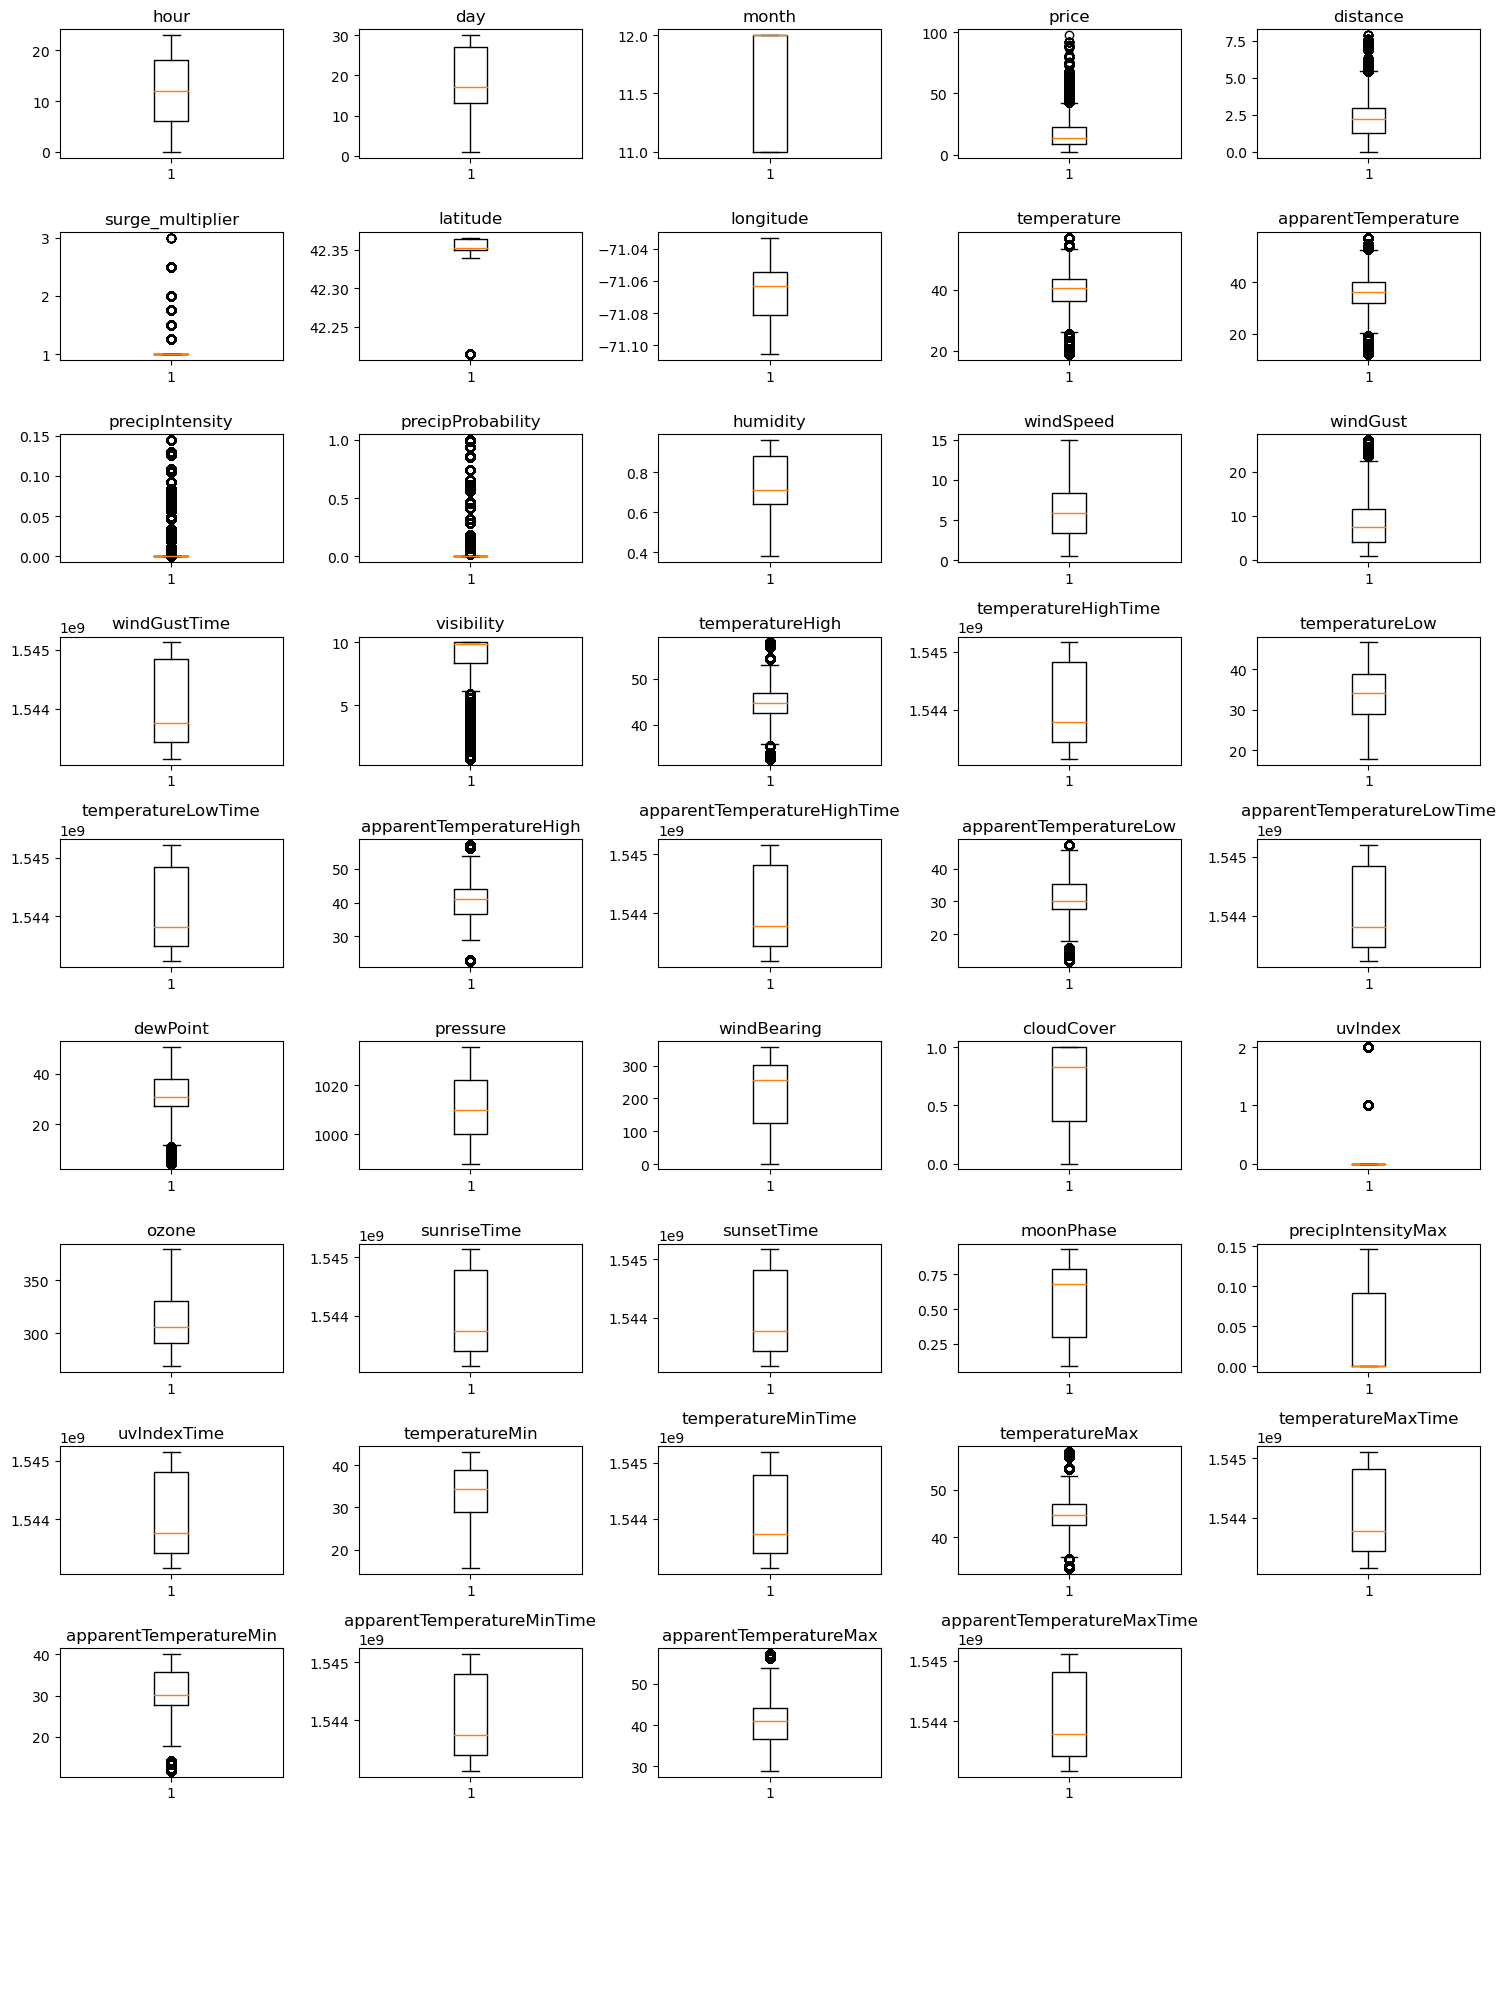

In [83]:
# plot figure 
fig, axes = plt.subplots(10, 5, figsize=(15, 20))
axes = axes.flatten()
# membuat boxplot
for i, column in enumerate(num_col):
    axes[i].boxplot(data[column])
    axes[i].set_title(column)
    
# hapus plot kosong
for j in range(len(num_col), len(axes)):
    axes[j].axis('off')

plt.tight_layout()

plt.show()

Catatan  

Kolom yang memiliki data outlier sebagai berikut:  
 ['price','distance', 'surge_multiplier', 'latitude',  'temperature','apparentTemperature','precipIntensity','precipProbability','windGust','visibility','temperatureHigh',
                 'apparentTemperatureHigh','apparentTemperatureLow','dewPoint', 'uvIndex','visibility.1','temperatureMax','apparentTemperatureMin','apparentTemperatureMax']

untuk sekarang saya abaikan untuk di atasi di feature engineering
    

- Cek Distribution

In [84]:
# inisialisasi description
desc = data.describe()

# buat kolom list skew dan kurtosis
skew = []
kurt = []
# iterasi method ke setiap kolom numerik
for cols in num_col:
    skewness = stats.skew(data[cols])
    kurtosis = stats.kurtosis(data[cols])
    skew.append(skewness)
    kurt.append(kurtosis)


# menggabungkan ke dataframe describe
desc.loc['Skewness'] = skew
desc.loc['Kurtosis'] = kurt


In [85]:
# deskripsi
desc.T

,count,mean,std,min,25%,50%,75%,max,Skewness,Kurtosis
hour,582066.0,1.161283e+01,6.939188,0.000000e+00,6.000000e+00,1.200000e+01,1.800000e+01,2.300000e+01,-0.042528,-1.181708
day,582066.0,1.761873e+01,9.976178,1.000000e+00,1.300000e+01,1.700000e+01,2.700000e+01,3.000000e+01,-0.347889,-1.194721
month,582066.0,1.159697e+01,0.490507,1.100000e+01,1.100000e+01,1.200000e+01,1.200000e+01,1.200000e+01,-0.395395,-1.843663
price,582066.0,1.676984e+01,9.436985,2.500000e+00,9.000000e+00,1.400000e+01,2.250000e+01,9.750000e+01,1.027360,1.203308
distance,582066.0,2.217198e+00,1.137834,2.000000e-02,1.310000e+00,2.190000e+00,2.960000e+00,7.860000e+00,0.829183,1.186633
surge_multiplier,582066.0,1.016499e+00,0.099748,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00,7.600201,67.029930
latitude,582066.0,4.233826e+01,0.047690,4.221480e+01,4.235030e+01,4.235190e+01,4.236470e+01,4.236610e+01,-2.126654,2.737998
longitude,582066.0,-7.106626e+01,0.020332,-7.110540e+01,-7.108100e+01,-7.106310e+01,-7.105420e+01,-7.103300e+01,-0.351686,-0.387140
temperature,582066.0,3.957051e+01,6.776688,1.891000e+01,3.645000e+01,4.049000e+01,4.361000e+01,5.722000e+01,-0.603724,0.714082
apparentTemperature,582066.0,3.589595e+01,7.980340,1.213000e+01,3.191000e+01,3.597000e+01,4.015000e+01,5.722000e+01,-0.400062,1.090323


Catatan:

Dari deskripsi diatas data skewness memiliki kecenderungan moderately skewed dan kebanyakan positive skew, Untuk kurtosis memiliki kecendrungan leptokurtic walaupun selisih tidak jauh dari 0

- Plot data Distribusi

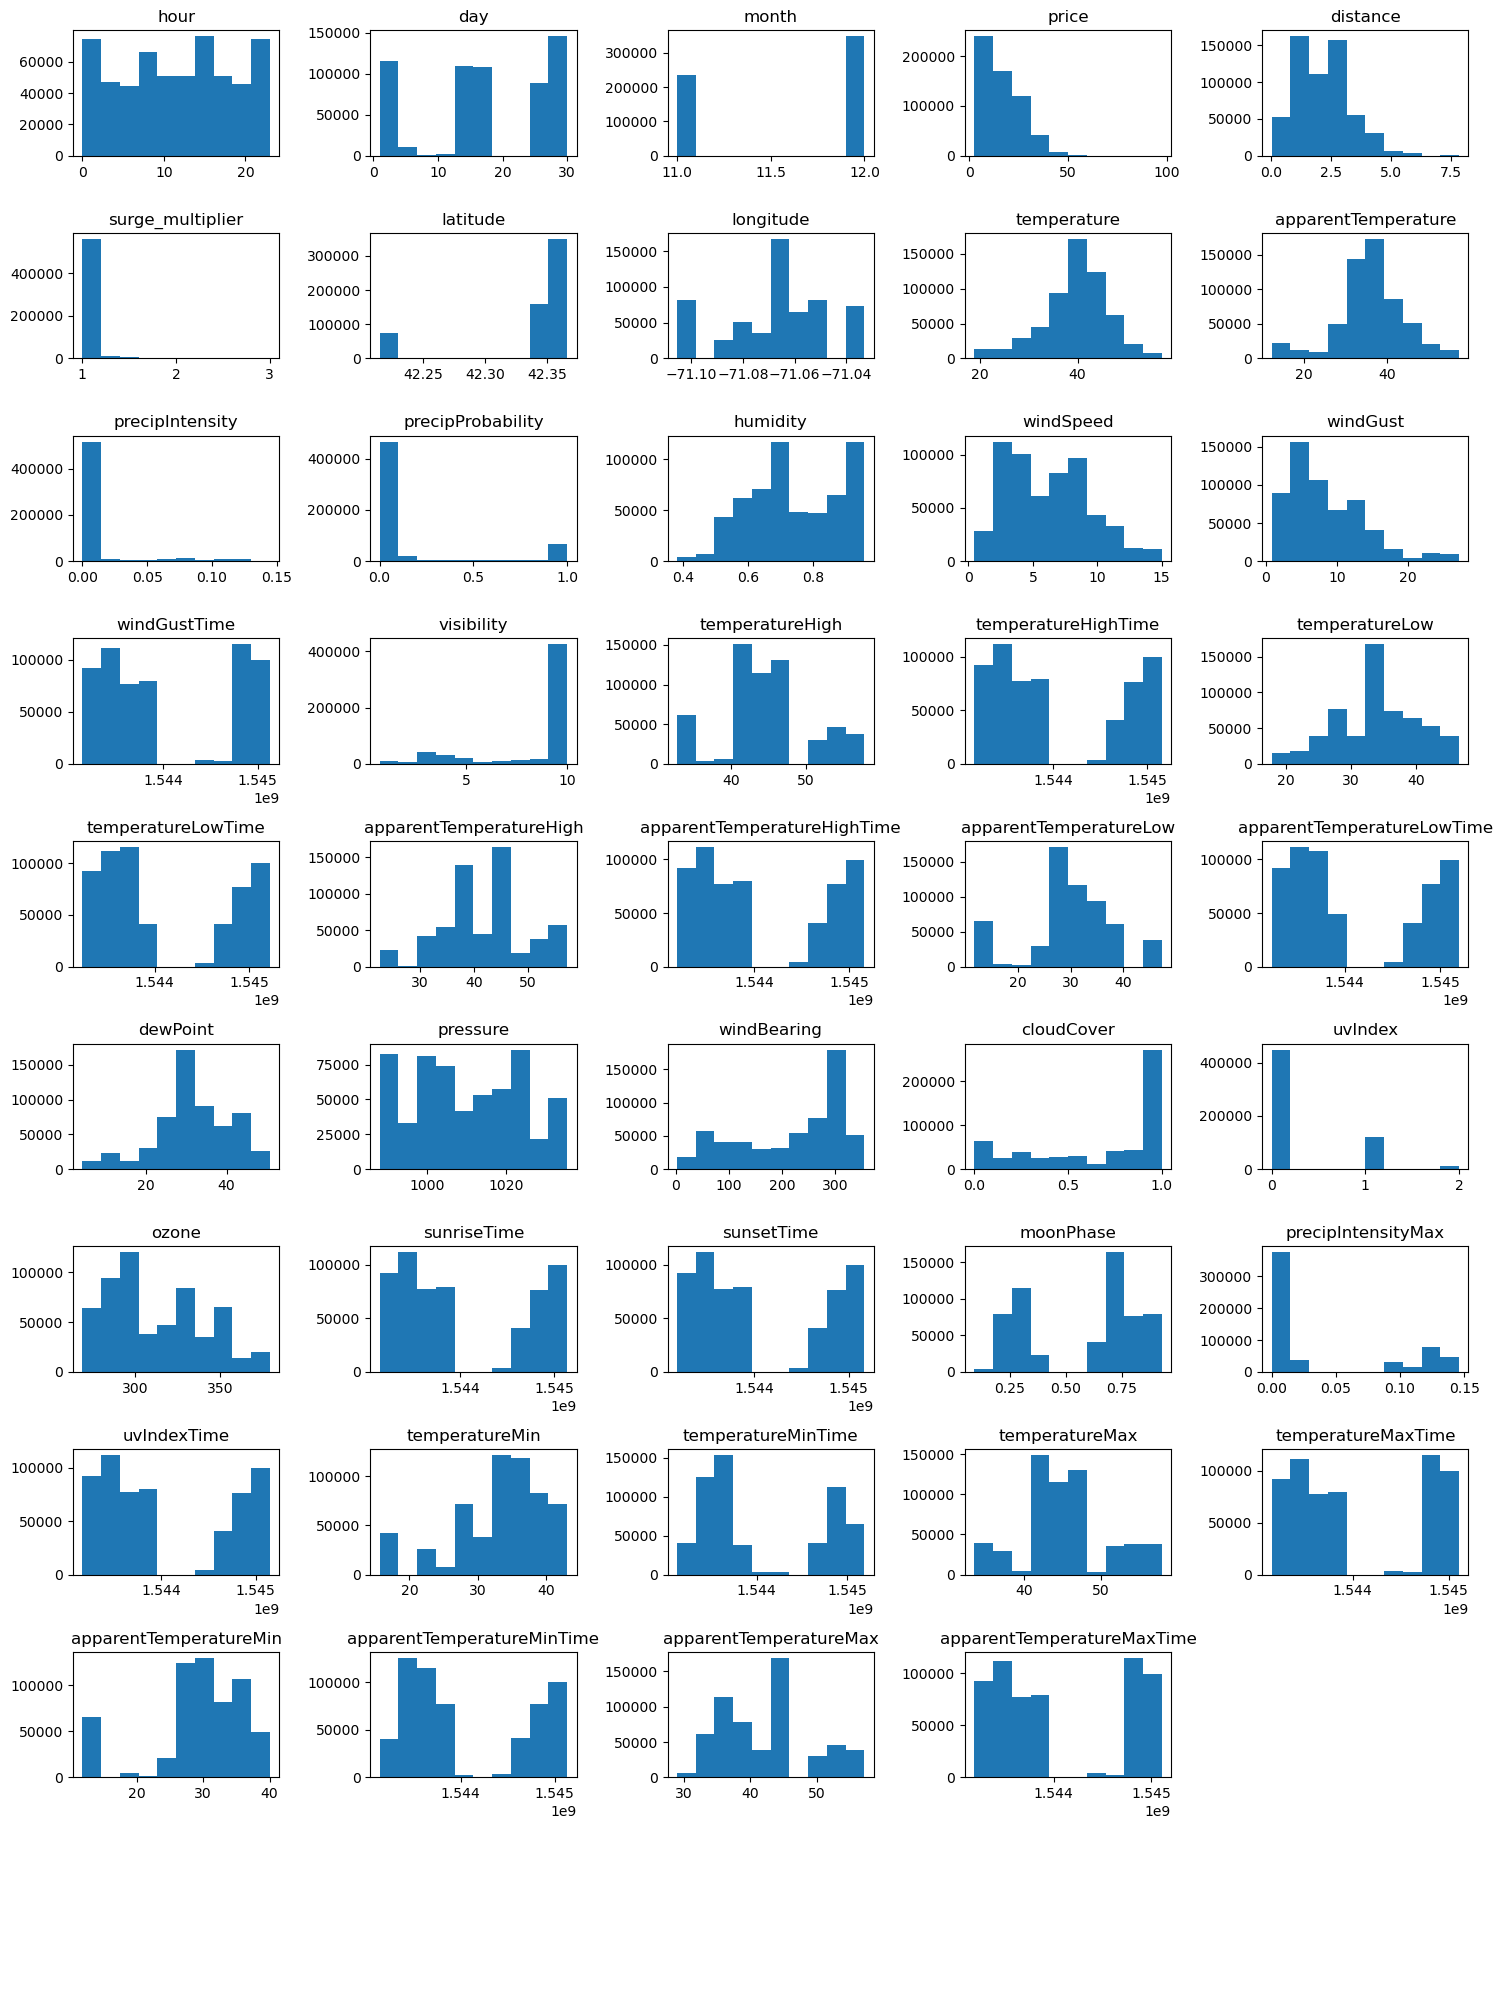

In [86]:
# set figure untuk plot distribusi
fig, axes = plt.subplots(10, 5, figsize=(15,20))
axes = axes.flatten()

# Membuat plot histogram
for i, column in enumerate(num_col):
    axes[i].hist(data[column])
    axes[i].set_title(column)

# hapus plot kosong
for j in range(len(num_col), len(axes)):
    axes[j].axis('off')

# layout 
plt.tight_layout()
# tampilkan
plt.show()


Catatan:

Poin utama dari Visualisasi adalah data tersebut tidak normal dan adanya outlier

- cek cardinality

In [87]:
# Membuat list kolom numerik
num_col = list(data.select_dtypes(include='number').columns)
# Membuat list kolom kategory
cat_col = list(data.select_dtypes(include='object').columns)


In [88]:
# looping membuat data kategori 
colCategory_uniq = []

for col in cat_col:
    colCategory_uniq.append([col, data[col].nunique()])


pd.DataFrame(data=colCategory_uniq, columns=['Kolom_kategory', 'unique_value'])

,Kolom_kategory,unique_value
0,source,12
1,destination,12
2,cab_type,2
3,product_id,12
4,name,12
5,short_summary,9
6,icon,7


In [89]:
# # Cek data Normalitas 

# for col in data.select_dtypes(include='number').columns:
#     stat, p = stats.shapiro(data[col])
#     print(f'Kolom {col}: Uji Statistik: {stat}, Nilai P = {p}')

In [90]:
# for col in data.select_dtypes(include='number').columns:
#     stat, p = stats.normaltest(data[col])
#     print(f'Kolom {col}: Uji Statistik: {stat}, Nilai P = {p}')

Catatan  

- Data setelah di uji menggunakan 'D’Agostino’s K^2' Pvalue kebanyakan tidak melebihi 0.05 maka data tersebut tidak normal.
- Data tersebut adanya indikasi outlier yang mana linear regression sensitive outlier
- Untuk data mean rentang antara -7 s/d 8
- Data std beragam
- skewness nya yaitu memiliki kecenderungan modarately skew
- kurtosis leptokurtic


<!-- - Atasi outlier -->

## Analisis data 

Analisis saya Menggunakan Variable `data` yang sudah clean dari null dan duplikat untuk memudahakan analisis 

In [91]:
# platform ride-hailing
cab_type = data['cab_type'].value_counts()
cab_type

cab_type
Lyft    293060
Uber    289006
Name: count, dtype: int64

proporsi data lebih banyak lyft dari pada Uber

In [92]:
# platform ride-hailing di group berdasarkan price
data.groupby(['cab_type', 'name'])['price'].sum().sort_values(ascending=False)

cab_type  name        
Lyft      Lux Black XL    1605626.55
Uber      Black SUV       1491798.50
Lyft      Lux Black       1127057.55
Uber      Black           1016954.50
Lyft      Lux              866901.50
Uber      UberXL           783380.50
Lyft      Lyft XL          748207.70
          Lyft             471058.68
Uber      UberX            463685.50
          WAV              462920.50
          UberPool         427561.50
Lyft      Shared           295998.50
Name: price, dtype: float64

In [93]:
# rata-rata jarak dari groupby distance
avg_distance = data.groupby(['cab_type','name'])['distance'].mean().reset_index()
avg_distance

,cab_type,name,distance
0,Lyft,Lux,2.199370
1,Lyft,Lux Black,2.214477
2,Lyft,Lux Black XL,2.198090
3,Lyft,Lyft,2.210368
4,Lyft,Lyft XL,2.192788
5,Lyft,Shared,2.191617
6,Uber,Black,2.250741
7,Uber,Black SUV,2.250631
8,Uber,UberPool,2.219555
9,Uber,UberX,2.229737


In [94]:
# analisis dari relasi antara cab_type dan hour
cab_hour = data.groupby(['cab_type'])['hour'].value_counts().reset_index()

# relasi uber dan hour
print('DataFrame Uber')
display(cab_hour[cab_hour['cab_type'] == "Uber"].sort_values(by=['hour']))

# relasi Lyft dan hour 
print('Dataframe Lyft')
display(cab_hour[cab_hour['cab_type'] == "Lyft"].sort_values(by=['hour']))

DataFrame Uber


,cab_type,hour,count
25,Uber,0,13041
40,Uber,1,11713
36,Uber,2,12065
41,Uber,3,11704
38,Uber,4,11834
46,Uber,5,10573
39,Uber,6,11727
45,Uber,7,10629
47,Uber,8,10321
35,Uber,9,12154


Dataframe Lyft


,cab_type,hour,count
0,Lyft,0,13911
13,Lyft,1,11998
17,Lyft,2,11919
18,Lyft,3,11654
14,Lyft,4,11974
21,Lyft,5,10726
19,Lyft,6,11493
22,Lyft,7,10610
23,Lyft,8,10289
12,Lyft,9,12378


### Data Visualisasi

- Jumlah Perjalanan Bergantung Jam

<Axes: xlabel='hour', ylabel='count'>

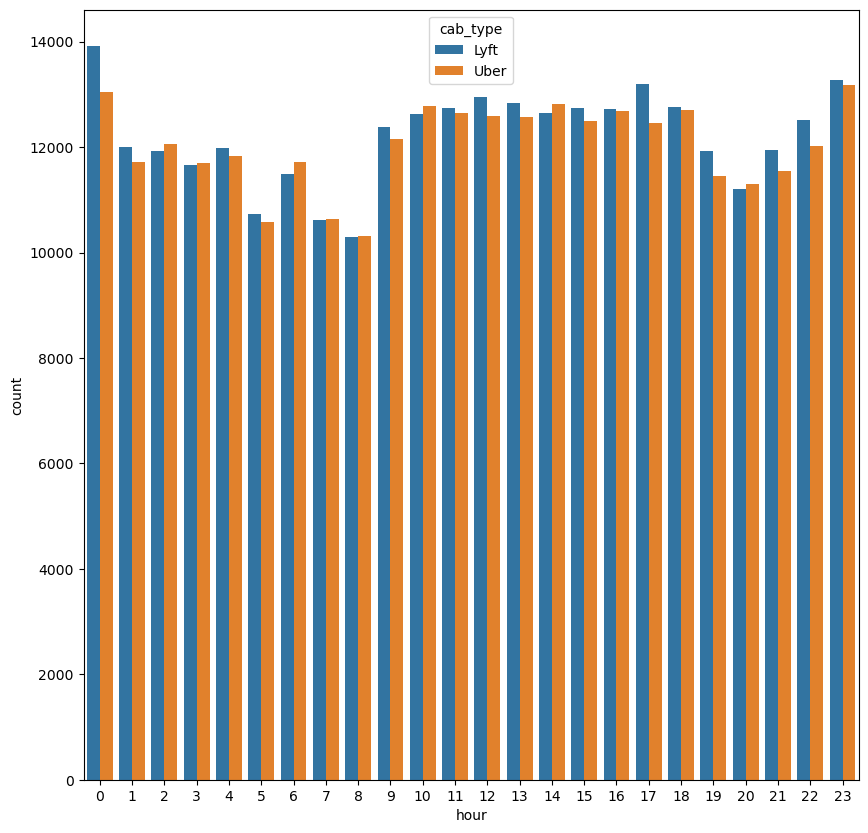

In [95]:
plt.figure(figsize=(10,10))
sns.countplot(x='hour', data=data, hue='cab_type')

insight:  
Dari jam 8 malam sampai cenderung naik dan dari jam 9 sampai jam 6 sore stabil. saya asumsikan jam makan siang sampai sore memiliki jumlah service terbaik

- Distribusi data dalam bulan

month
12    347477
11    234589
Name: count, dtype: int64

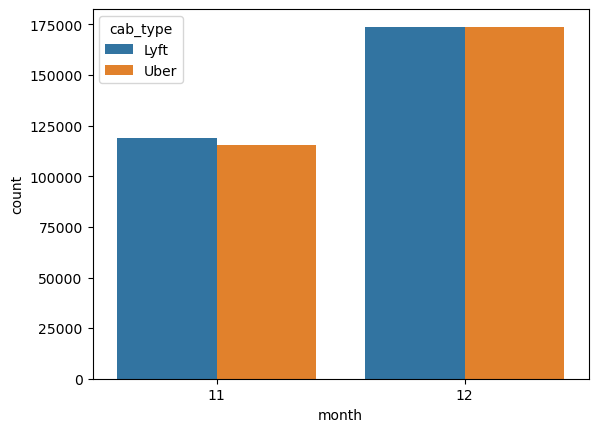

In [96]:
sns.countplot(x='month', data=data, hue='cab_type')
data['month'].value_counts()

insight:

Dari dataset untuk bulan 11 lyft > uber dan dibulan 12 service sama 

In [97]:
# Cek hari apa yang memiliki customer terbanyak
daily_count = data['day'].value_counts().reset_index()
daily_count.sort_values(by='count', ascending=False)

,day,count
0,27,62195
1,28,57708
2,29,49218
3,1,38613
4,30,38514
5,16,38385
6,17,38371
7,2,38371
8,14,38365
9,15,38348


<Axes: xlabel='day', ylabel='count'>

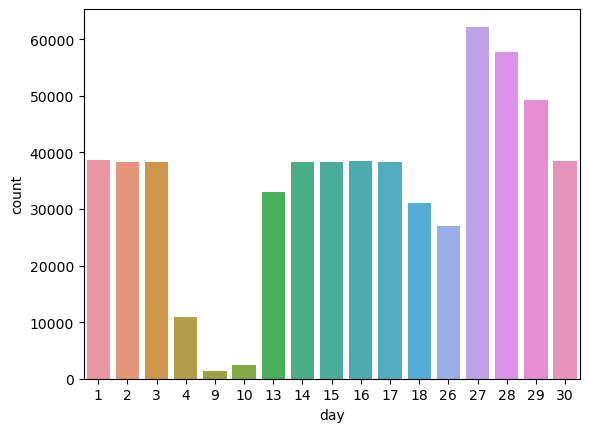

In [98]:
# plot data hari 
sns.countplot(x='day', data=data)

insight:

Di tanggal 27 jumlah service yang paling tinggi saya asumsikan tanggal tersebut merupakan hari pay day.

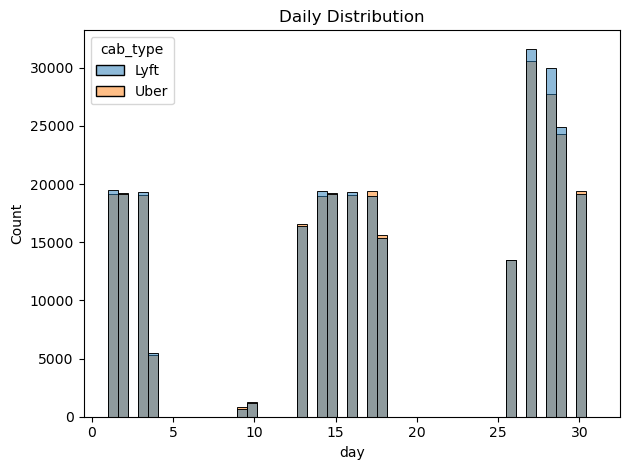

In [99]:
# plot distribusi hari berdasarkan service ride-hailing
sns.histplot(x='day', data=data, bins= np.linspace(1,31), hue='cab_type')
plt.title('Daily Distribution')
plt.tight_layout()
plt.show()


insight:

lyft > uber di tanggal 27 dalam hal service 

In [100]:

data['day'].value_counts()

day
27    62195
28    57708
29    49218
1     38613
30    38514
16    38385
17    38371
2     38371
14    38365
15    38348
3     38340
13    32973
18    31021
26    26954
4     10837
10     2406
9      1447
Name: count, dtype: int64

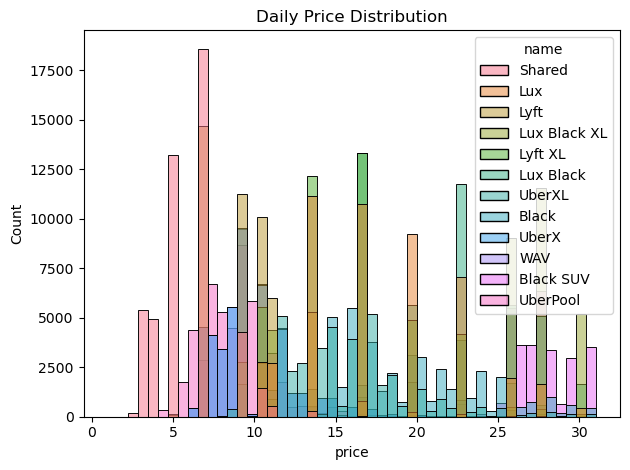

In [101]:
# plot data price dengan nama service
sns.histplot(x='price', data=data, bins=np.linspace(1,31), hue='name')
plt.title('Daily Price Distribution')
plt.tight_layout()
plt.show()

insight:

service Shared merupakan yang tertinggi dari lyft

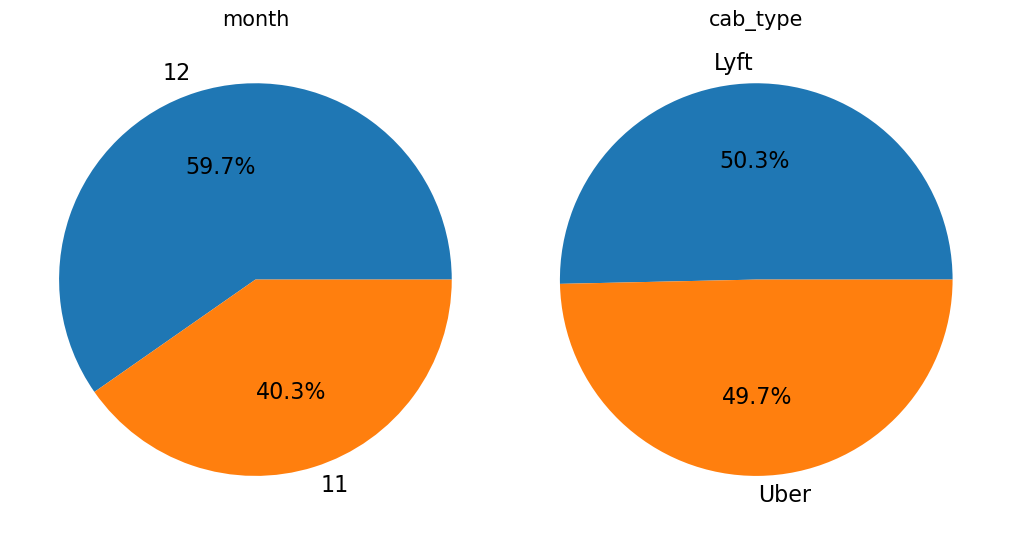

In [102]:
def pie_chart(data,columns):
    ncols = 2
    nrow = (len(columns) + ncols - 1) // ncols
    fig, axes = plt.subplots(nrow, ncols, figsize=(10,6), constrained_layout=True)
    axes = axes.flatten()
    for i, column in enumerate(columns):

        column_value = data[column].value_counts()
        column_key = list(data[column].value_counts().index)

        
        axes[i].pie(column_value, labels=column_key, autopct='%1.1f%%',textprops={'fontsize': 16})
        axes[i].set_title(column, fontsize=15)
        
    for j in range(len(columns), len(axes)):
        axes[j].axis('off')
        

    # Show the plot
    plt.show()



columns = ['month', 'cab_type']
pie_chart(data,columns)
    

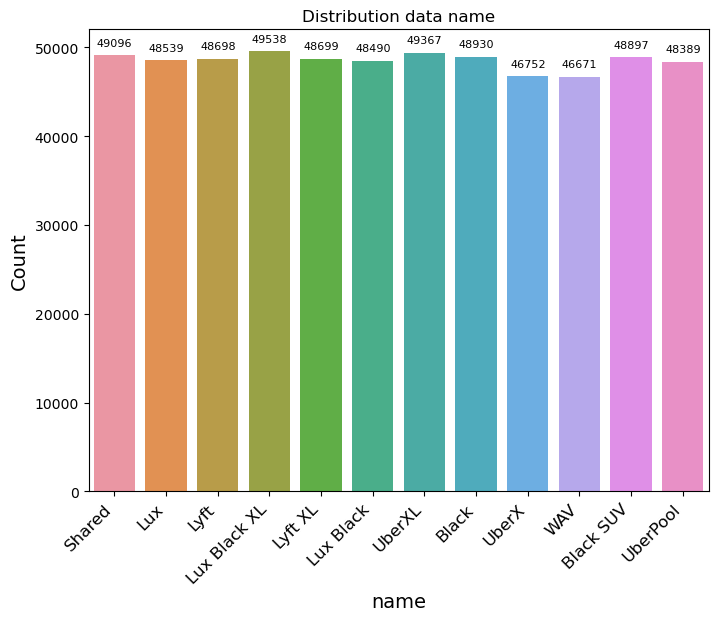

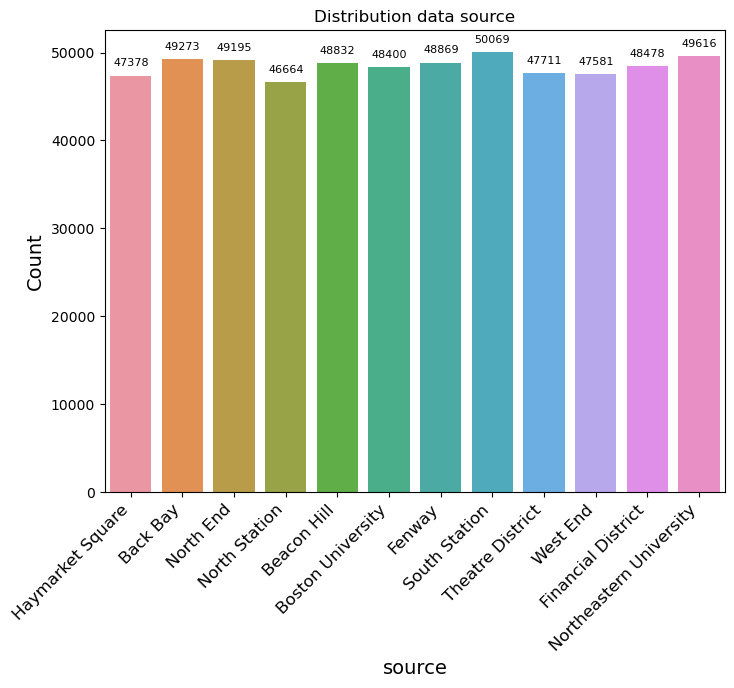

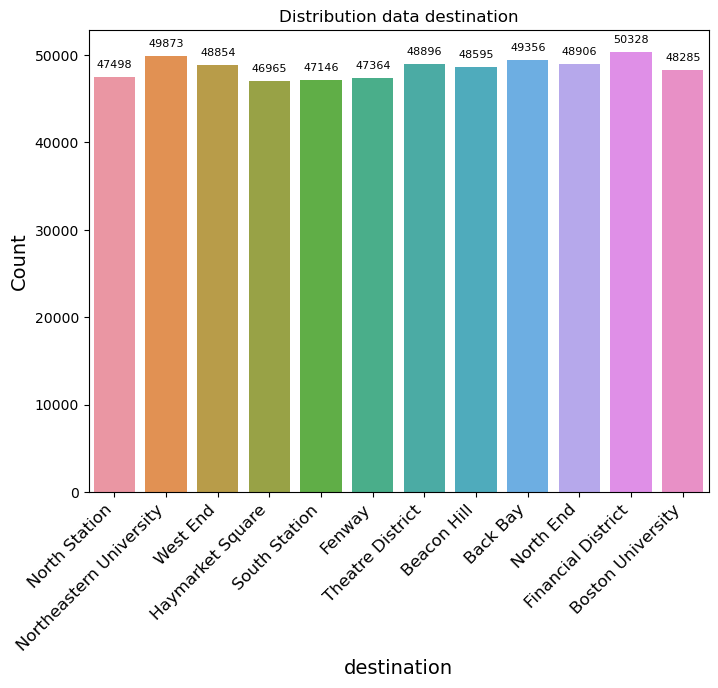

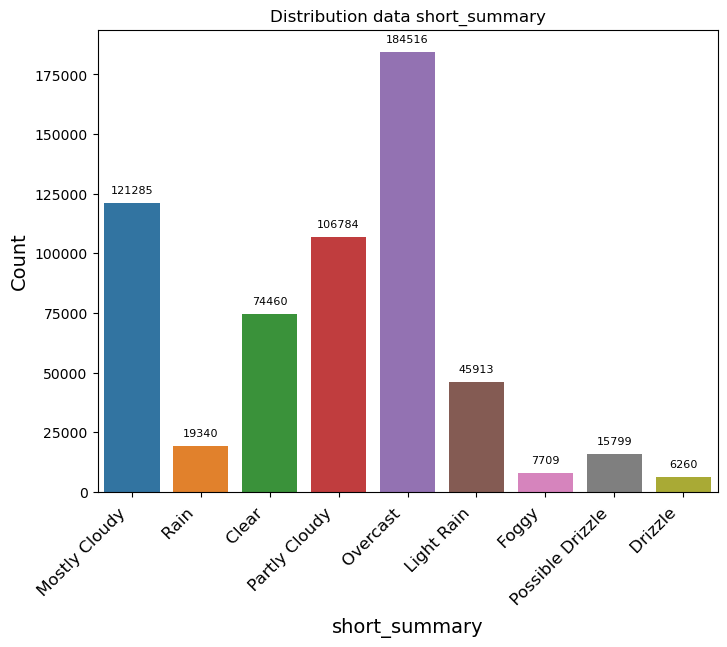

In [103]:
col = ['name','source', 'destination', 'short_summary']


for kolom in col:
    plt.figure(figsize=(8,6))
    ax = sns.countplot(x=kolom, data=data)

    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", fontsize=12)

    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    xytext=(0, 9), 
                    textcoords='offset points',
                    fontsize=8
                   )

    plt.xlabel(kolom, fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.title(f'Distribution data {kolom}')

    plt.show()



insight: 

Di visualisasi Short_summery Overcast(mendung) menempati frekuensi tertinggi, saya asumsikan customer cenderung antisipasi terhadap hujan sehingga service ride-hailing naik

([<matplotlib.patches.Wedge at 0x206370ffcd0>,
 [Text(0.5981311673666463, 0.9231679731363156, ' cloudy '),
  Text(-0.9958304818857895, 0.467249024982521, ' partly-cloudy-night '),
  Text(-0.7724697251445526, -0.7831286763585532, ' partly-cloudy-day '),
  Text(0.23206187068302586, -1.0752428972911632, ' rain '),
  Text(0.9024052494590451, -0.6290188914084845, ' clear-night '),
  Text(1.0765493144387936, -0.22592382251848453, ' clear-day '),
  Text(1.0990479710096104, -0.04575540863831333, ' fog ')],
 [Text(0.3262533640181707, 0.503546167165263, '31.70%'),
  Text(-0.5431802628467942, 0.25486310453592054, '22.64%'),
  Text(-0.4213471228061195, -0.4271610961955744, '16.55%'),
  Text(0.12657920219074137, -0.5864961257951798, '15.00%'),
  Text(0.49222104515947906, -0.34310121349553696, '8.86%'),
  Text(0.5872087169666147, -0.12323117591917336, '3.94%'),
  Text(0.5994807114597874, -0.024957495620898176, '1.32%')])

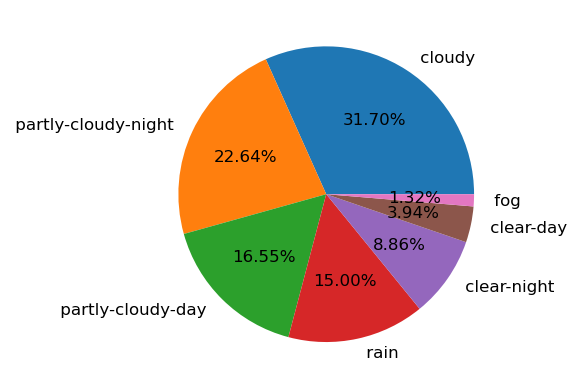

In [104]:
plt.pie(data['icon'].value_counts(),
        labels=list(data['icon'].value_counts().index),autopct ='%1.2f%%',
        textprops={"fontsize":12})

insight: 

proporsi cloudy yang paling tinggi, asumsi saya customer cenderung antisipasi hujan sehingga frekuensi service meningkat

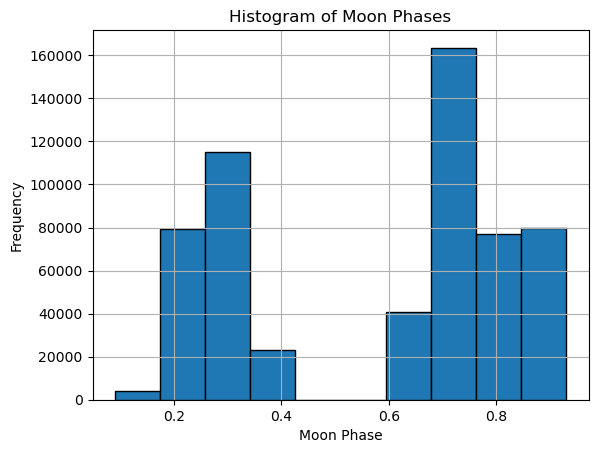

In [105]:
# histogram moonphase
plt.hist(data['moonPhase'], bins=10, edgecolor='black')  # Ubah jumlah bins sesuai kebutuhan
plt.xlabel('Moon Phase')
plt.ylabel('Frequency')
plt.title('Histogram of Moon Phases')
plt.grid(True)
plt.show()

Alasan Split data di awal:

- Menghindari data Leaking
- Untuk model linear regression, setelah saya mencari tahu di beberapa situs lebih baik di awal sehingga model lebih objektif
- Menghindari overfitting
- Karena model linear regression sensitiv outlier

- cek korelasi

# v. Feature Engineering 

- Split Data

In [106]:
# Definisikan data fitur dan prediksi
target_col = 'price'
X = [x for x in data.columns if x != target_col]
y = data[target_col]

In [107]:
# Spit data dengan Sklearn
X_train, X_test, y_train, y_test = train_test_split(data[X], y, test_size=0.2, random_state=42)

In [108]:
# Cek ukuran
print(f'Jumlah Baris: {X_train.shape[0]}')
print(f'Jumlah Kolom: {X_train.shape[1]}')

print('')
# jumlah price
print(f'Jumlah ukuran price: {y_train.shape}')

Jumlah Baris: 465652
Jumlah Kolom: 50

Jumlah ukuran price: (465652,)


In [109]:
# copy semua data yang sudah di split
X_train_raw = X_train.copy()
X_test_raw = X_test.copy()
y_train_raw = y_train.copy()
y_test_raw = y_test.copy()

In [110]:
X_train_raw.shape

(465652, 50)

In [111]:
y_train_raw.shape

(465652,)

- Handling Outlier

In [112]:
# Filer Numerical Columns into Variable
kolom_numerik = X_train_raw.select_dtypes(include=np.number).columns.to_list()

# Making data and columns for normal distribution
data_numerik_normal = []
kolom_numerik_normal = []

# Making data and columns for skewed distribution
data_numerik_skewed = []
kolom_numerik_skewed = []

# For loop in every numerical column to filer the data distribution into either normal distributed or skewed columns
for kolom in kolom_numerik:
    skewness = X_train[kolom].skew()
    
    # If the data normally distributed
    if skewness <= 0.5 and skewness >= -0.5:            
        kolom_numerik_normal.append(kolom)
        data_numerik_normal.append([kolom, skewness])
        
    # Elif the data is skewed
    elif skewness < -0.5 or skewness > 0.5:
        kolom_numerik_skewed.append(kolom)
        data_numerik_skewed.append([kolom, skewness])

In [113]:
# Showing Normally distributed columns
data_norm = pd.DataFrame(data=data_numerik_normal, columns=['kolom_terdistribusi_normal', 'skewness'])
data_norm

,kolom_terdistribusi_normal,skewness
0,hour,-0.042523
1,day,-0.346711
2,month,-0.396705
3,longitude,-0.350899
4,apparentTemperature,-0.398974
5,humidity,-0.084514
6,windSpeed,0.474700
7,windGustTime,0.410962
8,temperatureHigh,0.065590
9,temperatureHighTime,0.402075


In [114]:
# Showing skewed columns
data_skew = pd.DataFrame(data=data_numerik_skewed, columns=['kolom_skewed', 'skewness'])
data_skew

,kolom_skewed,skewness
0,distance,0.829801
1,surge_multiplier,7.602768
2,latitude,-2.125705
3,temperature,-0.603527
4,precipIntensity,3.358470
5,precipProbability,2.040213
6,windGust,1.144170
7,visibility,-1.507460
8,dewPoint,-0.501543
9,windBearing,-0.616328


In [115]:
# Input low variation columns into variable
kolom_low_variation = ['surge_multiplier', 'precipIntensity', 'precipProbability', 'uvIndex']

# Drop the low variation columns in skewed columns, and add it into normal distribution columns
for kolom in kolom_low_variation:
    kolom_numerik_skewed.remove(kolom) #-> removing low variation columns in skewed columns
    kolom_numerik_normal.append(kolom) #-> appending low variation columns in normal distributed columns

In [116]:
# Capping Method for Normal Distribution  
winsorizer_normal_dist = Winsorizer(capping_method='gaussian',
                            tail='both',
                            fold=3,
                            variables=kolom_numerik_normal,
                            missing_values='ignore')

# Fit & Transforming X_train 
X_train_capped = winsorizer_normal_dist.fit_transform(X_train_raw)

# Transforming X_test
X_test_capped = winsorizer_normal_dist.transform(X_test_raw)

In [117]:
winsorizer_skewed = Winsorizer(capping_method='iqr',
                            tail='both',
                            fold=1.5,
                            variables=kolom_numerik_skewed,
                            missing_values='ignore')

# Fit & Transforming X_train 
X_train_capped = winsorizer_skewed.fit_transform(X_train_raw)

# Transforming X_test
X_test_capped = winsorizer_skewed.transform(X_test_raw)

In [124]:
# Plot Distribution Comparison
def outlier_handling_plot_comparison(df_before, df_after, variable):
    """
    This function is created to plot histograms and boxplots for a variable before and after outlier handling
    
    Parameters:
    - df_before (pandas.DataFrame): DataFrame before outlier handling
    - df_after (pandas.DataFrame): DataFrame after outlier handling
    - variable (str): The variable to plot
    
    Example: 
    num_cols = ['numeric_column']                                   <- Enter the numeric column
    for col in num_cols:                                            <- make a for loop in numeric column to access every columns
        plot_distribution_comparison(X_train, X_train_capped, col)  <- put X_train, X_train_capped, and columns in the variable

    """
    # Figure Size, and Super Title based on variable
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))                               
    fig.suptitle(f'{variable} - Distribution Before and After Outlier Handling')

    # Plot Histogram Before
    sns.histplot(df_before[variable], bins=30, ax=axes[0, 0], color='skyblue')
    axes[0, 0].set_title('Histogram Before')

    # Plot Boxplot Before
    sns.boxplot(y=df_before[variable], ax=axes[1, 0], color='lightgreen')
    axes[1, 0].set_title('Boxplot Before')

    # Plot Histogram After
    sns.histplot(df_after[variable], bins=30, ax=axes[0, 1], color='skyblue')
    axes[0, 1].set_title('Histogram After')

    # Plot Boxplot After
    sns.boxplot(y=df_after[variable], ax=axes[1, 1], color='lightgreen')
    axes[1, 1].set_title('Boxplot After')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

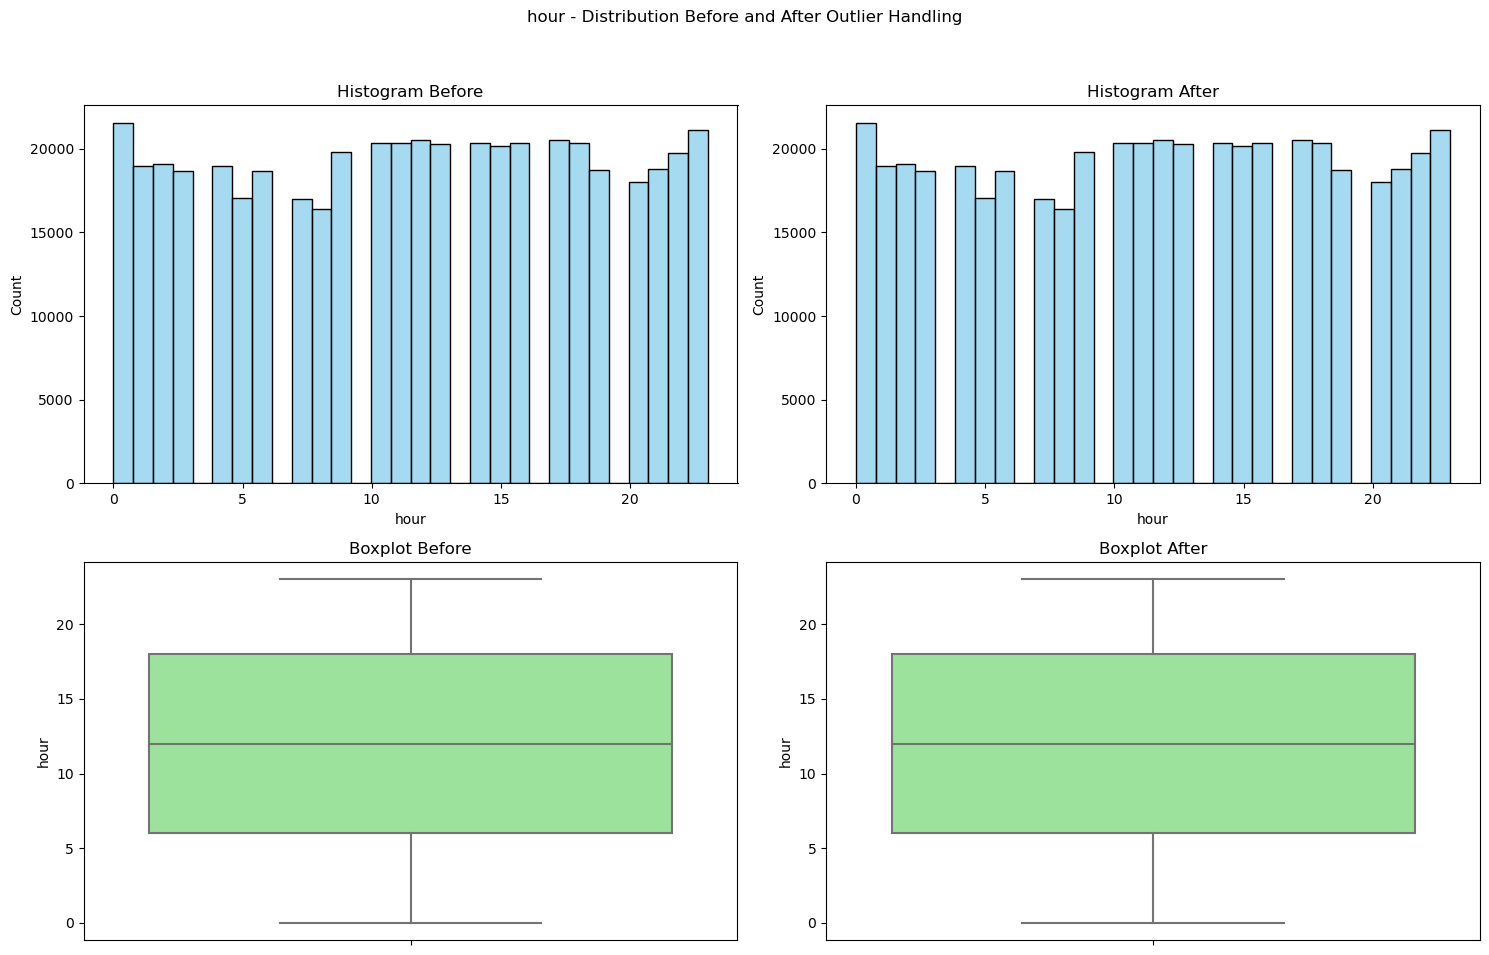

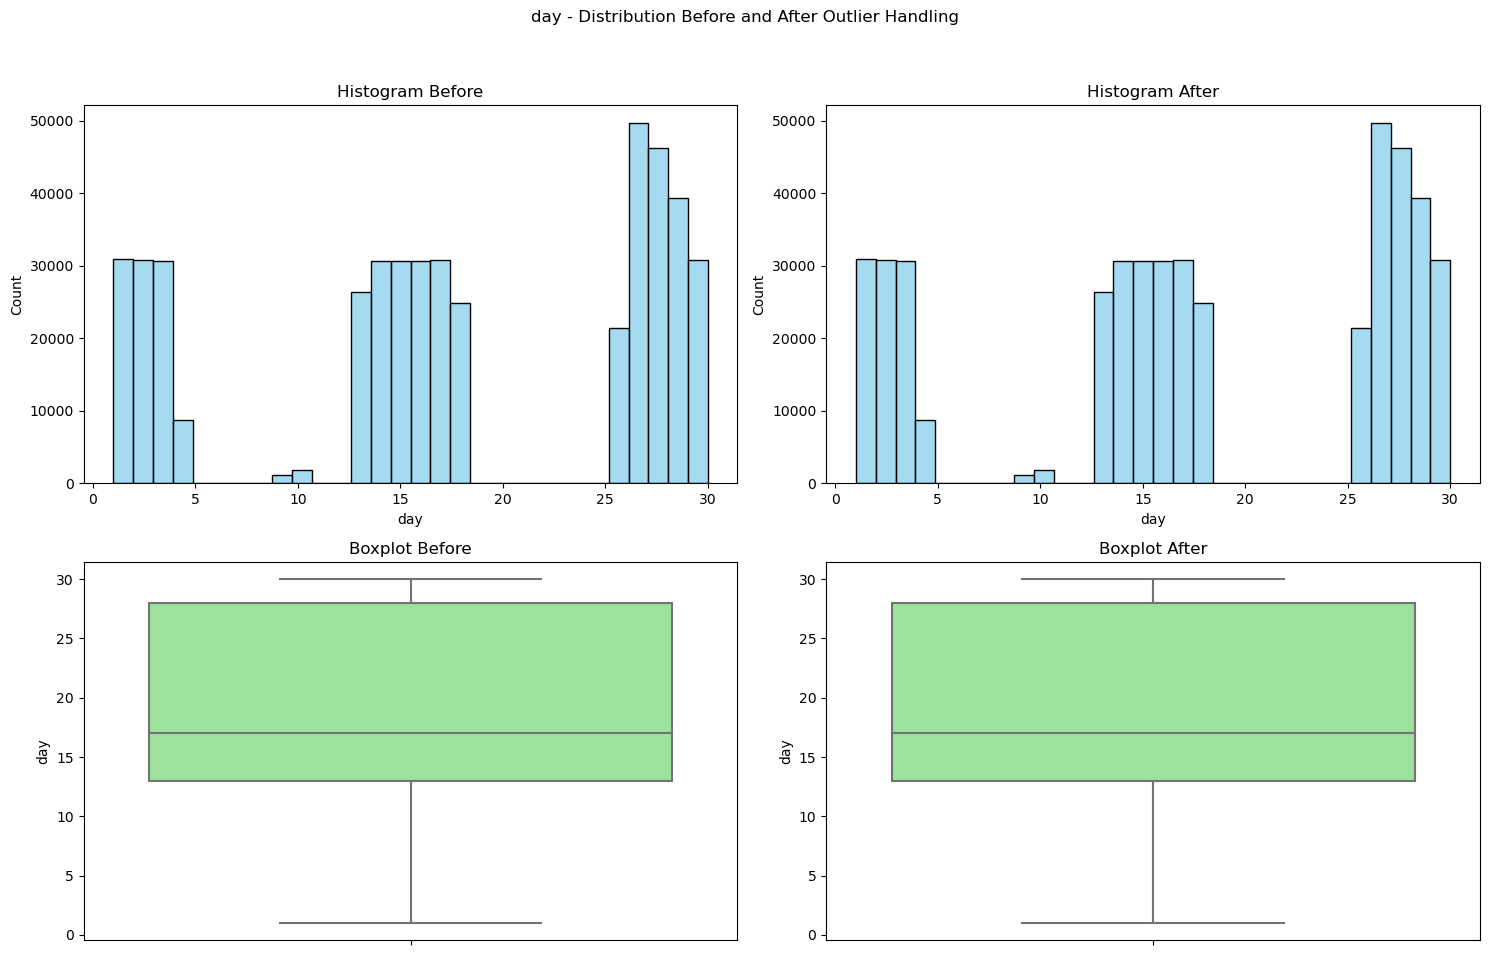

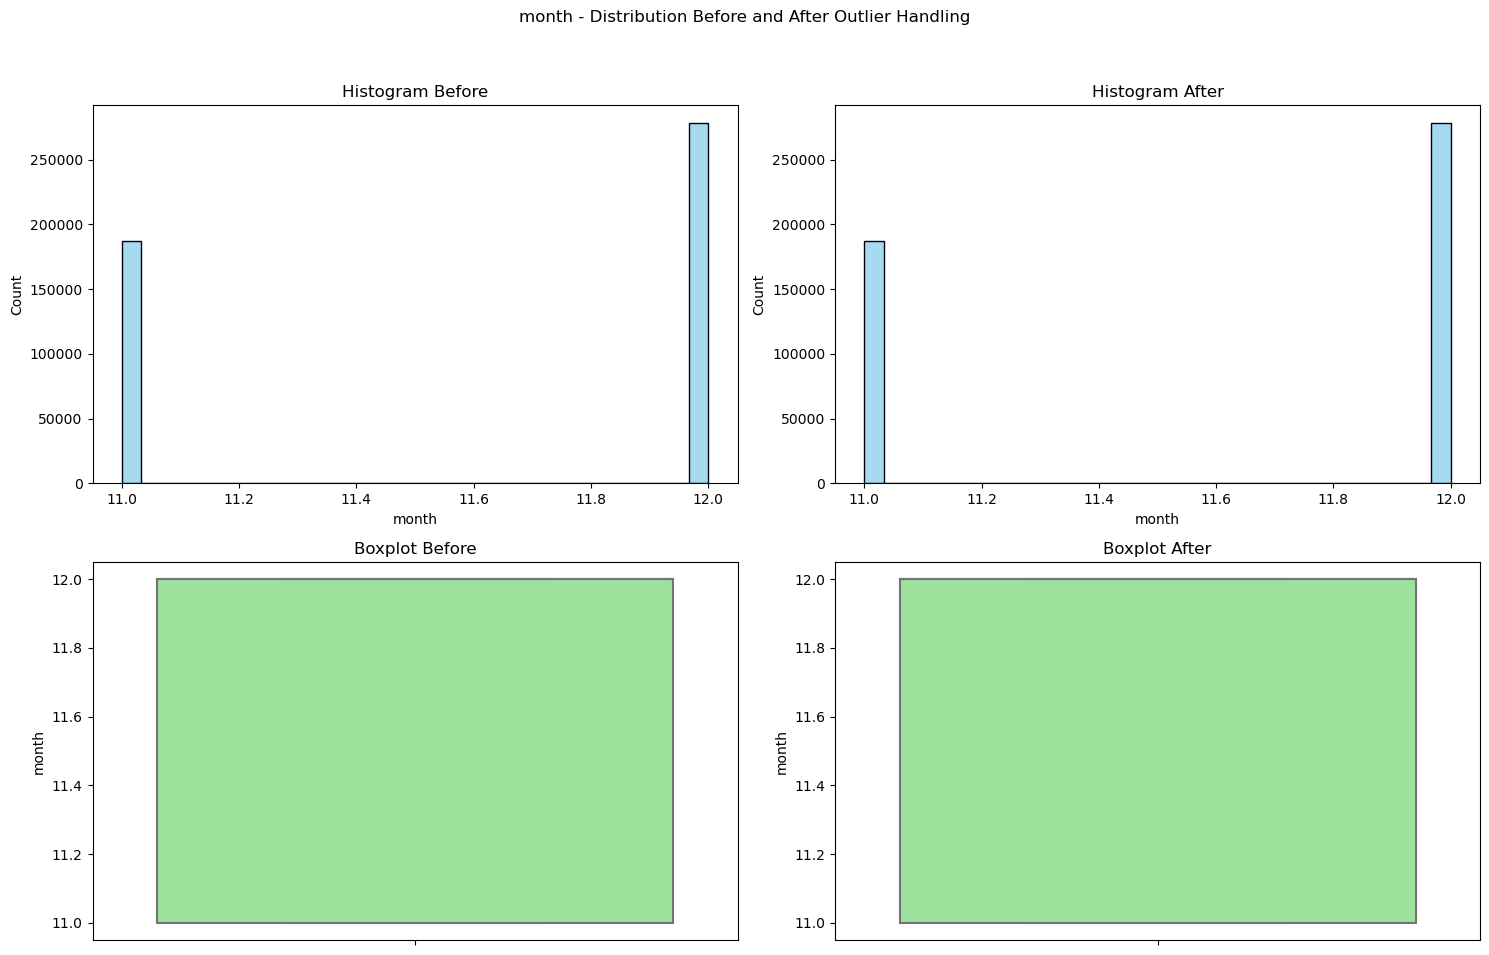

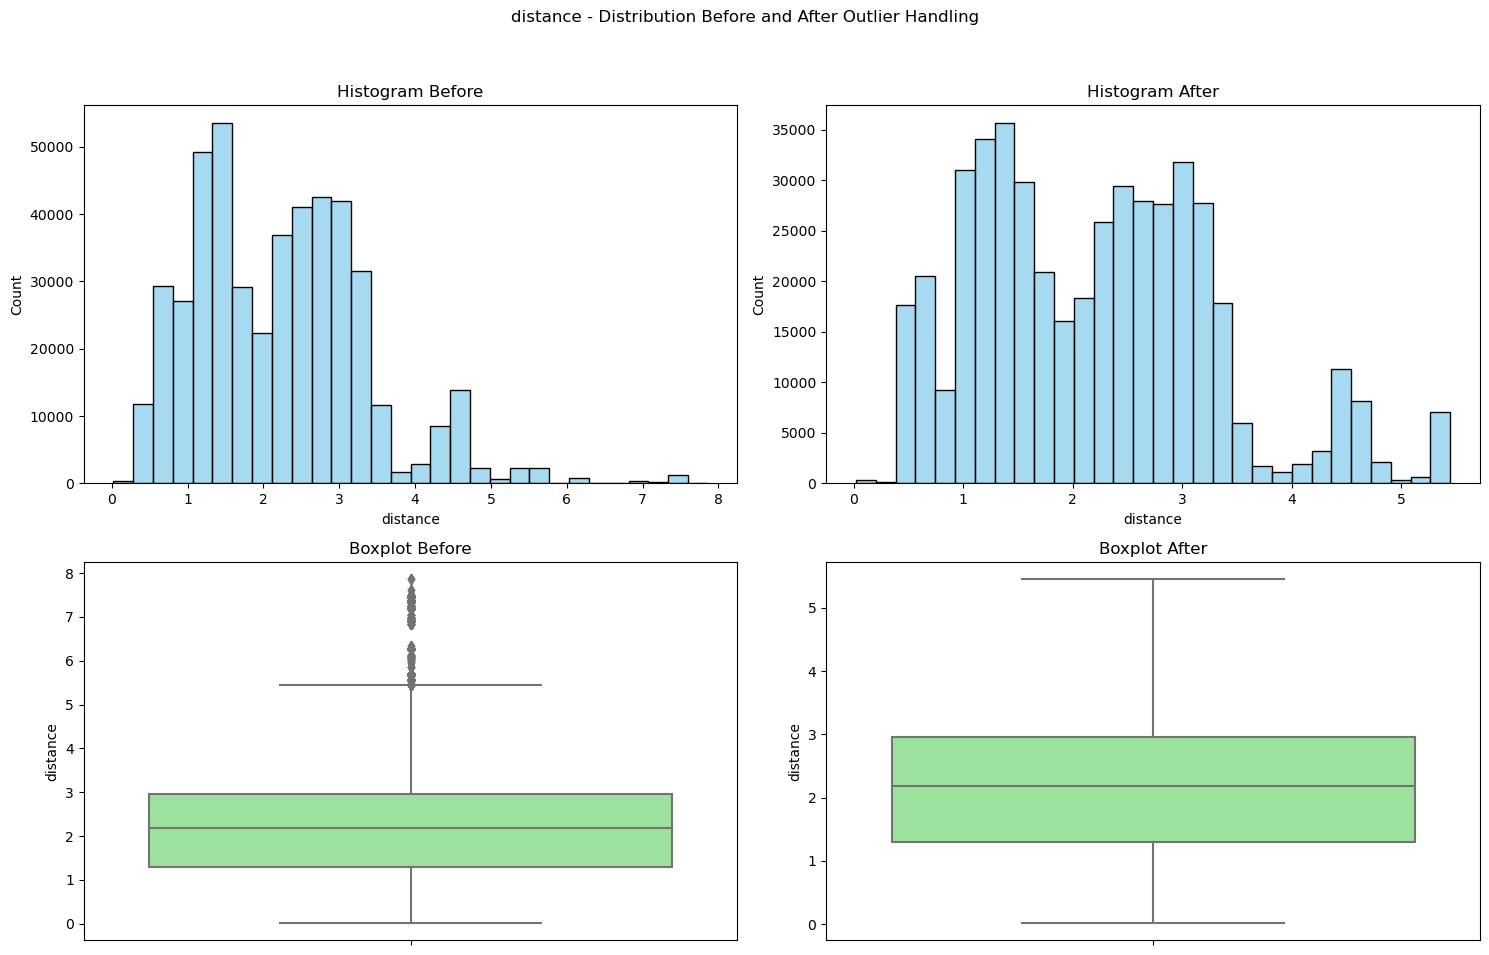

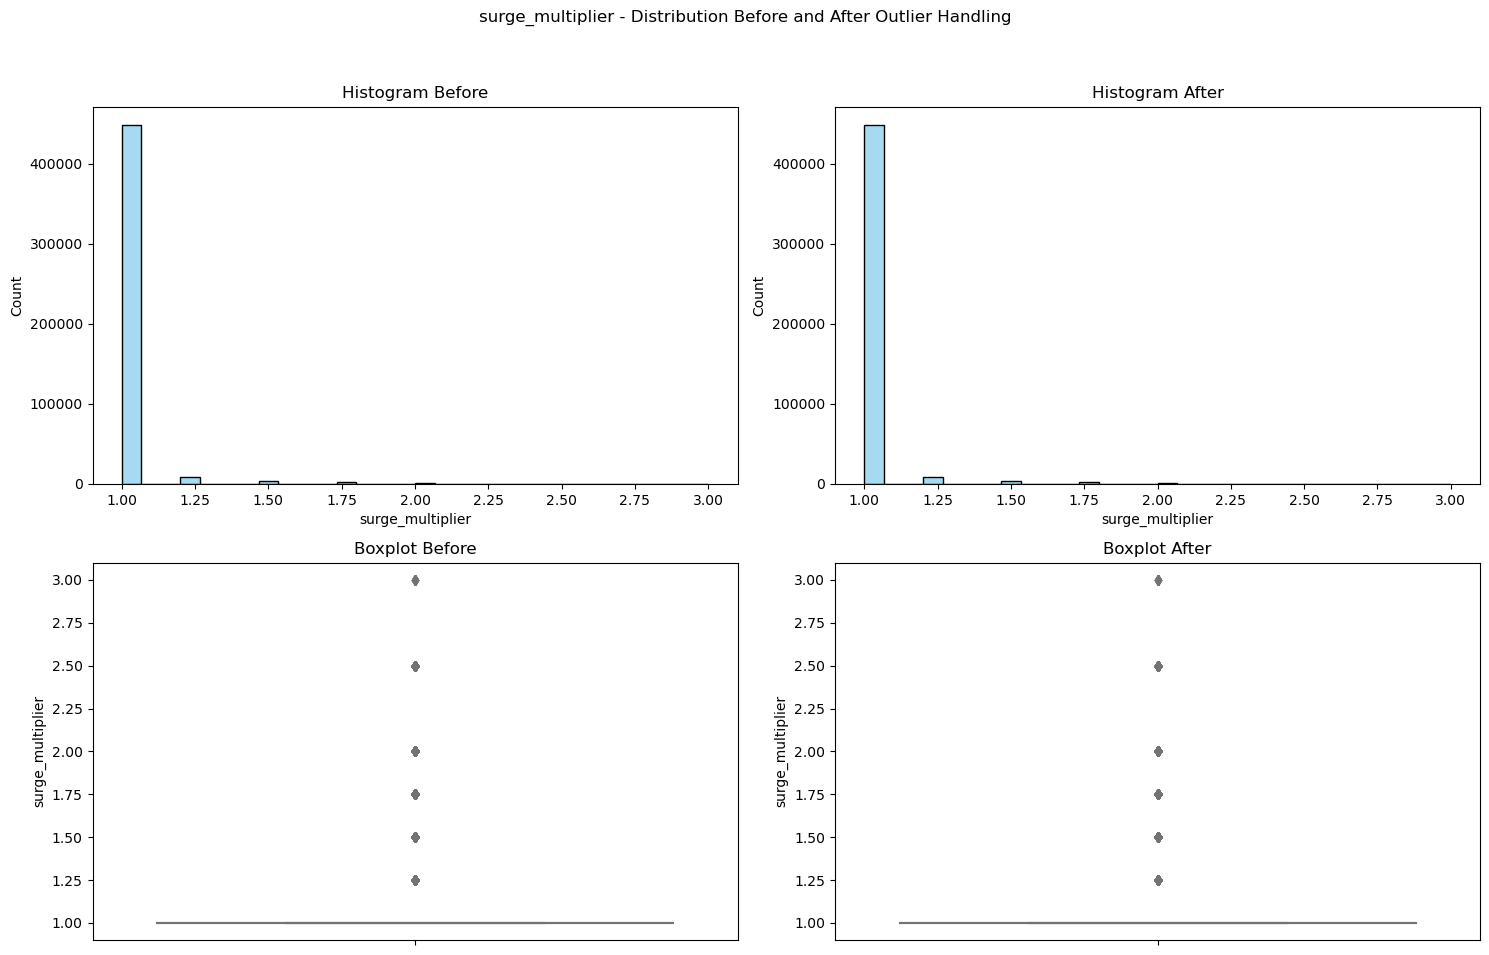

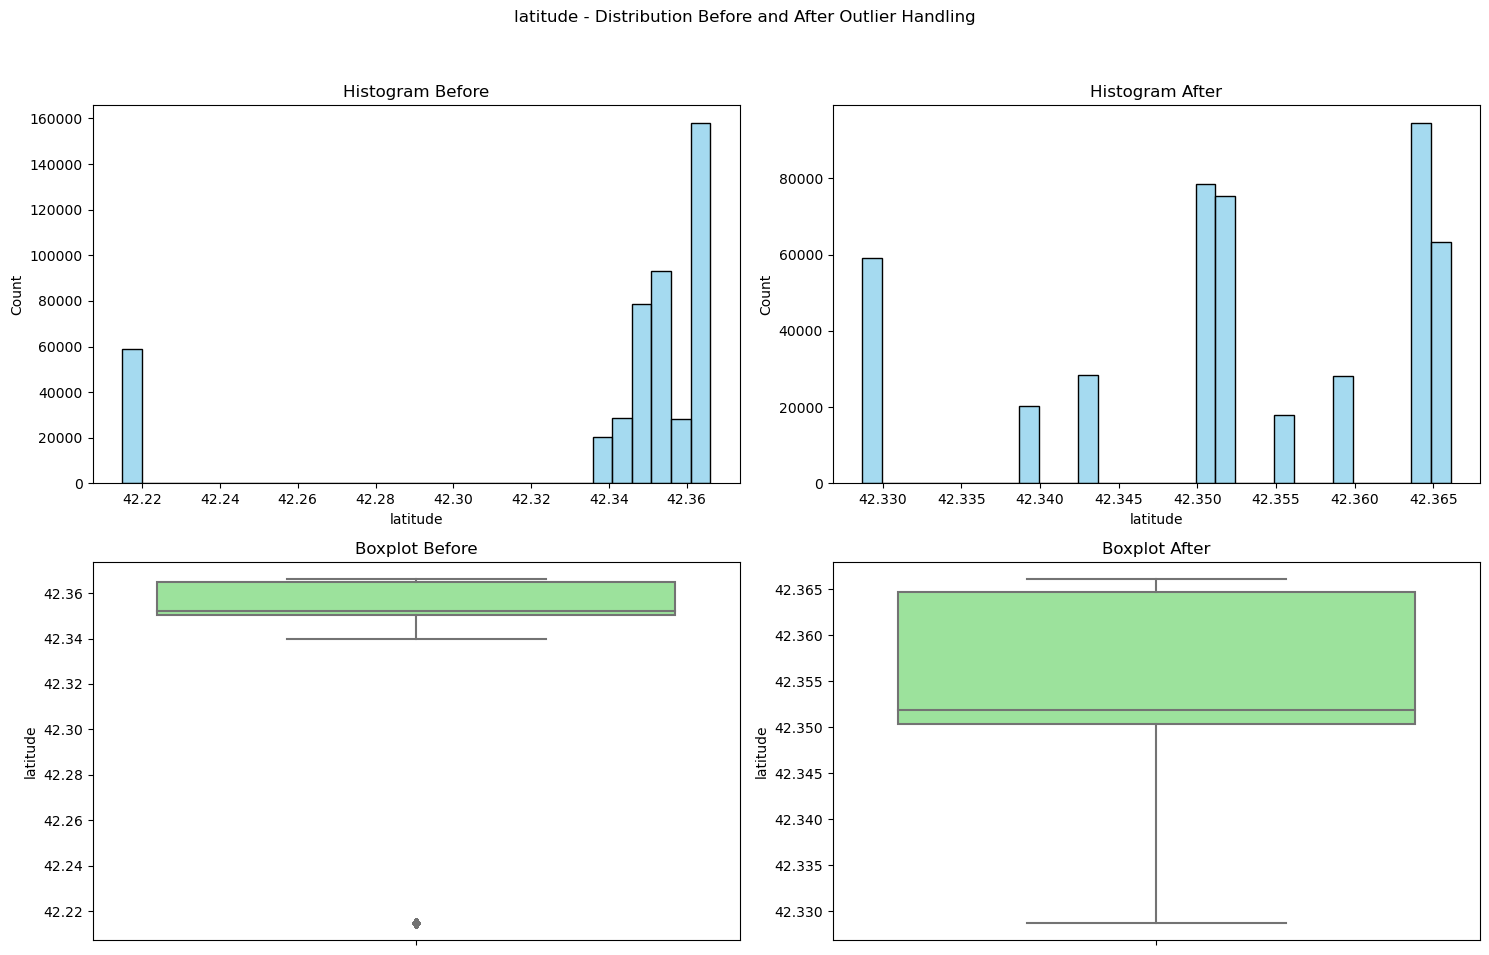

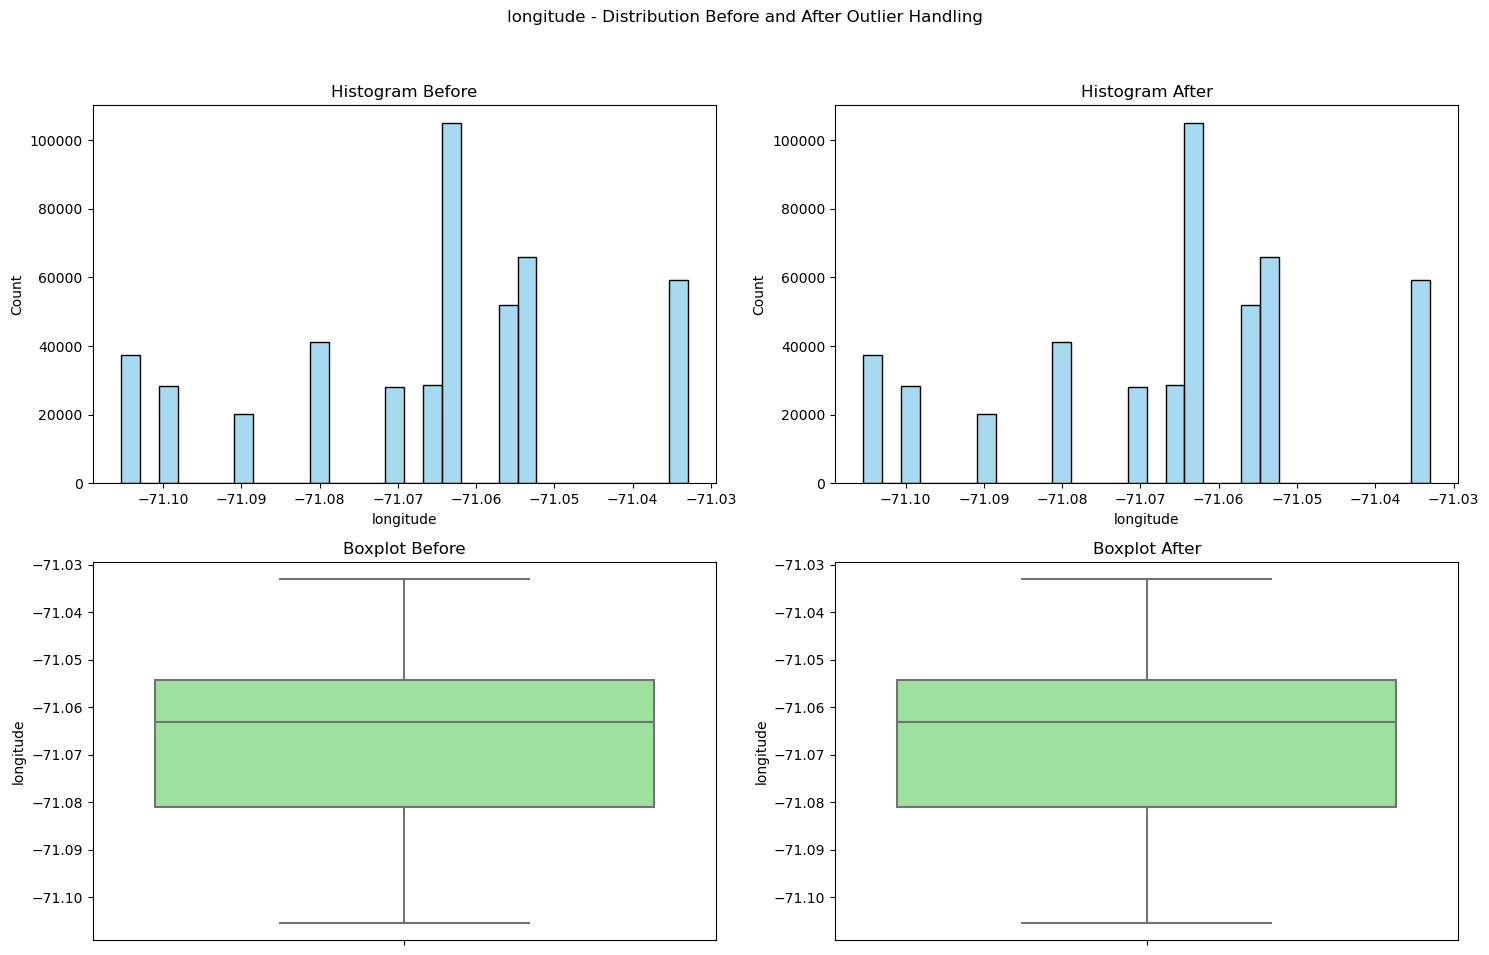

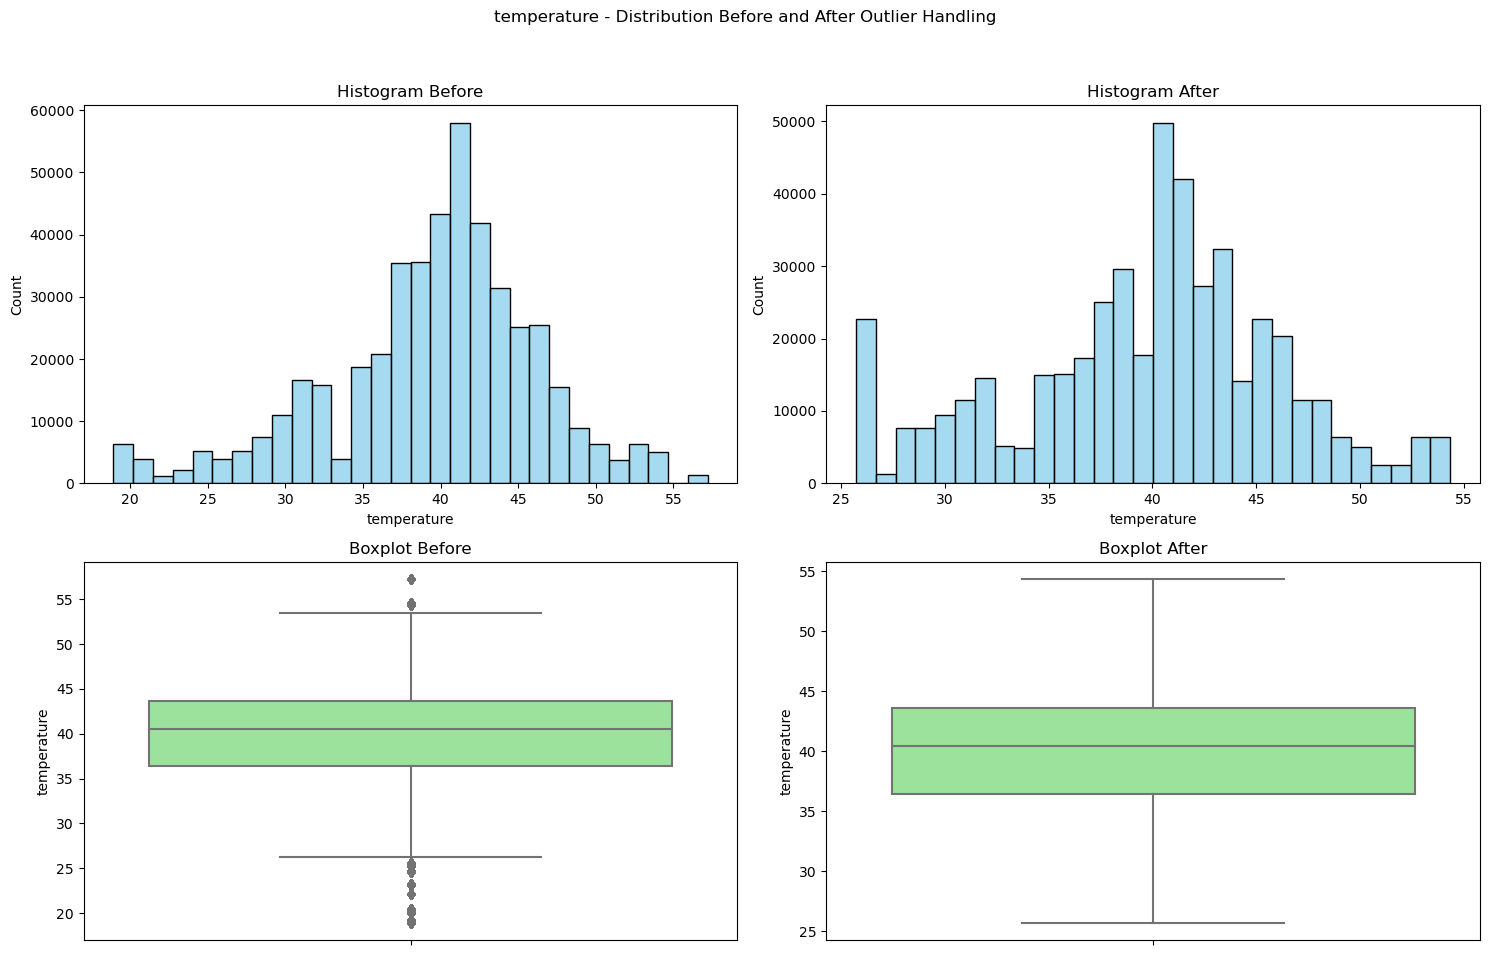

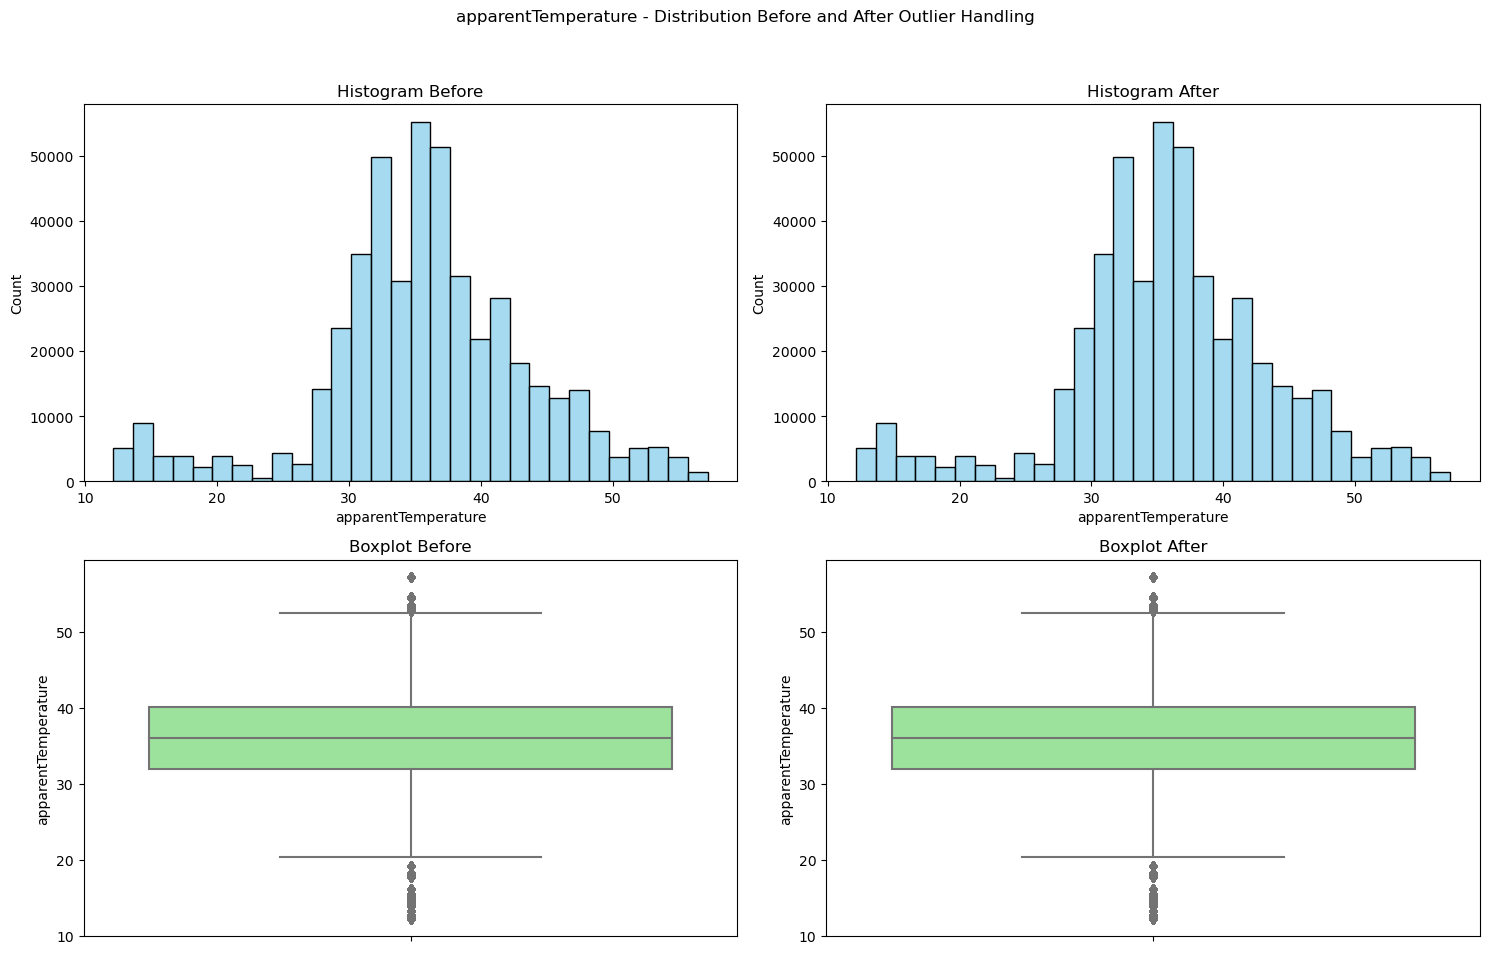

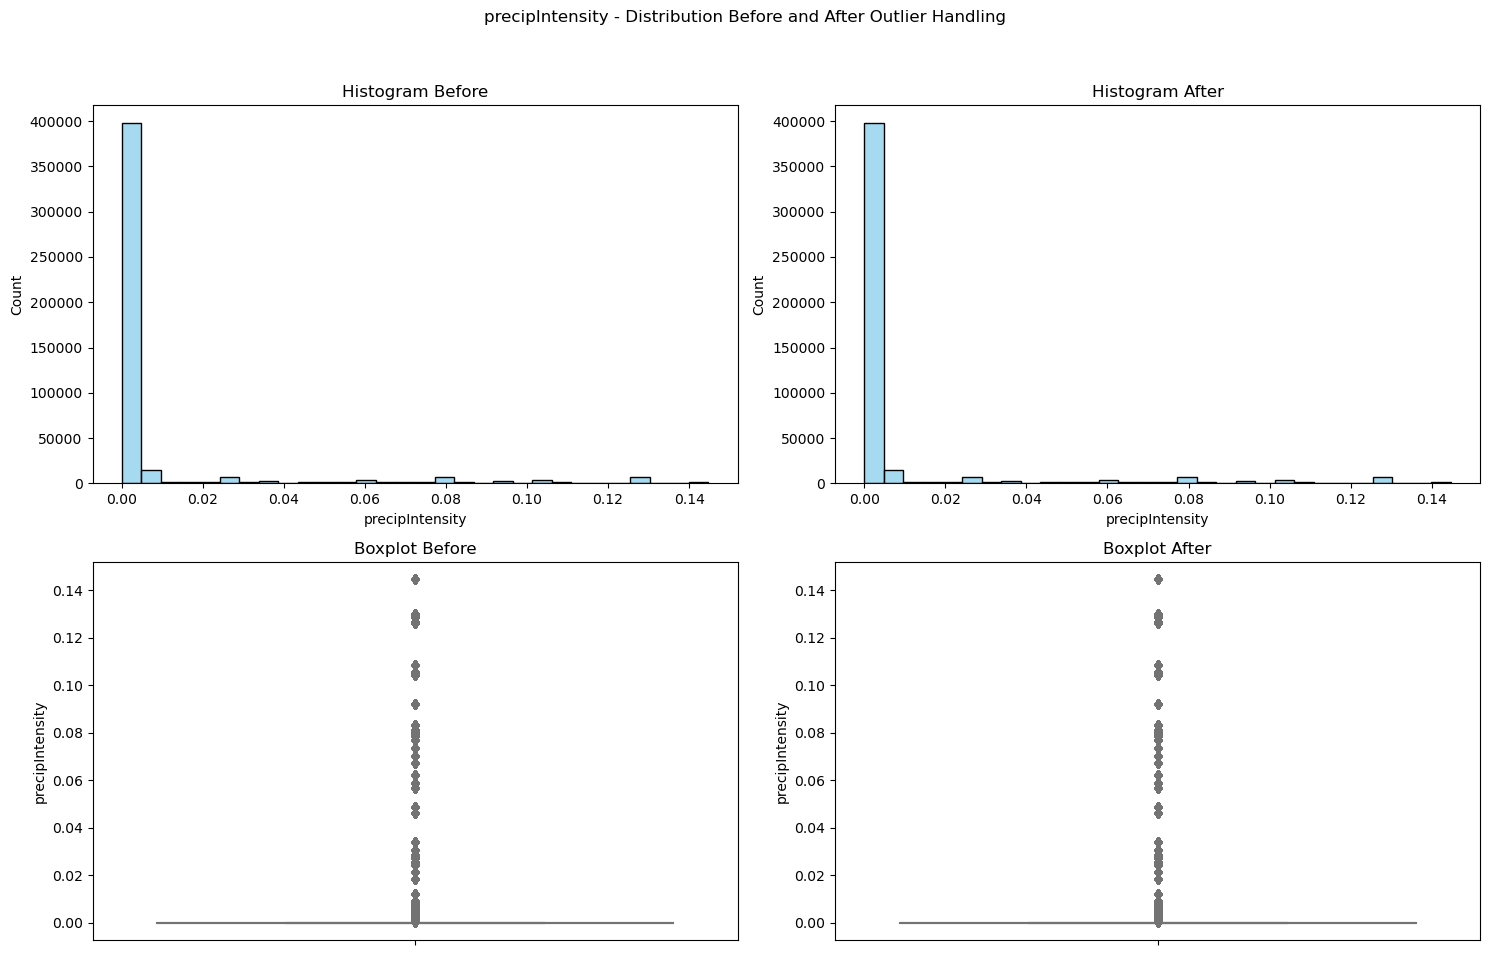

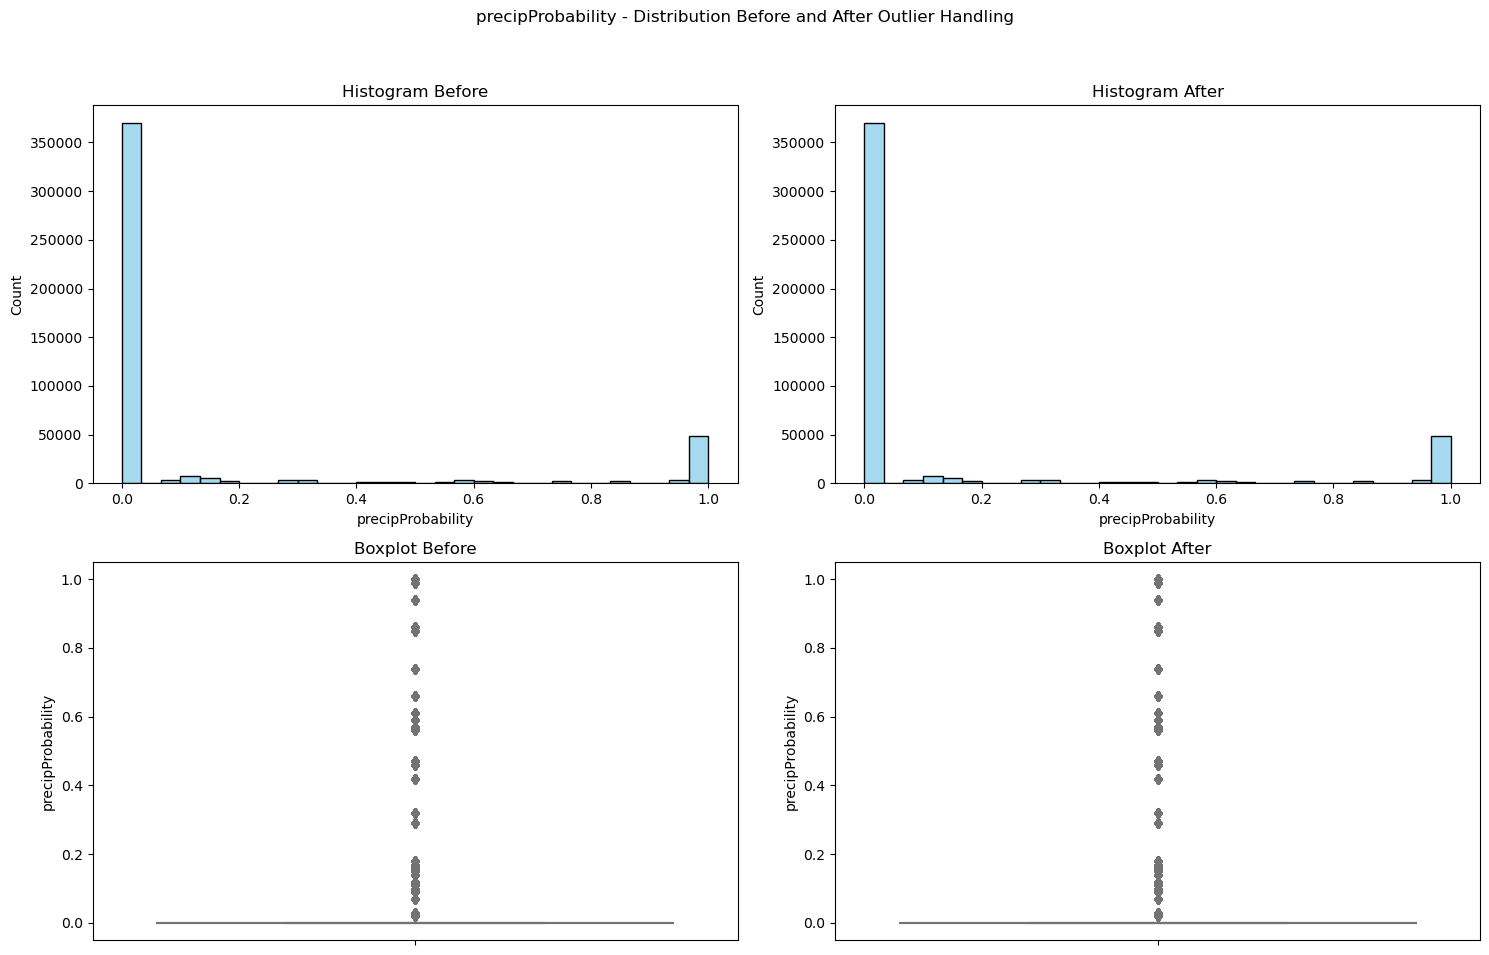

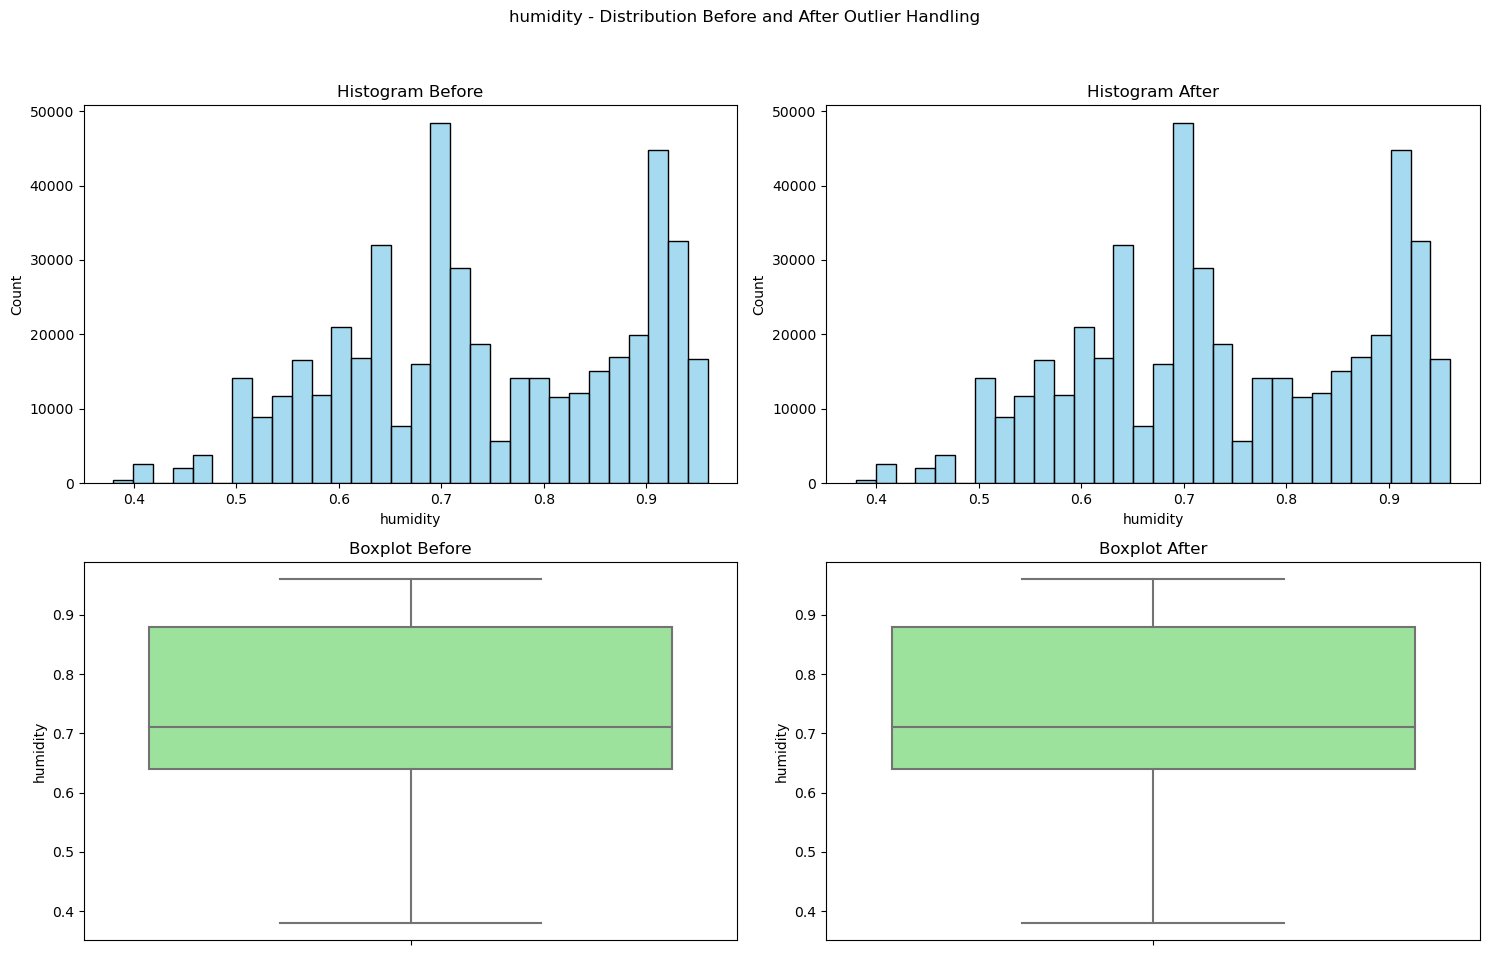

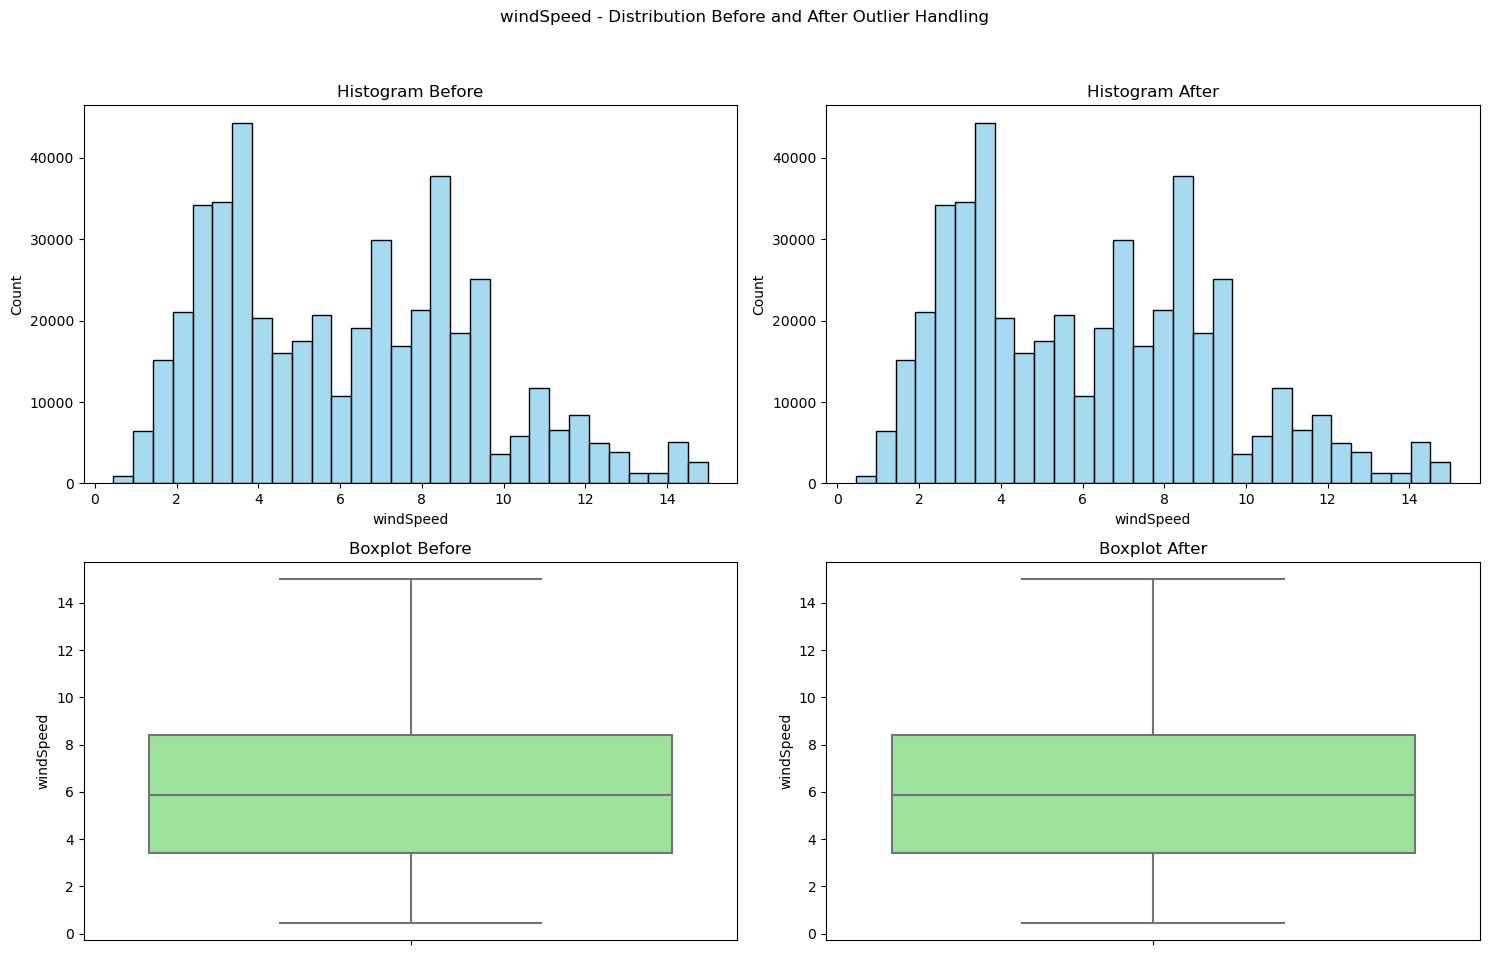

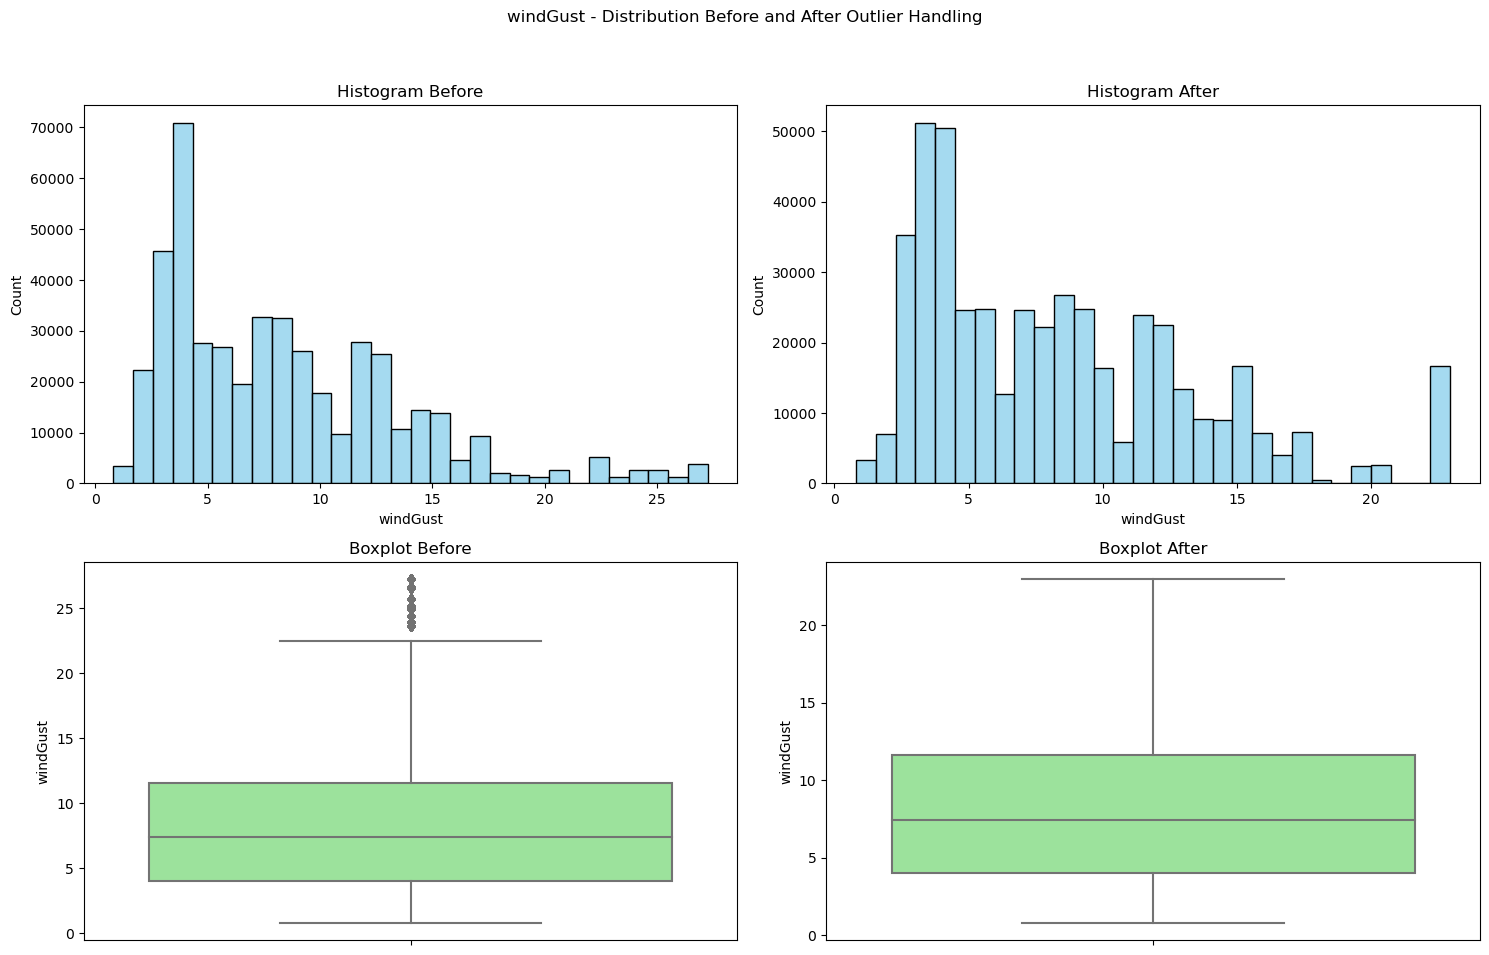

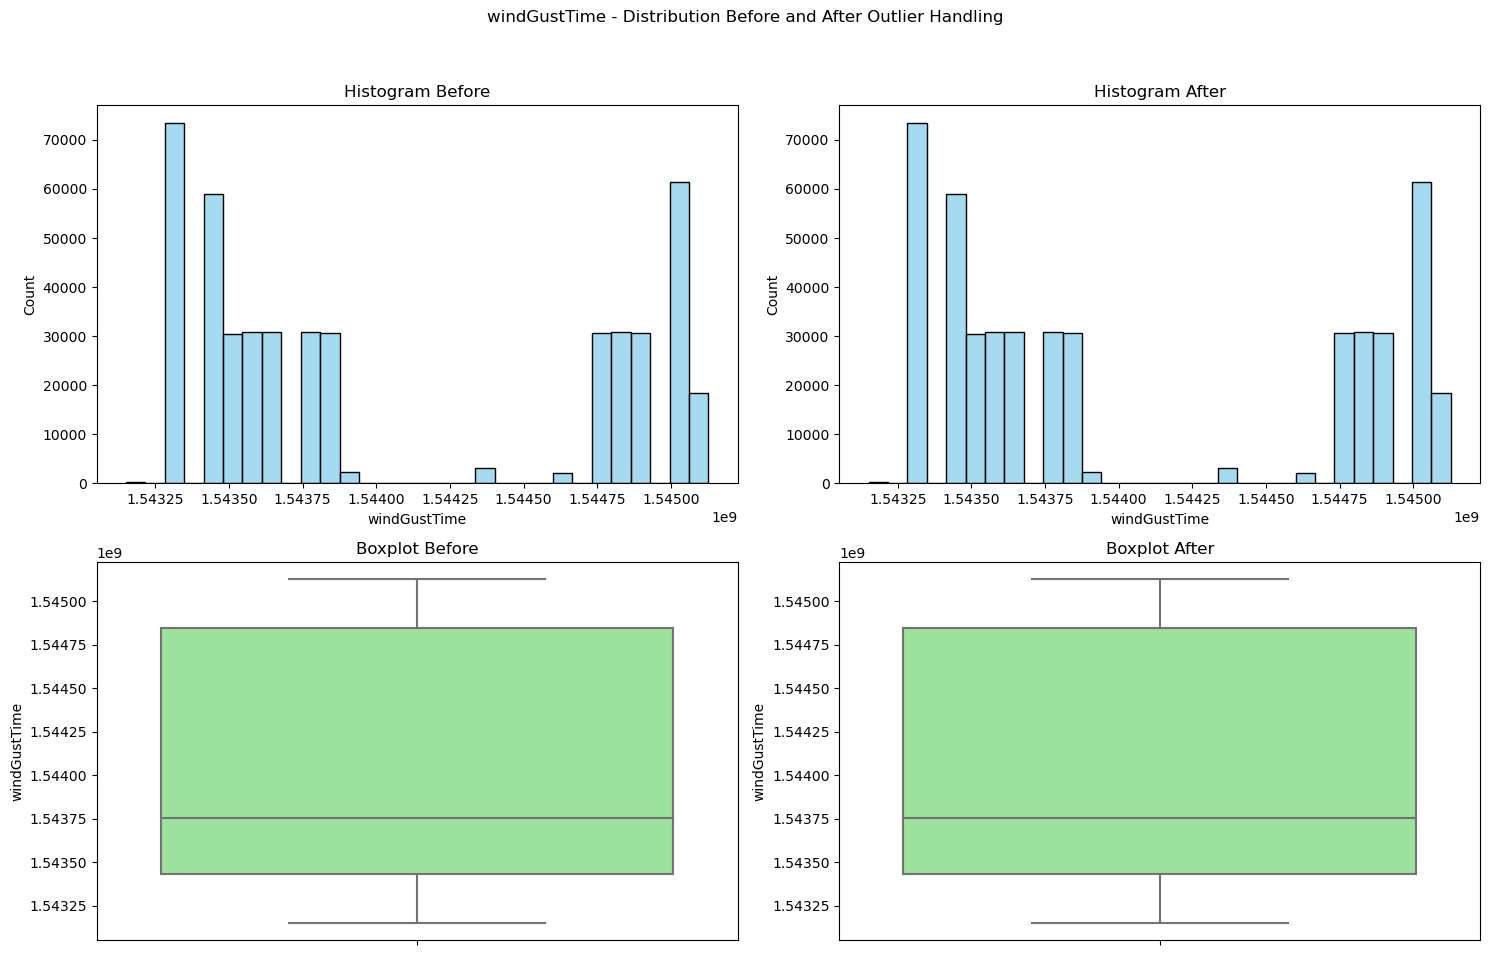

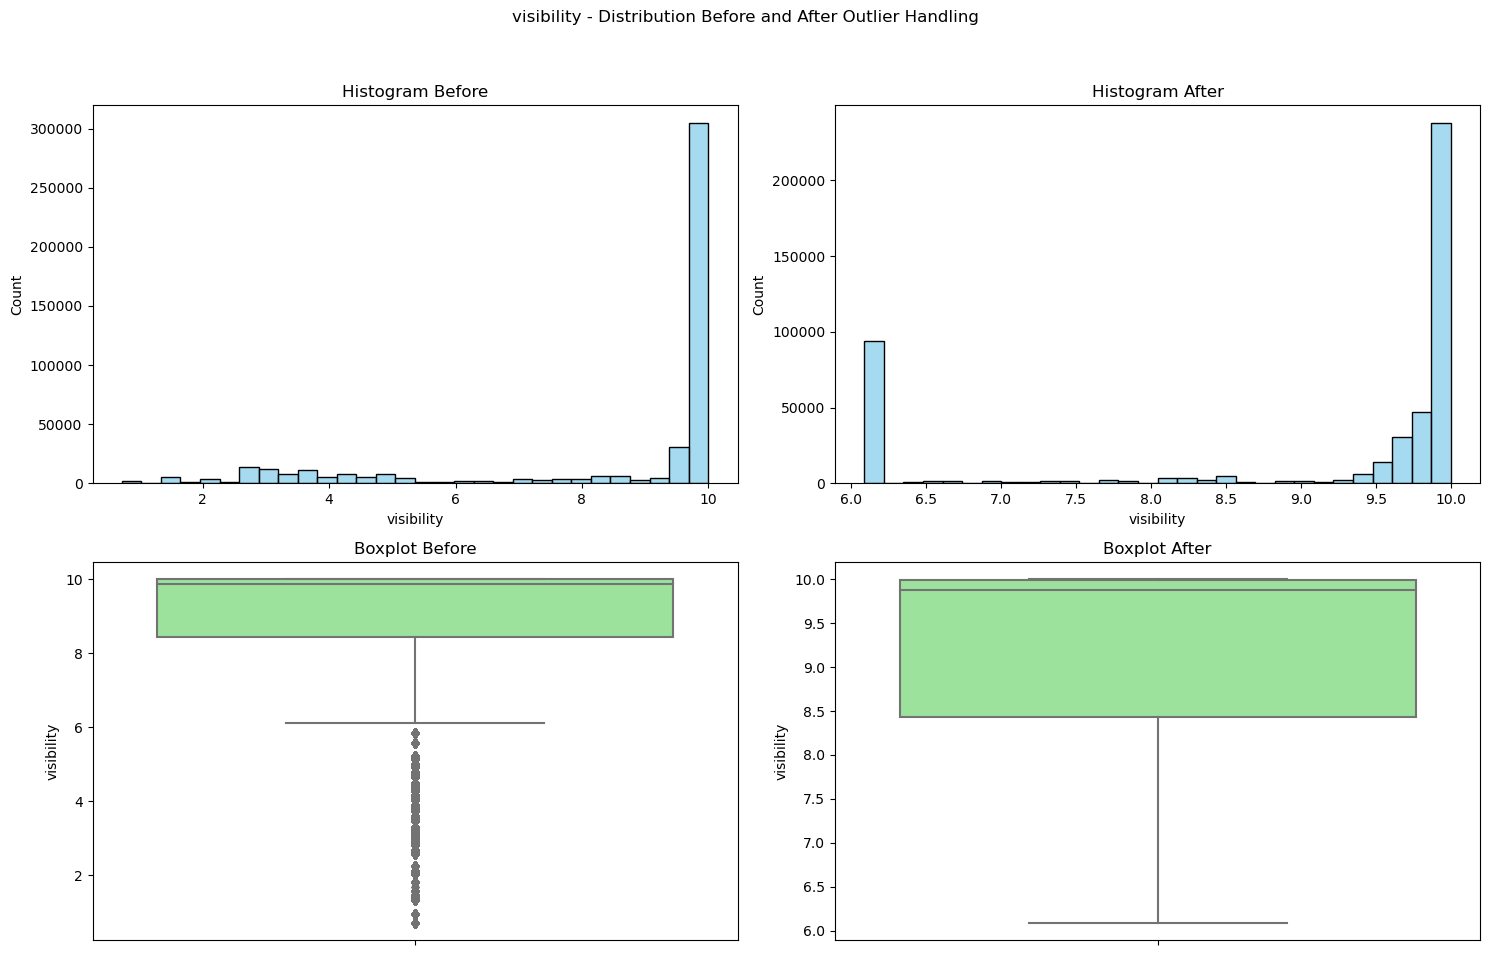

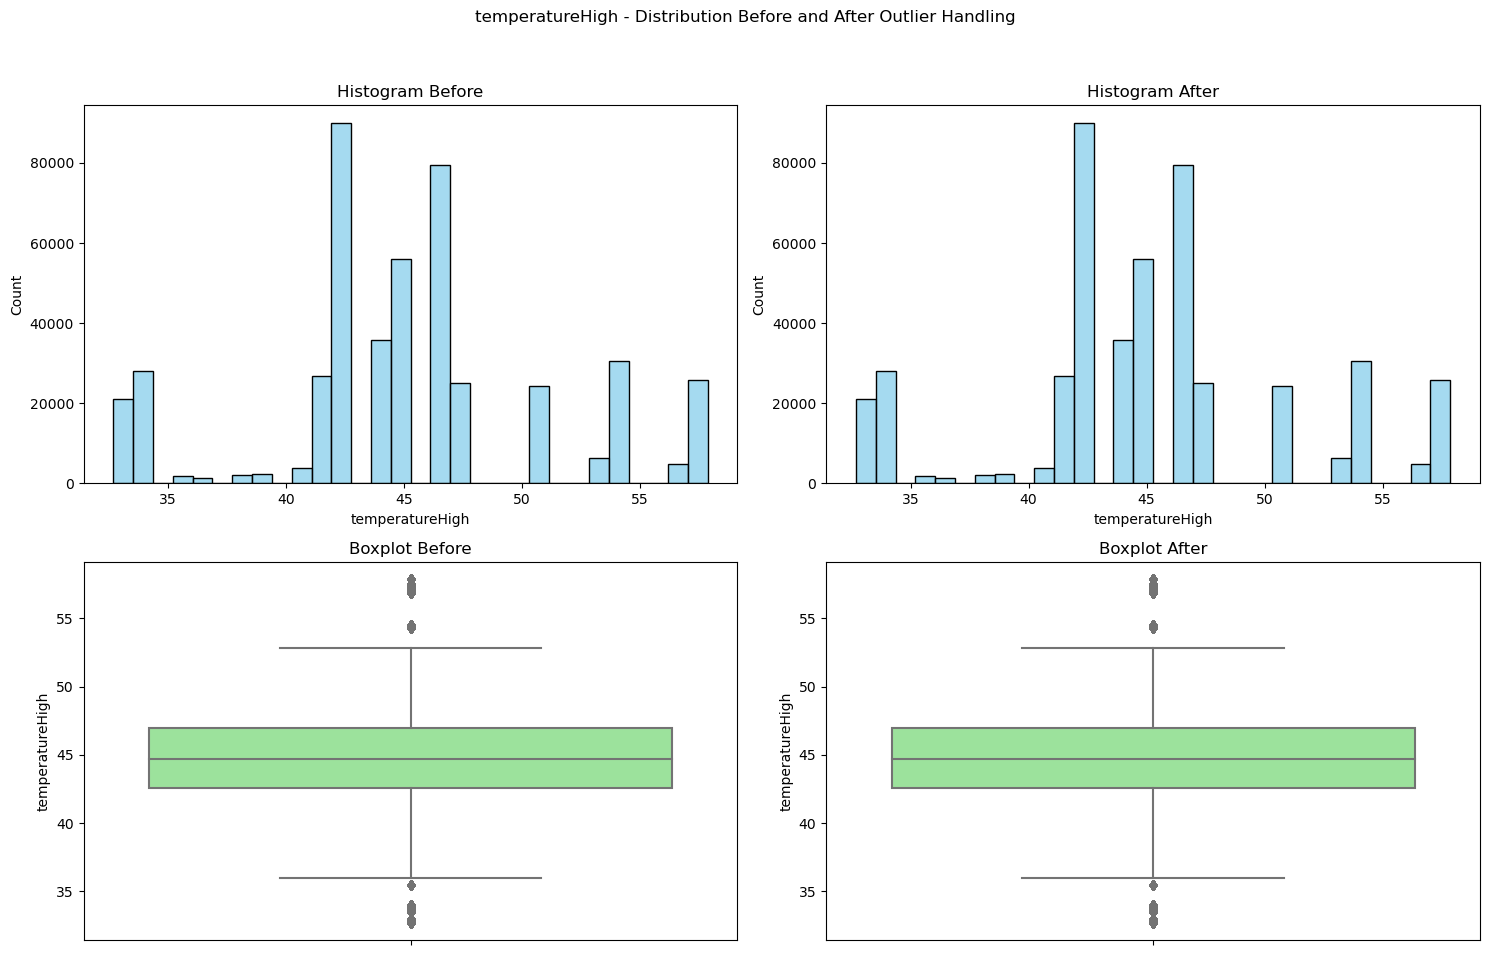

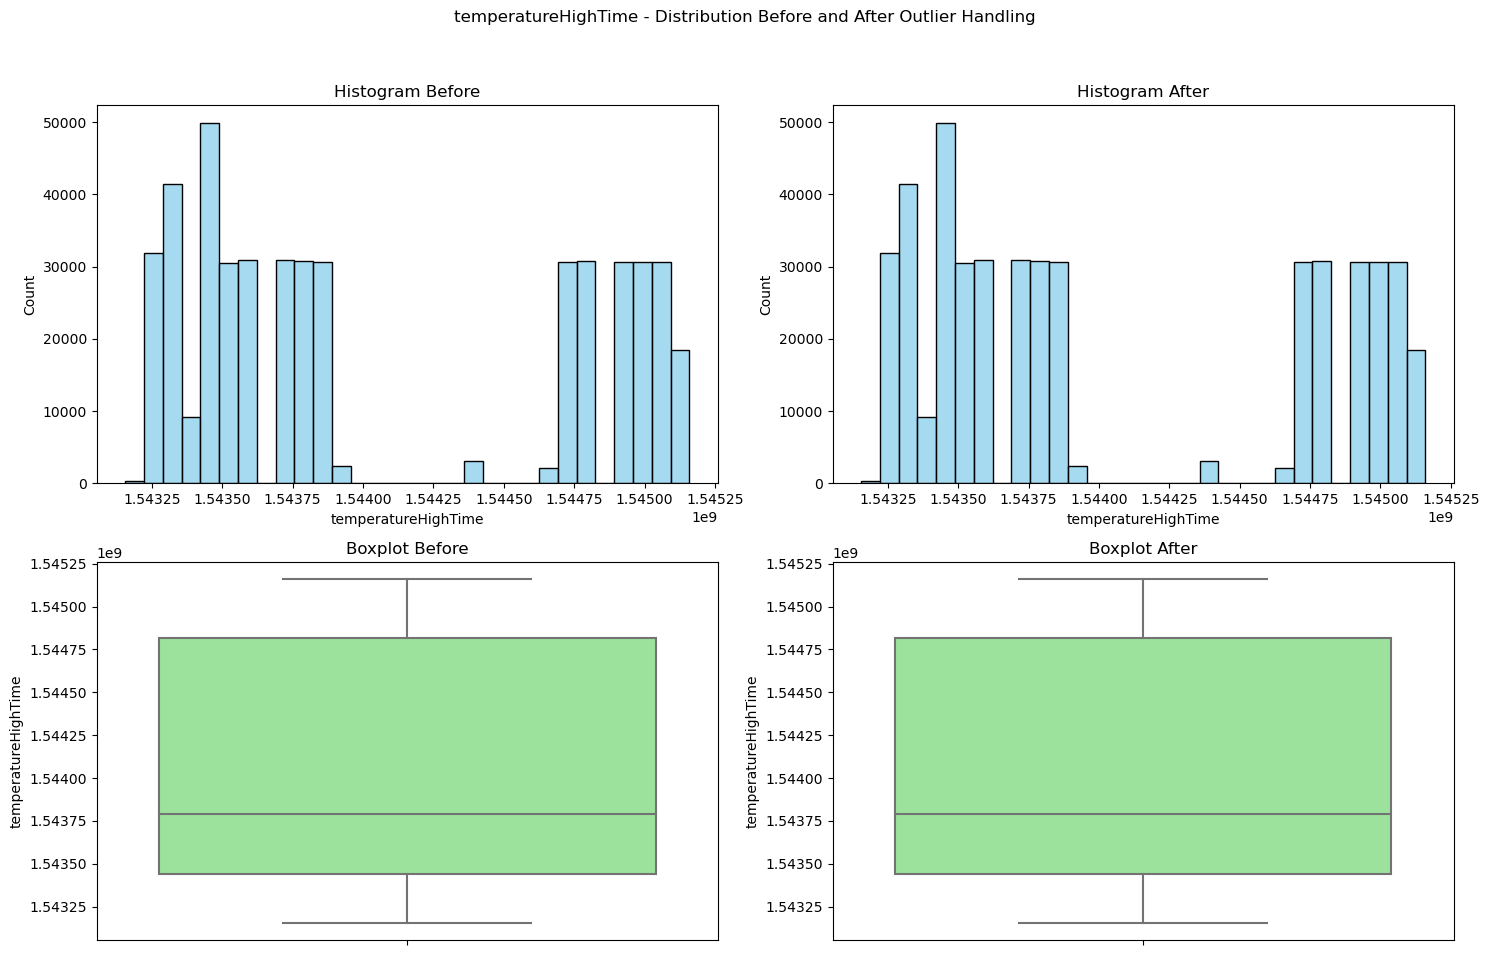

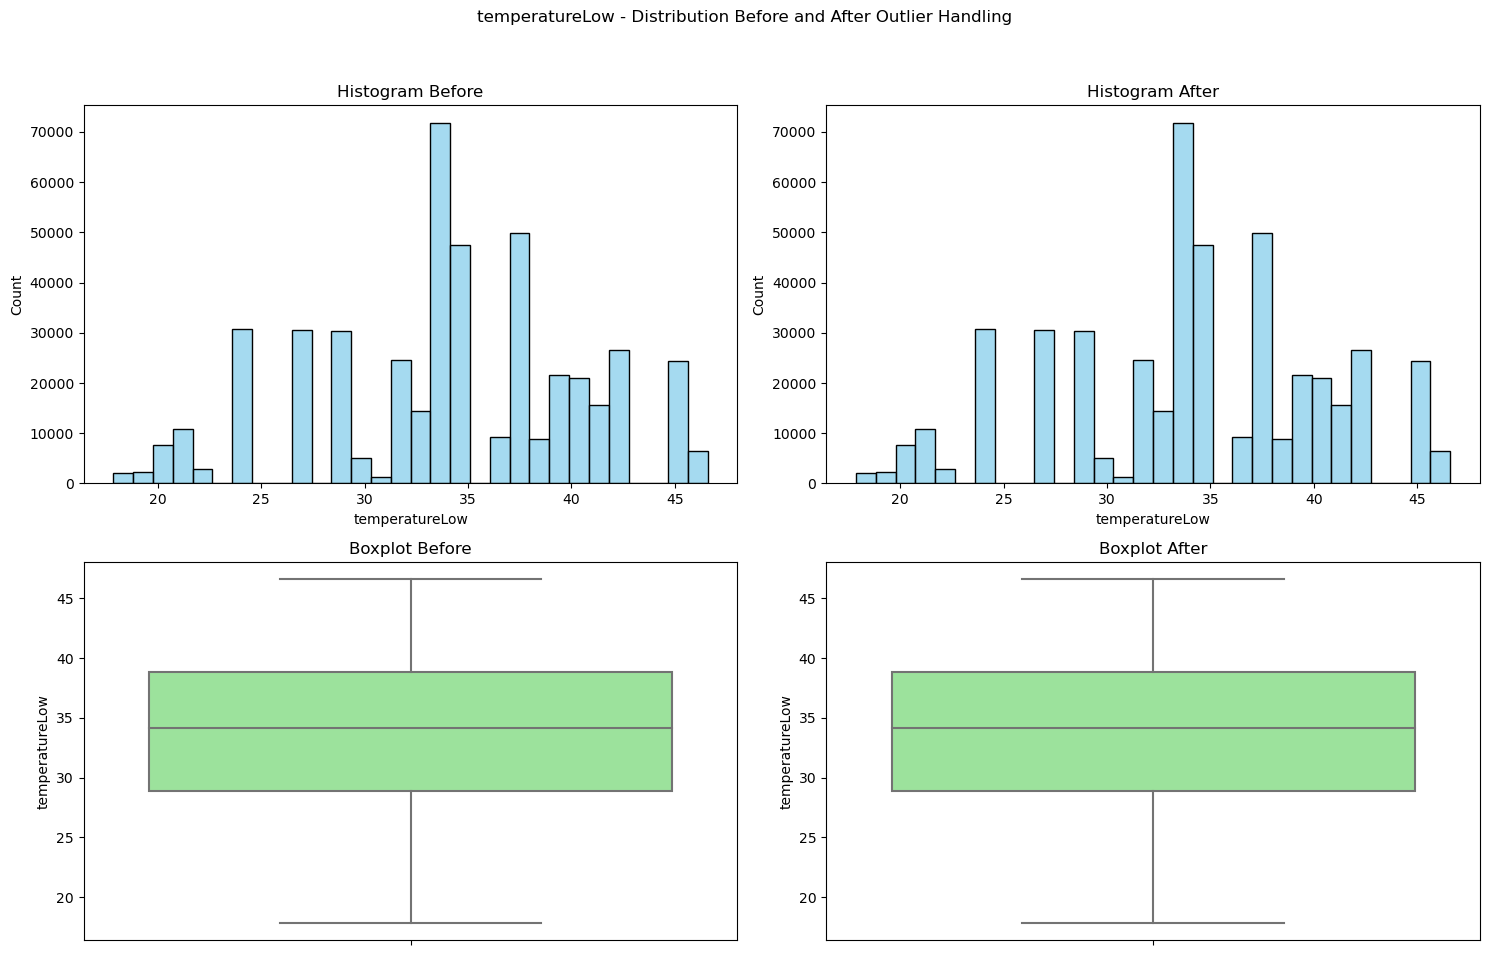

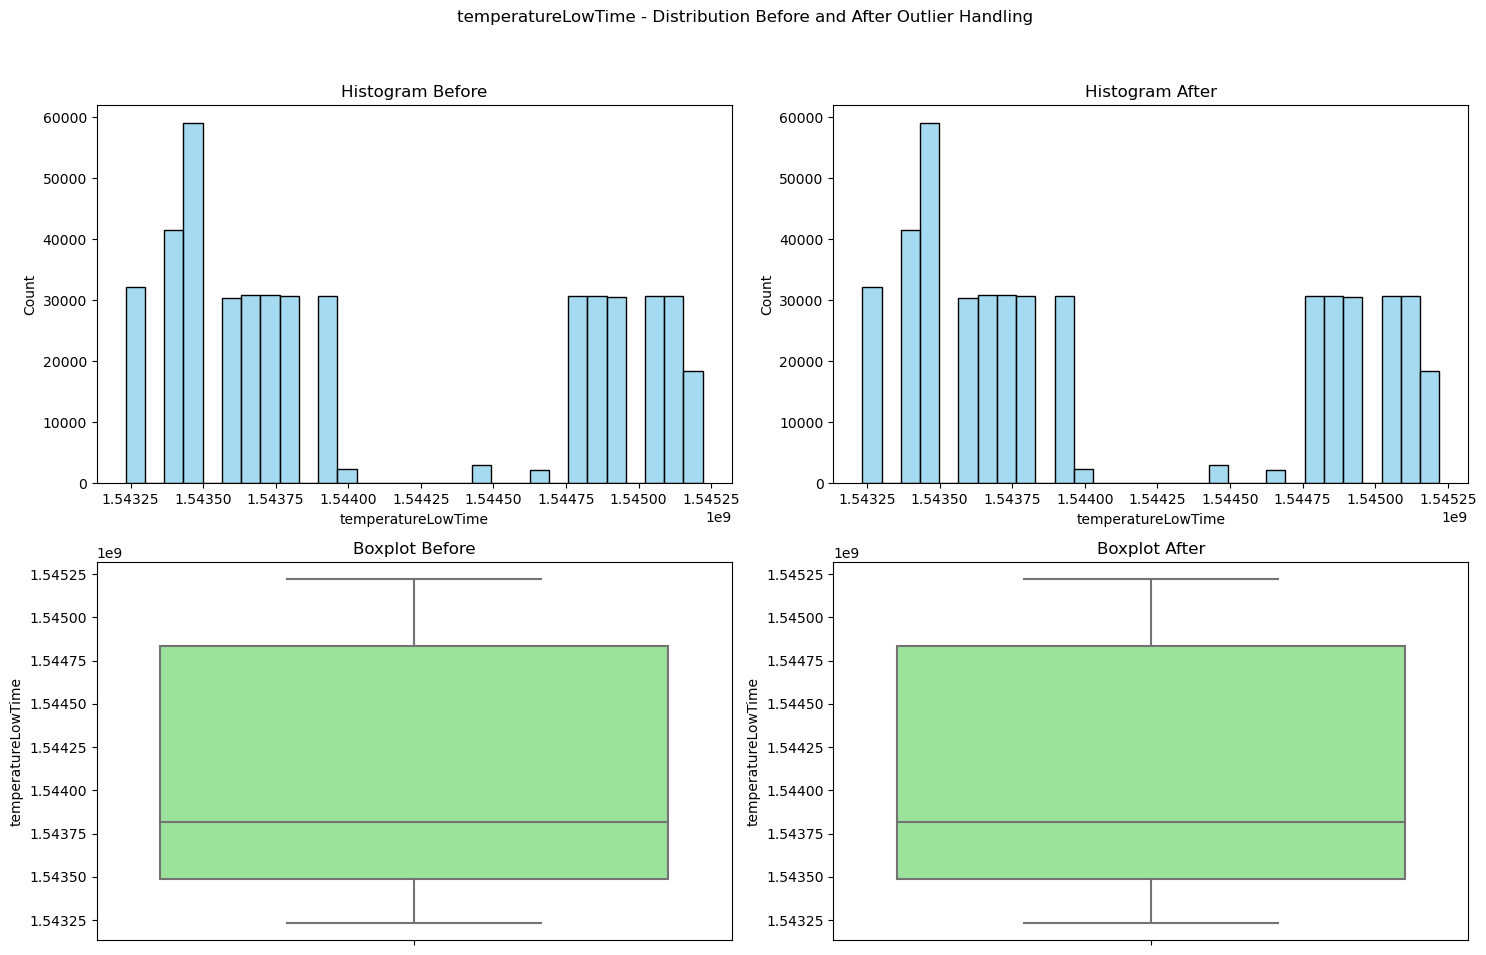

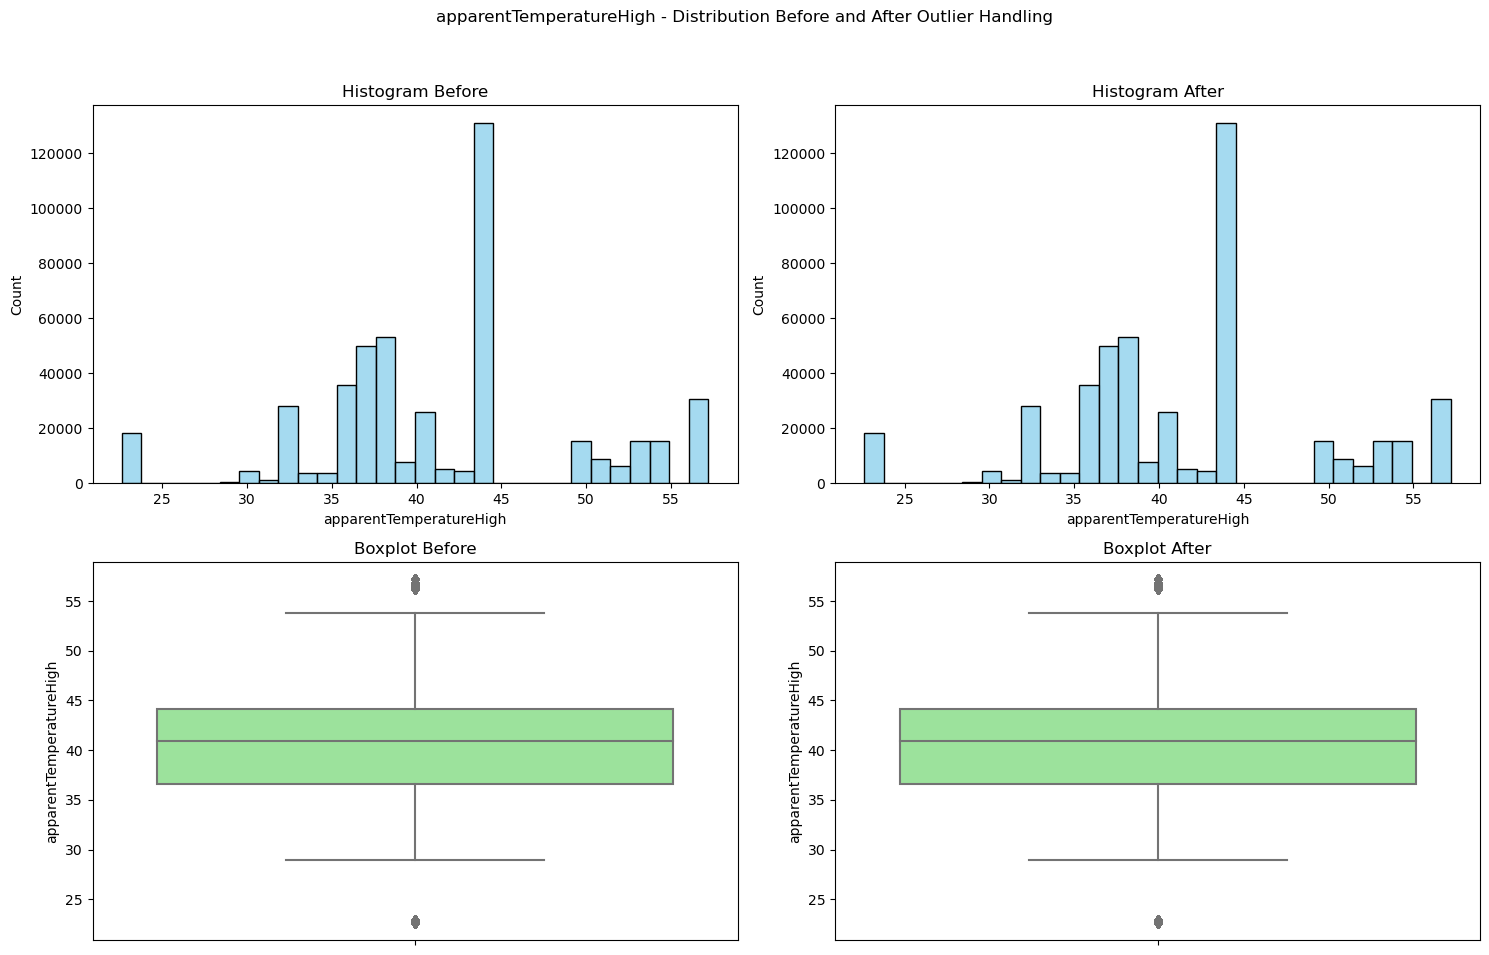

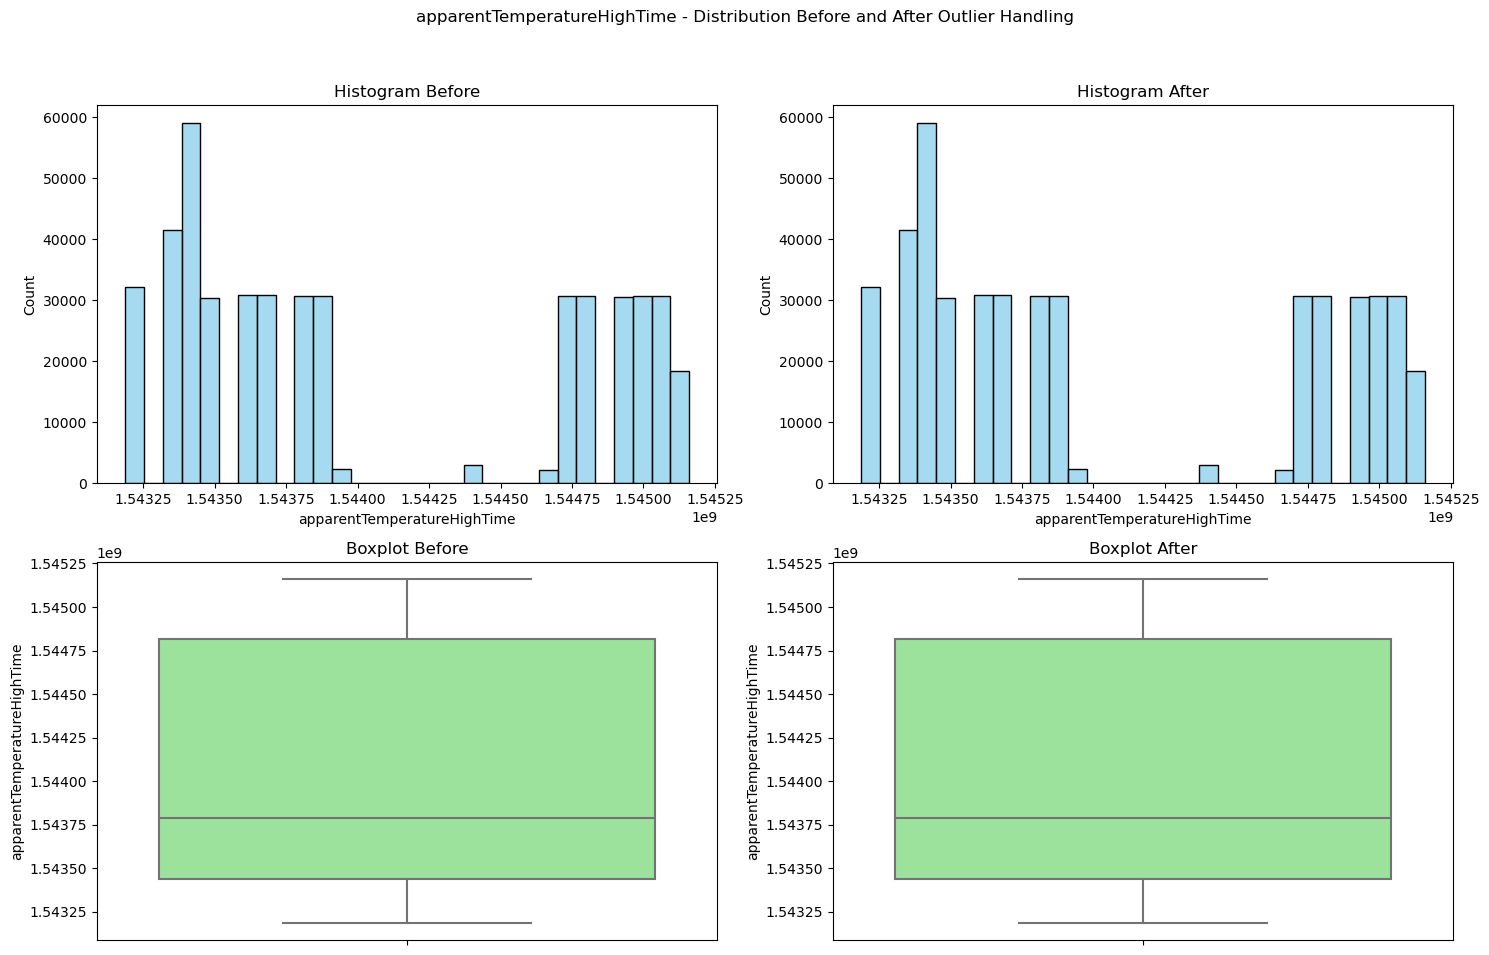

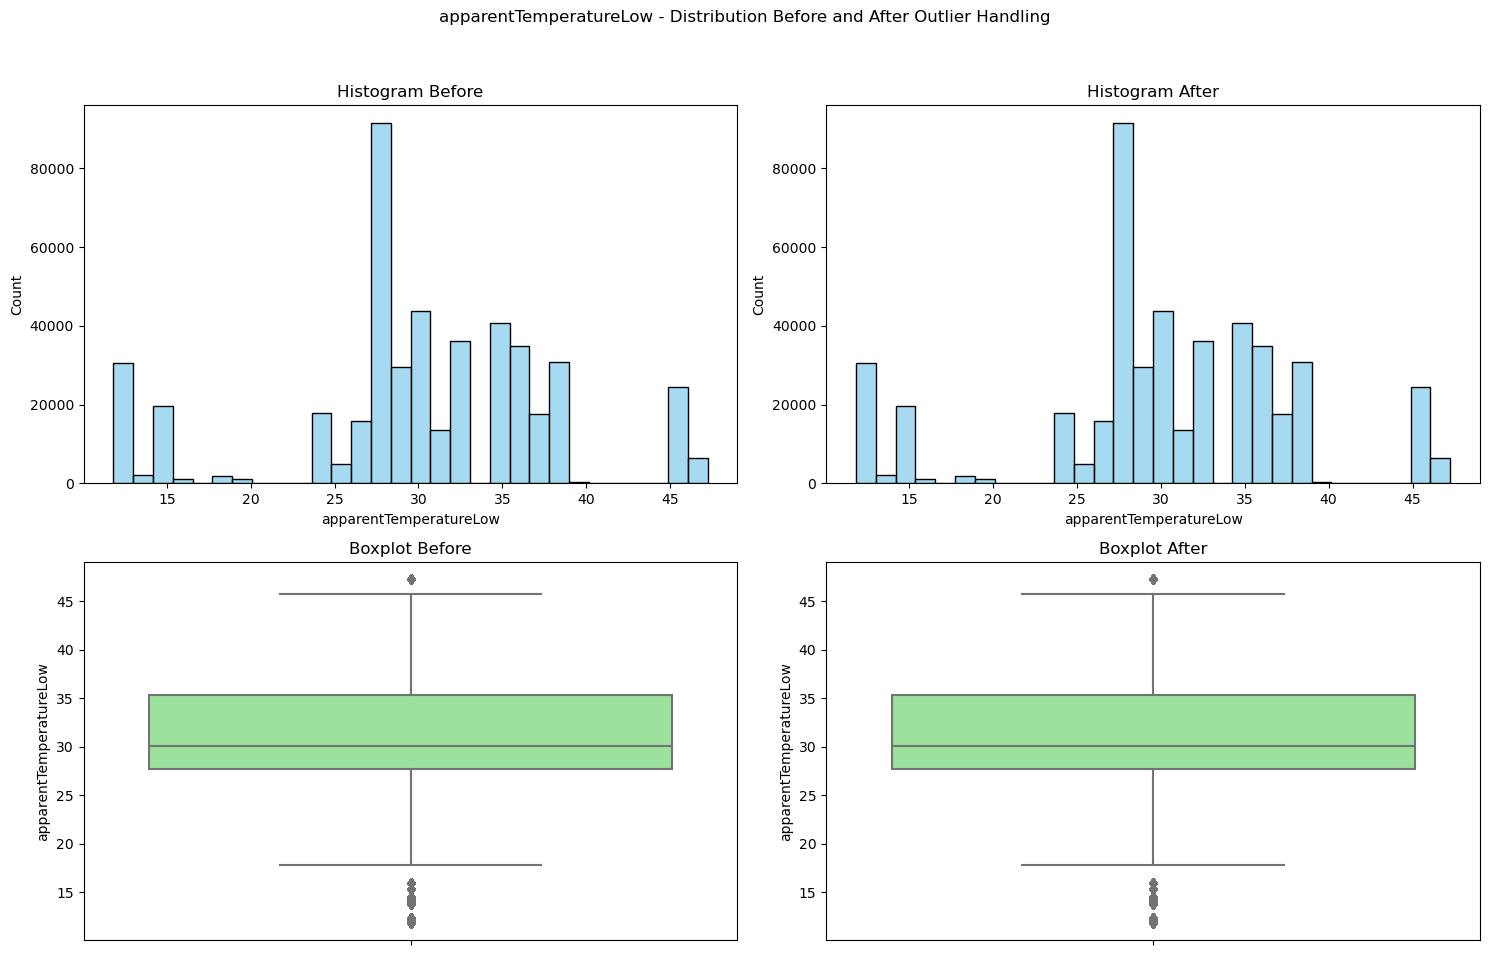

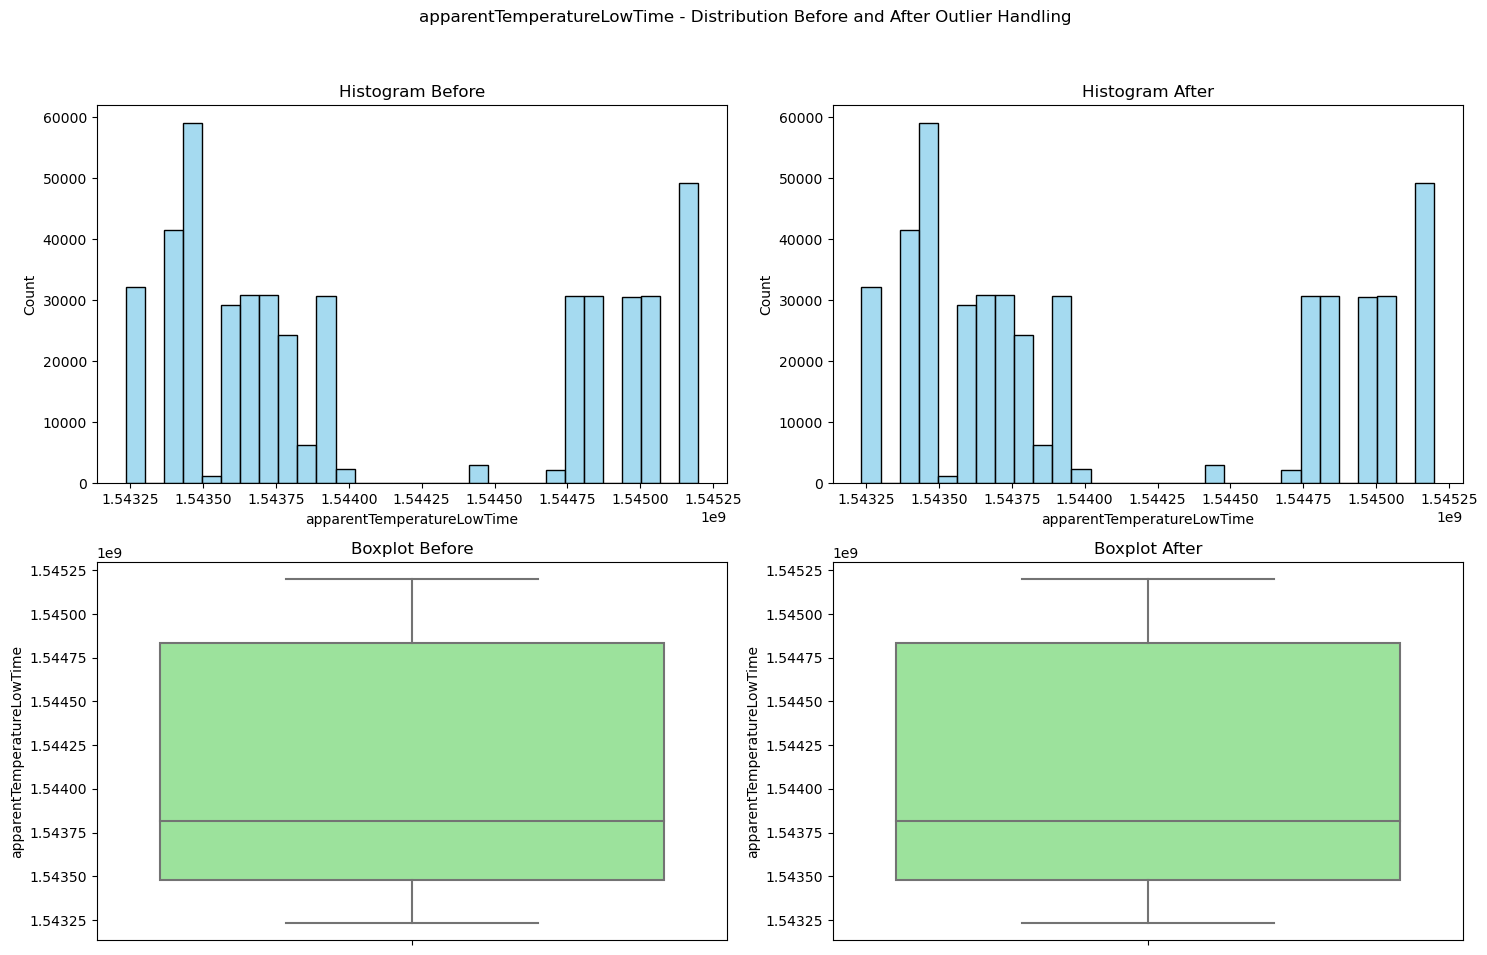

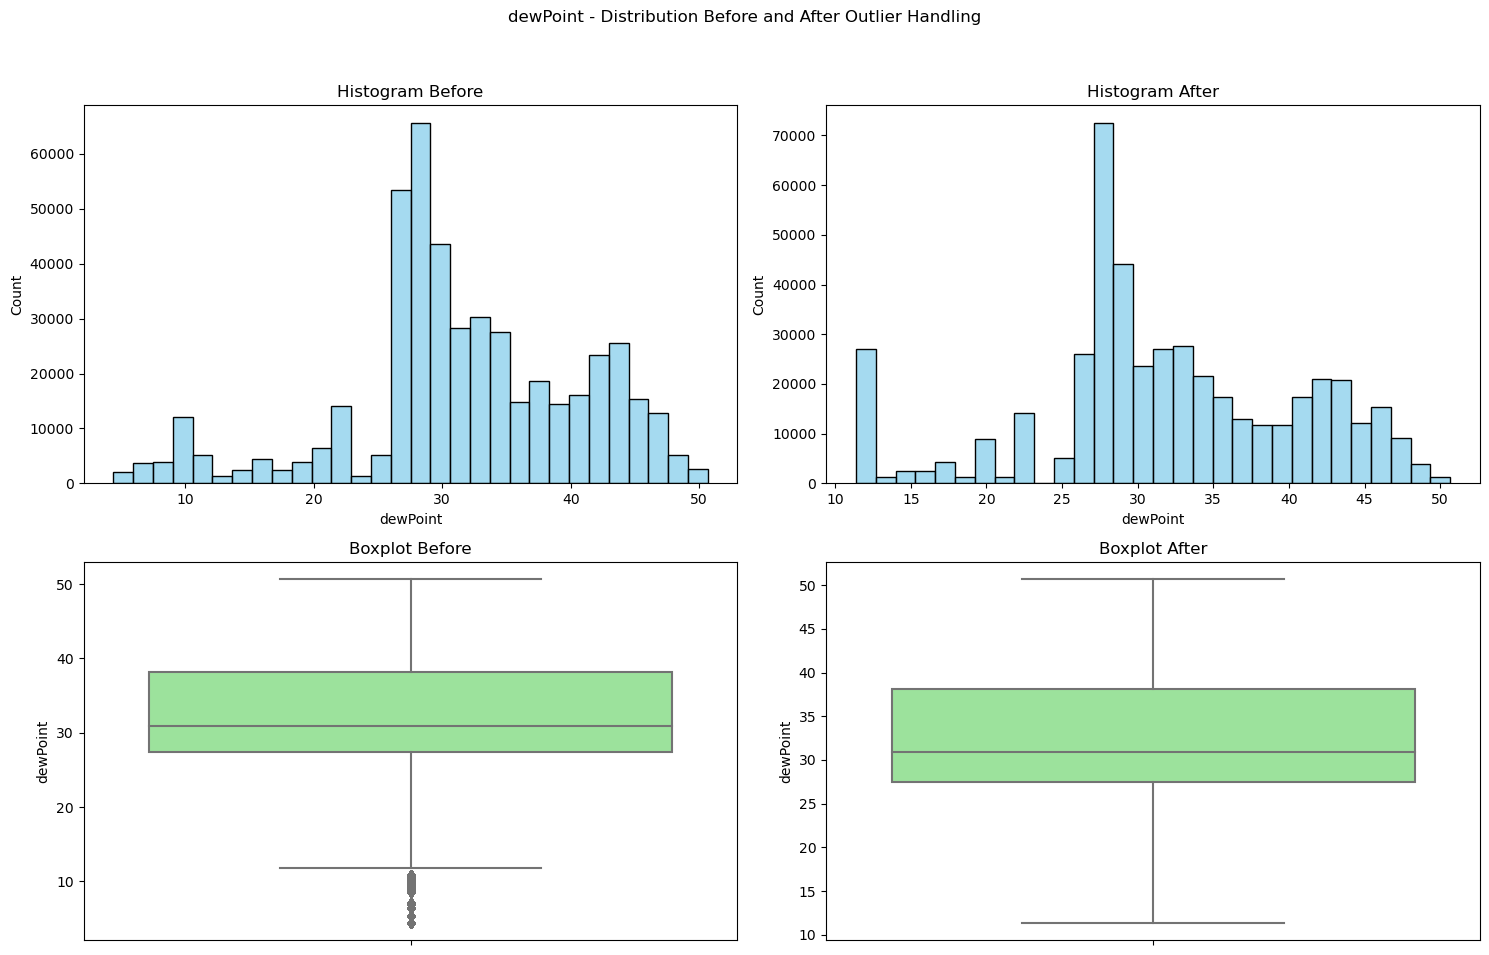

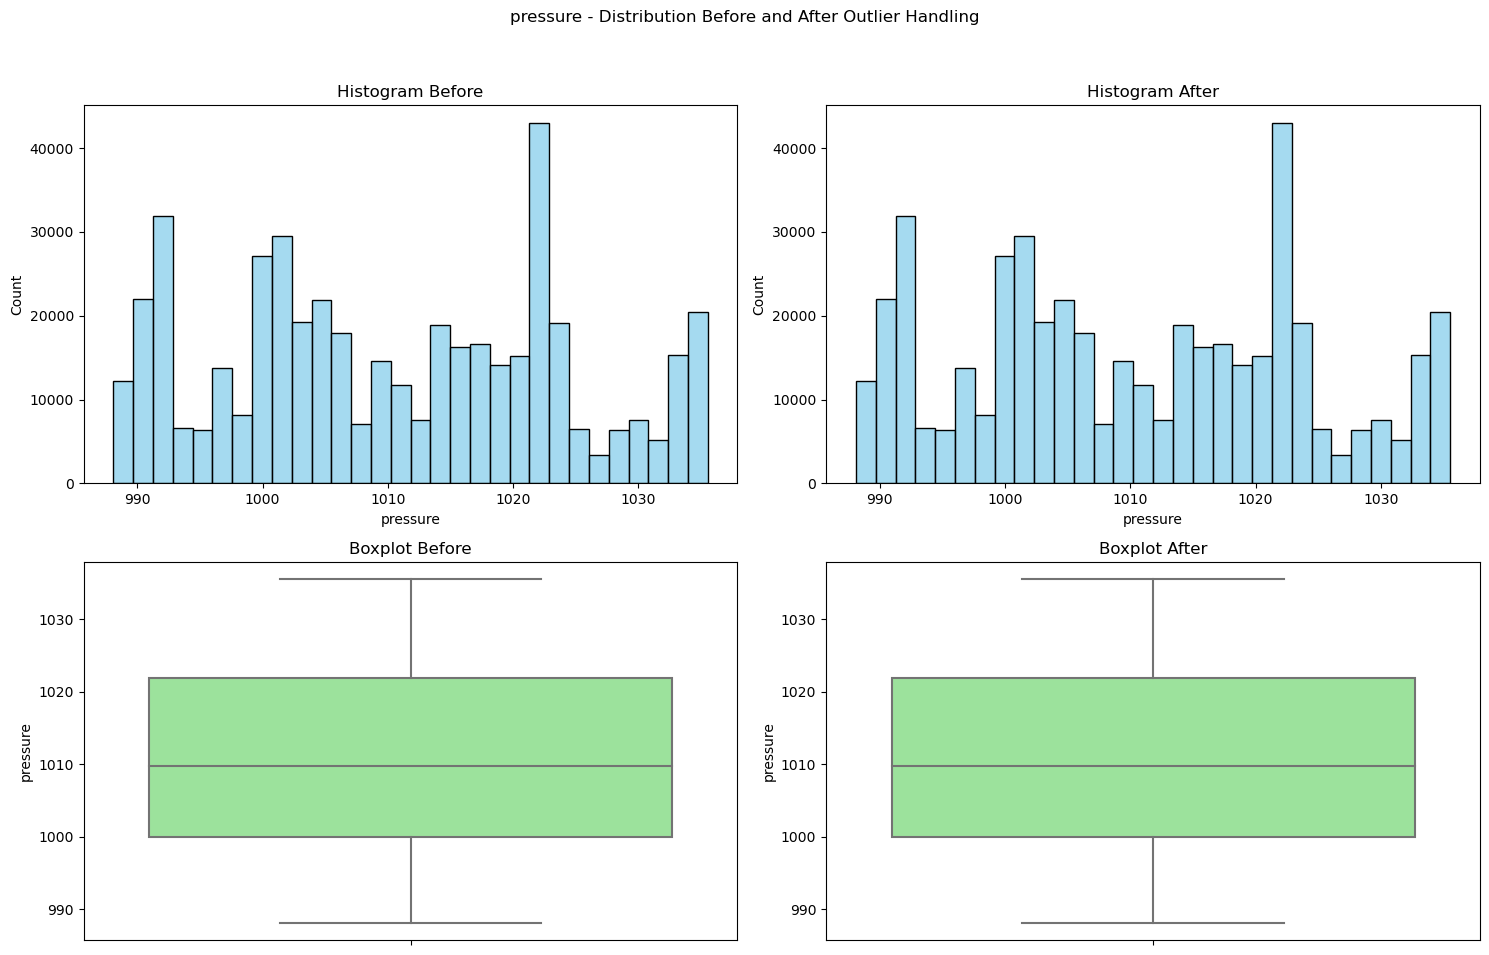

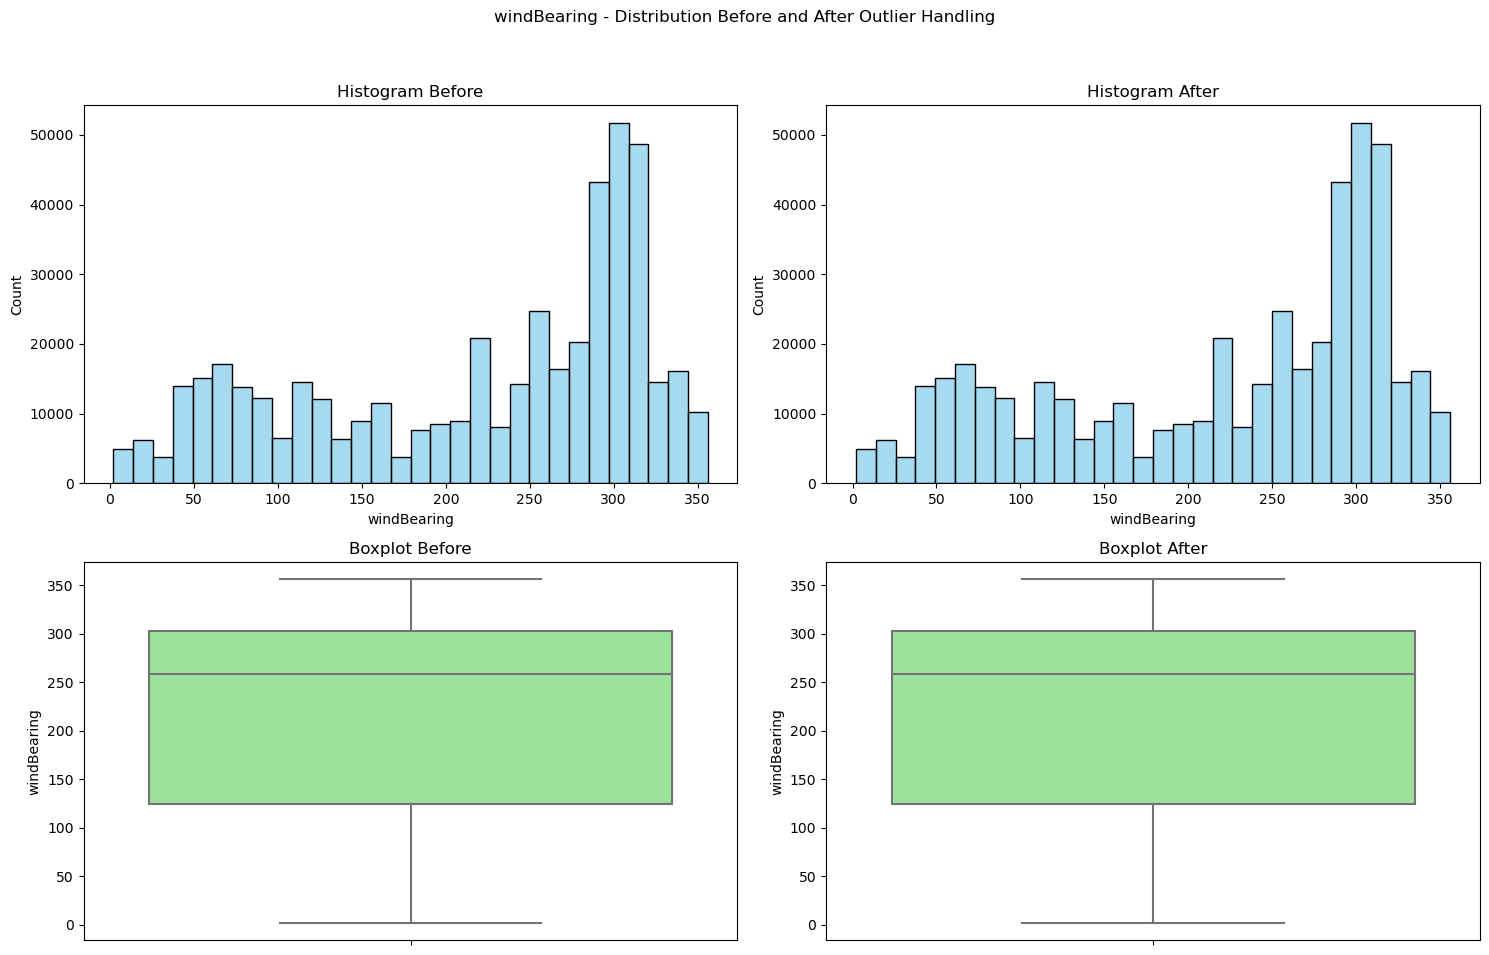

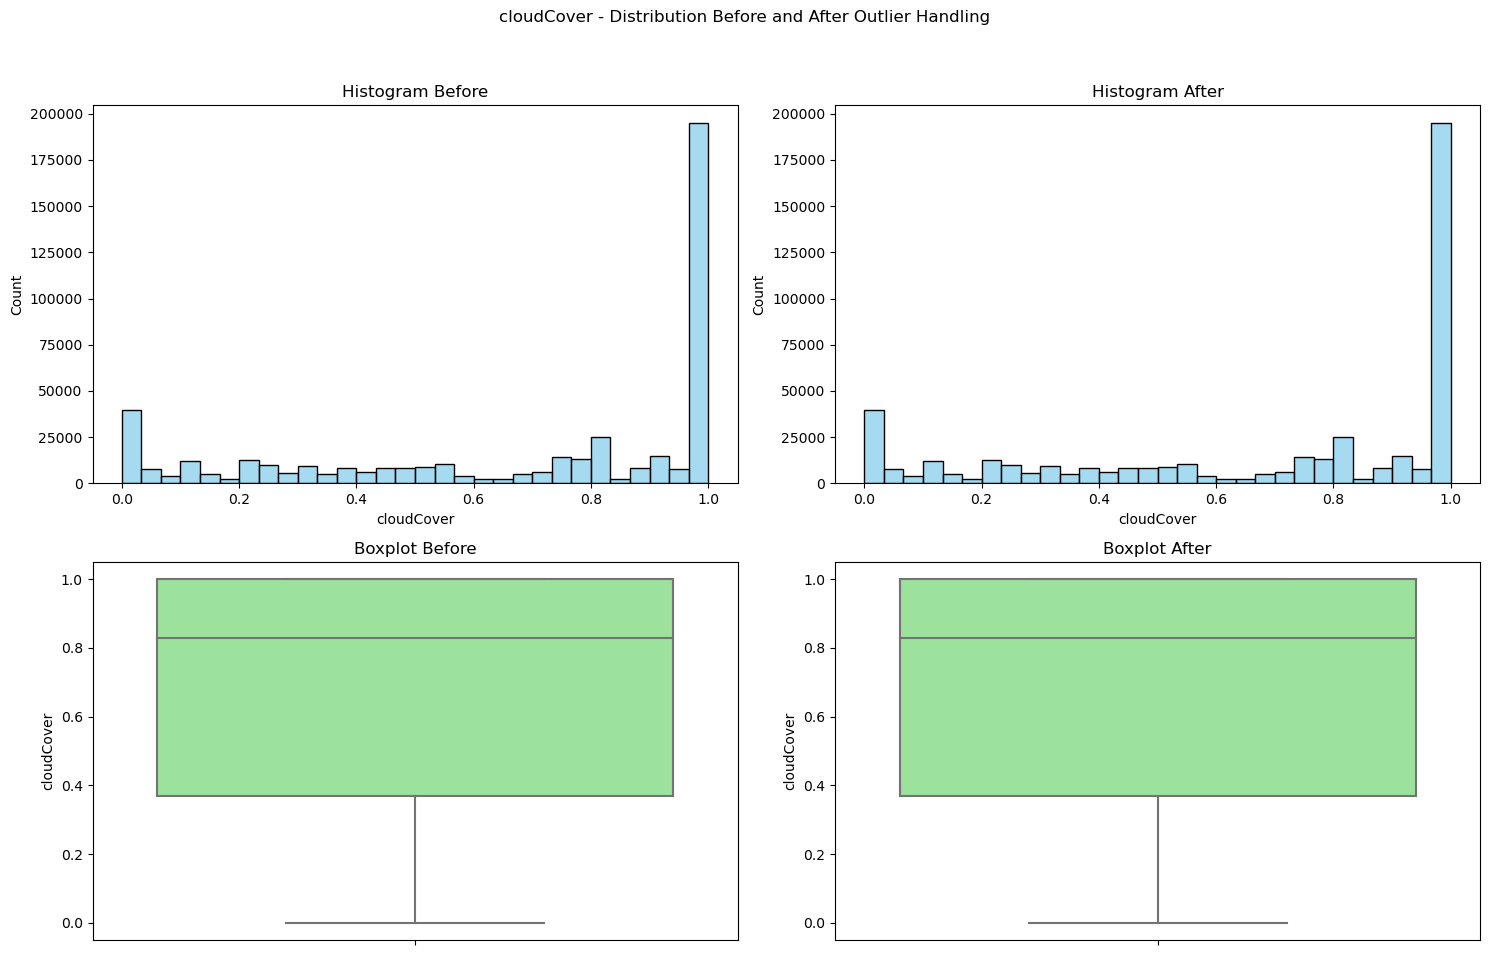

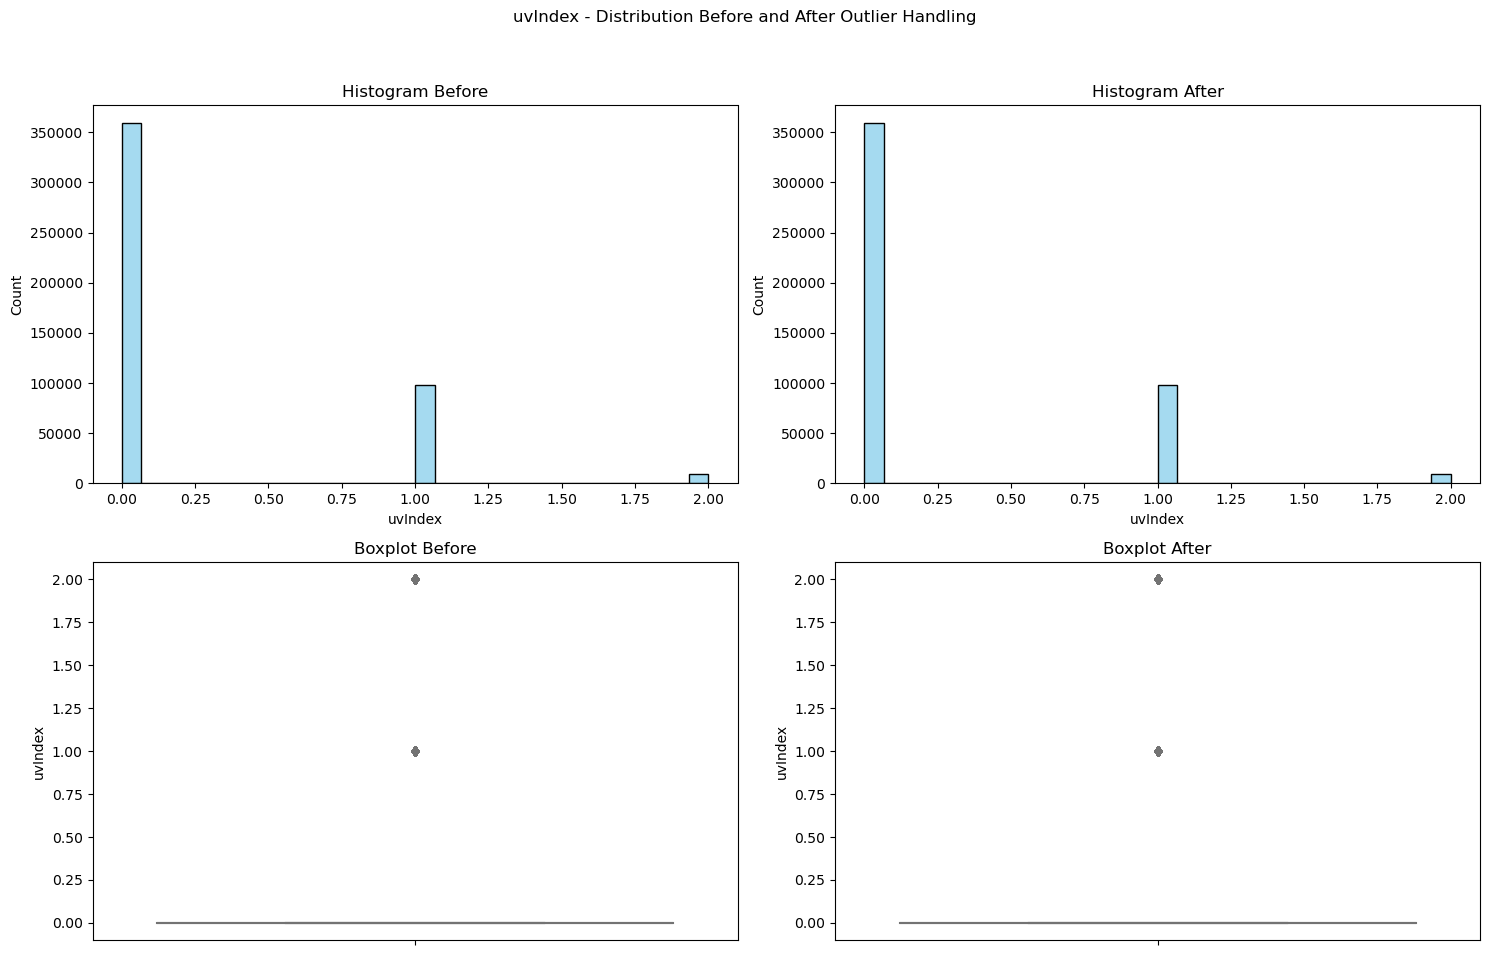

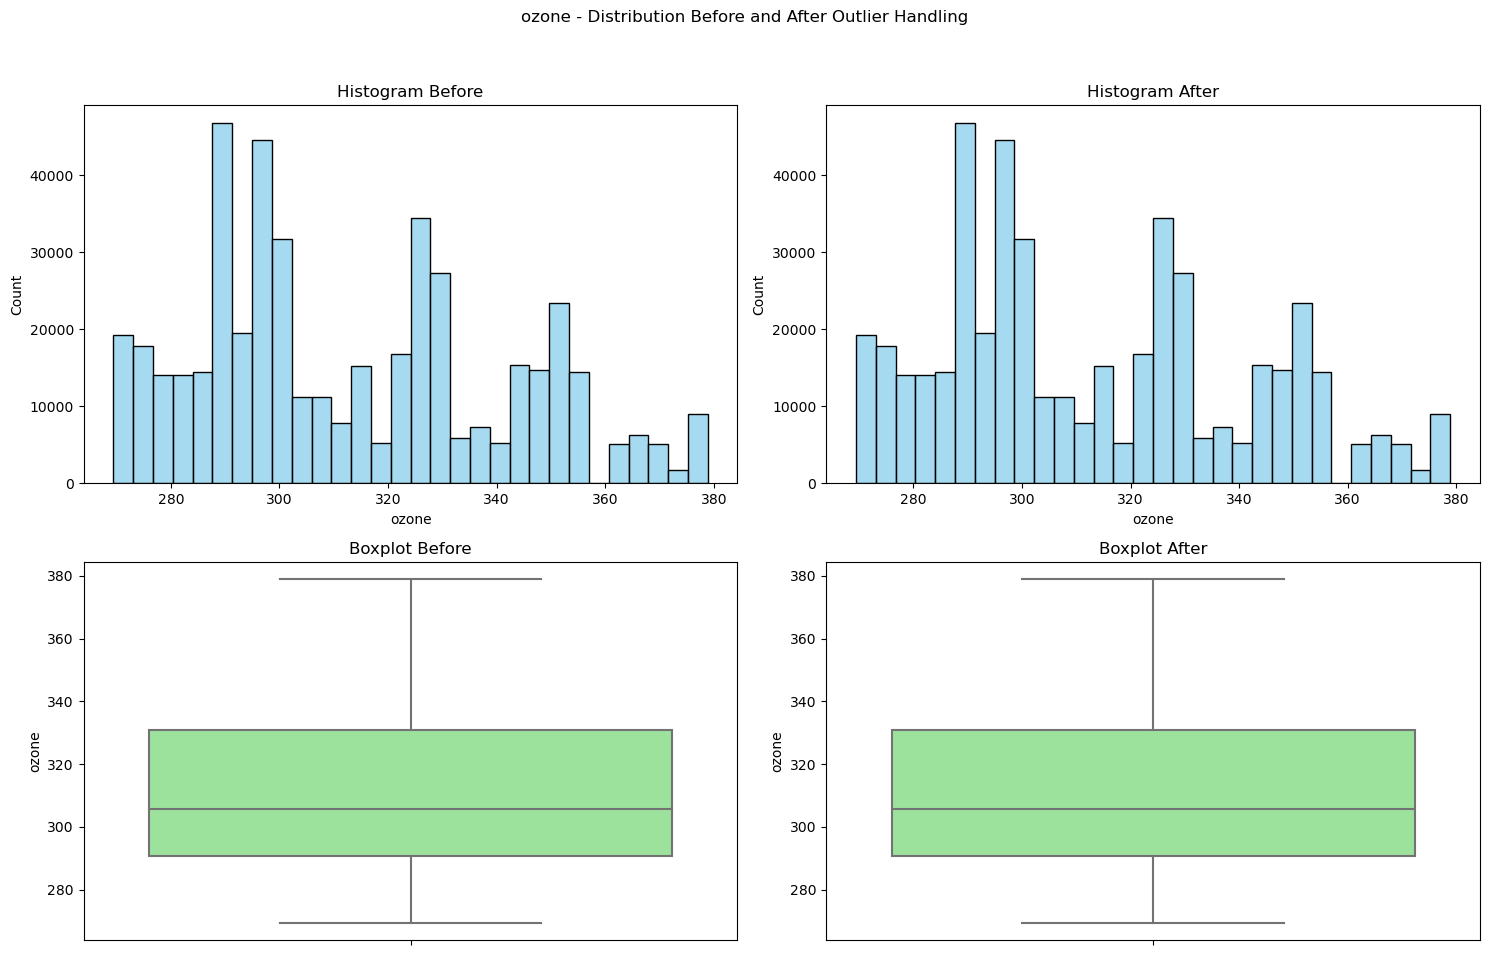

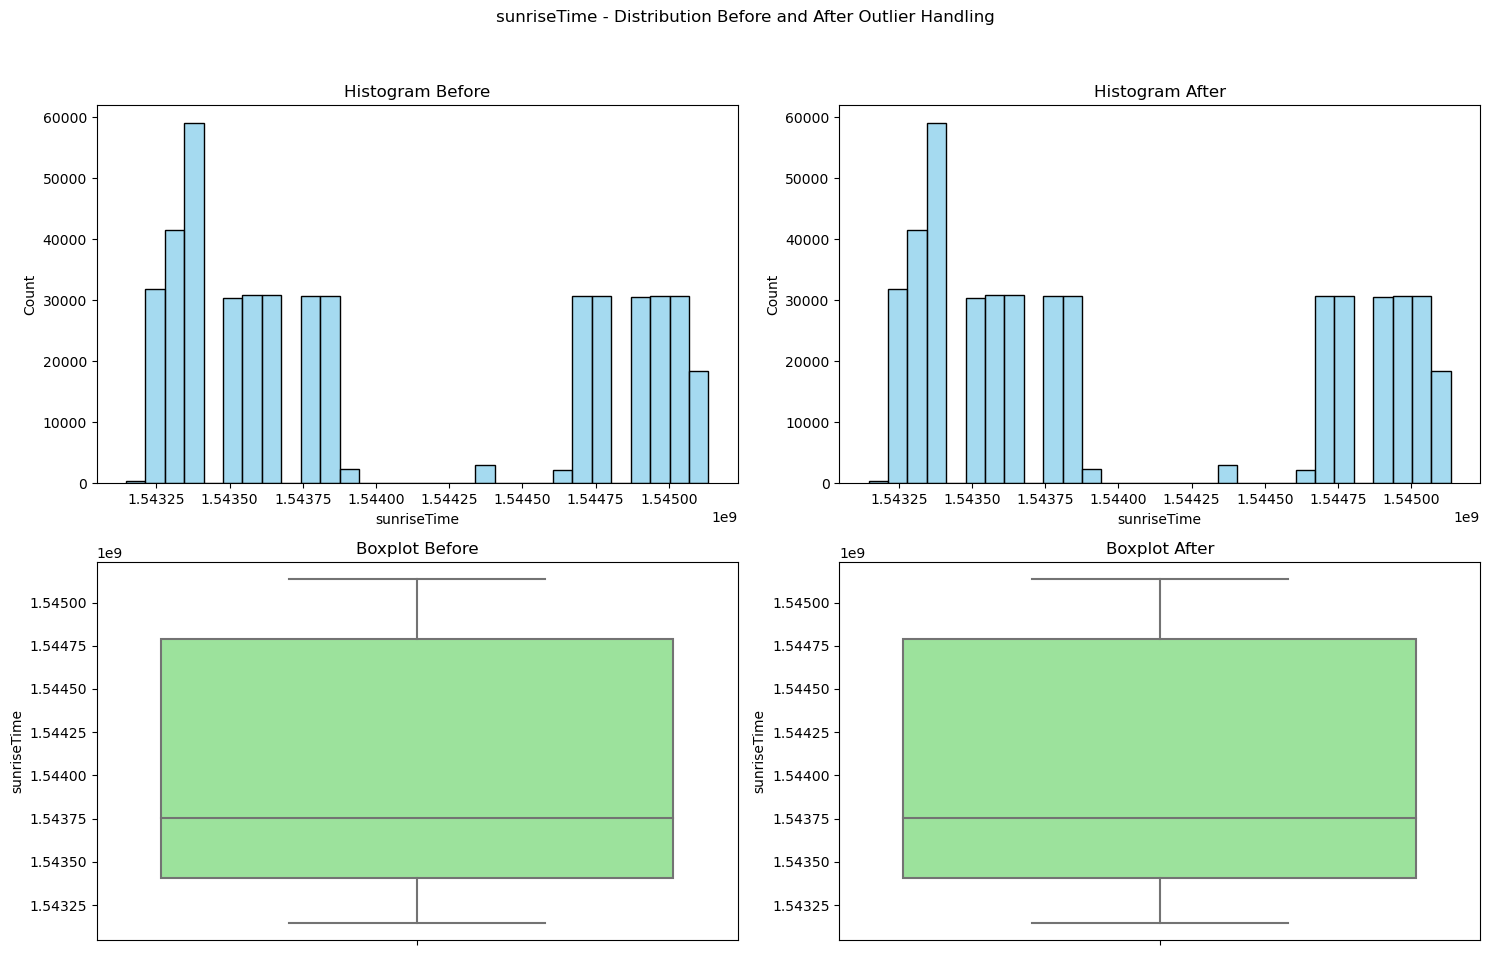

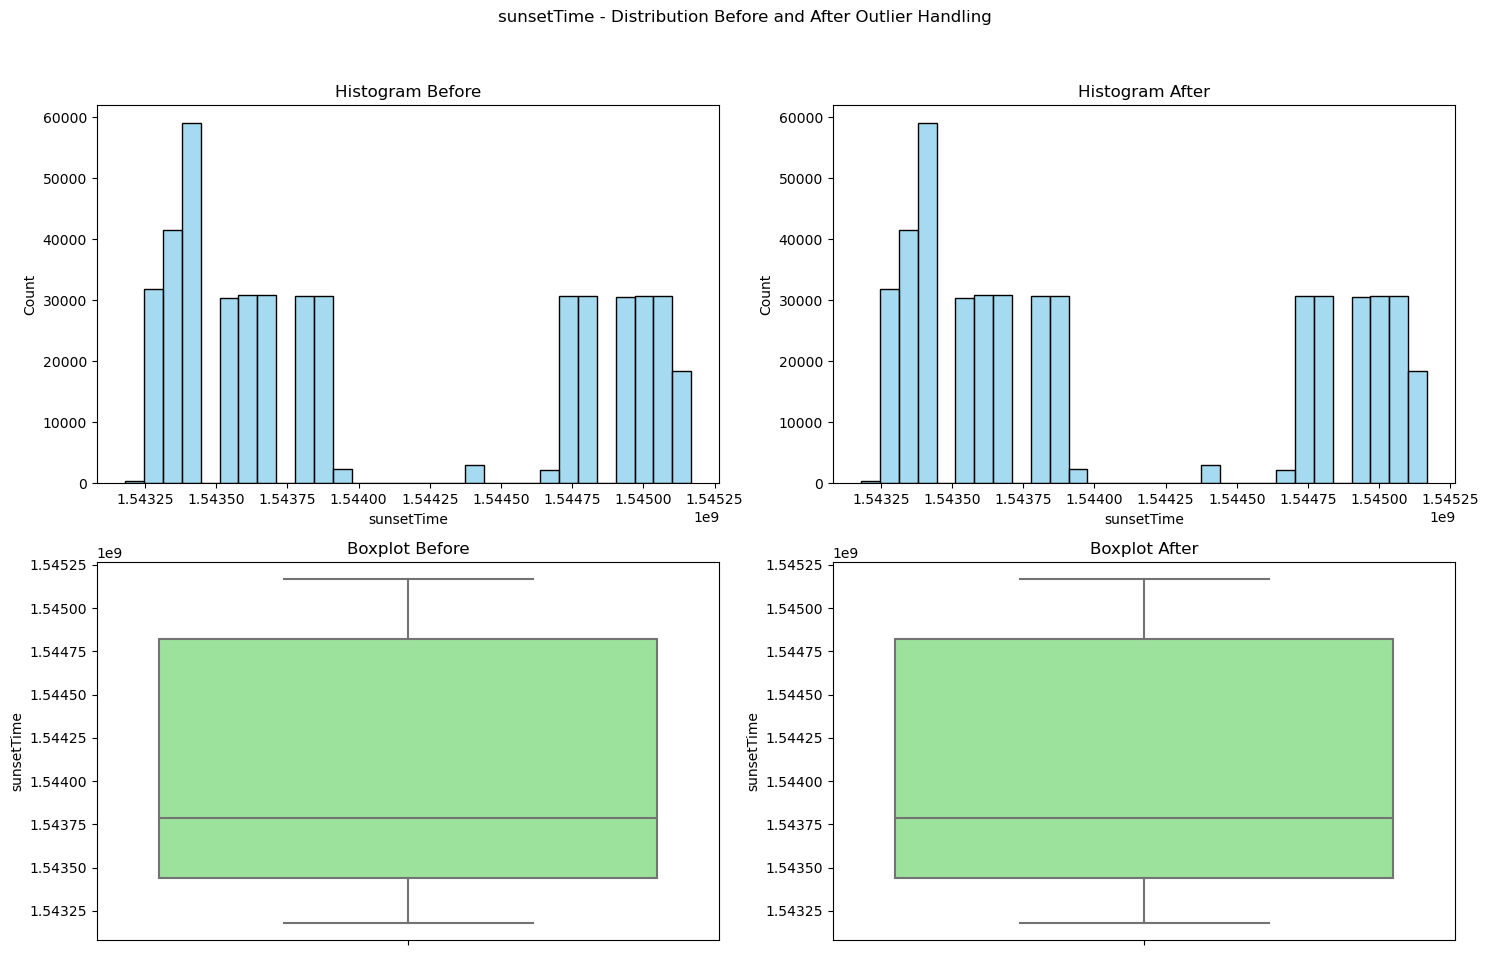

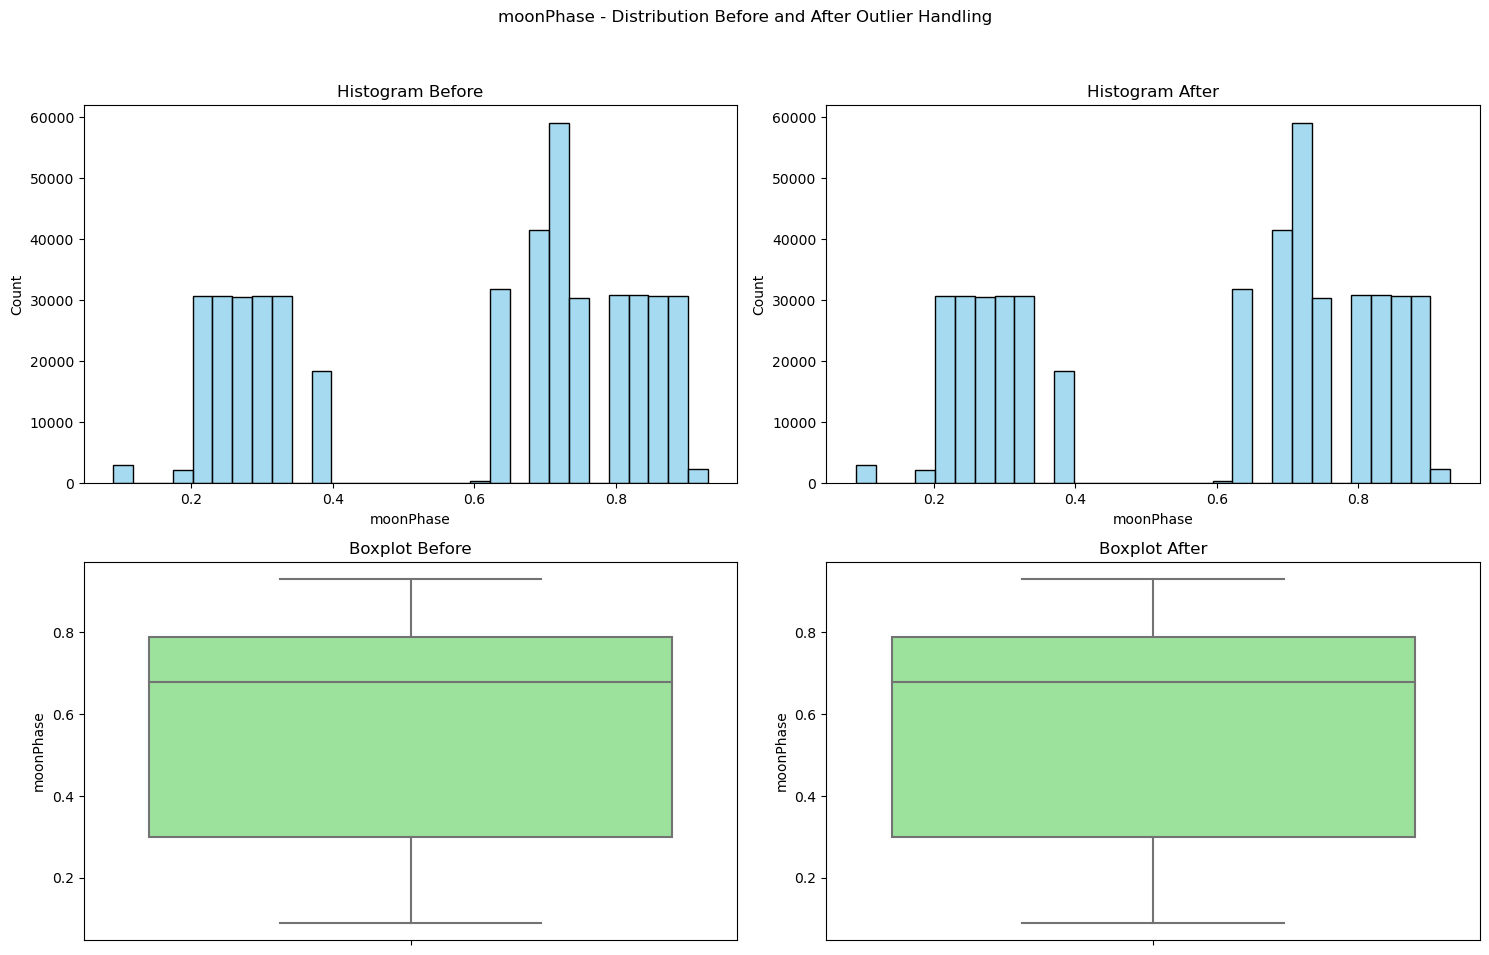

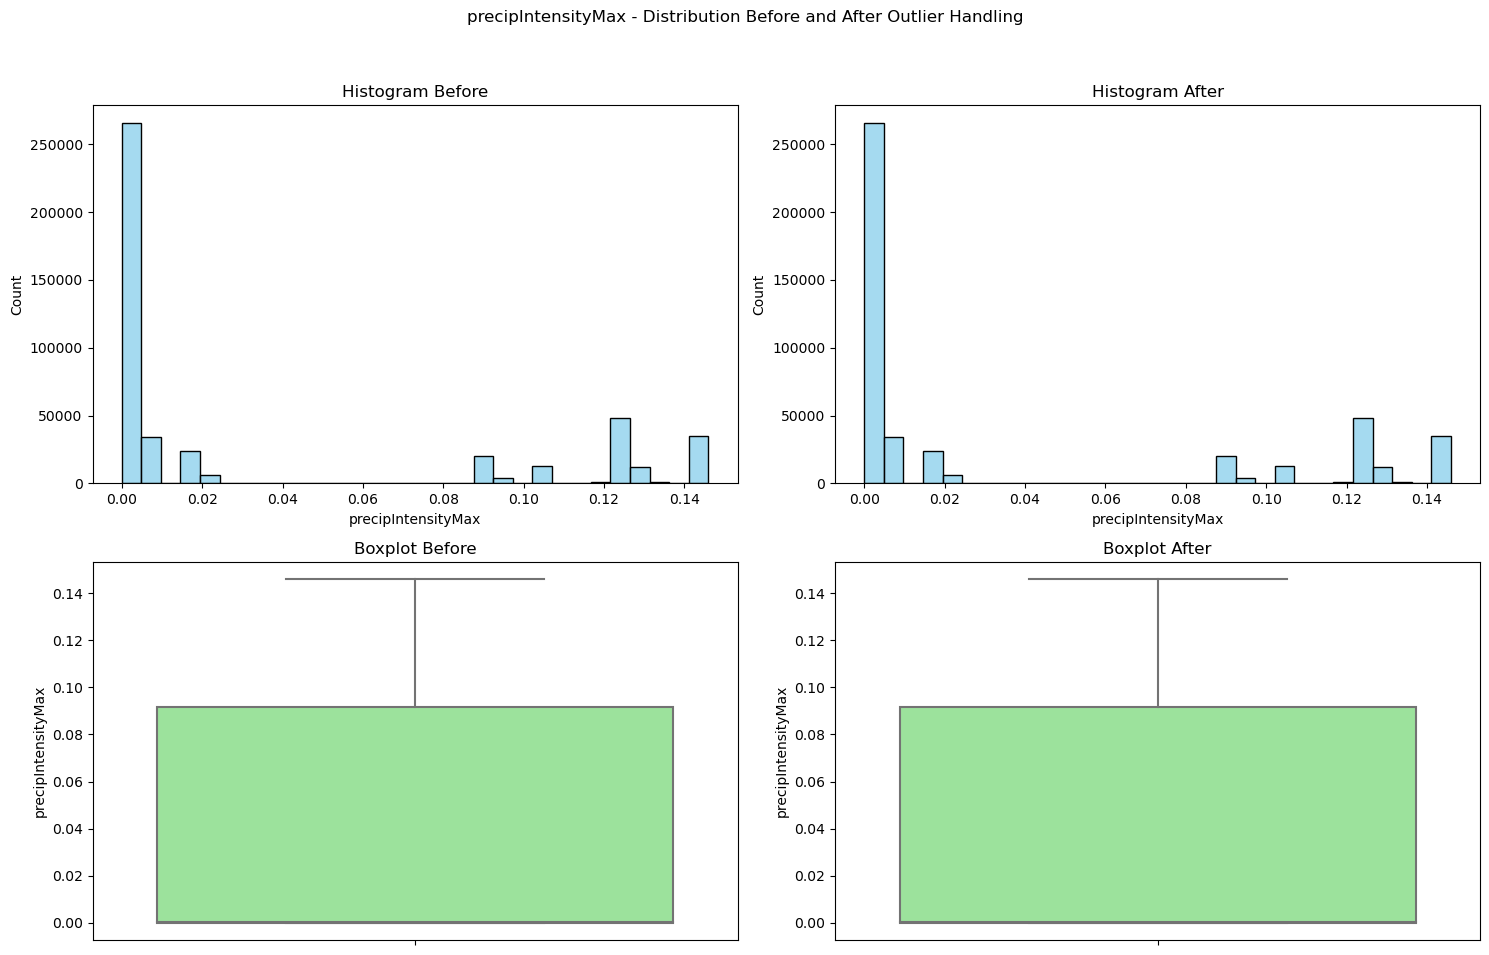

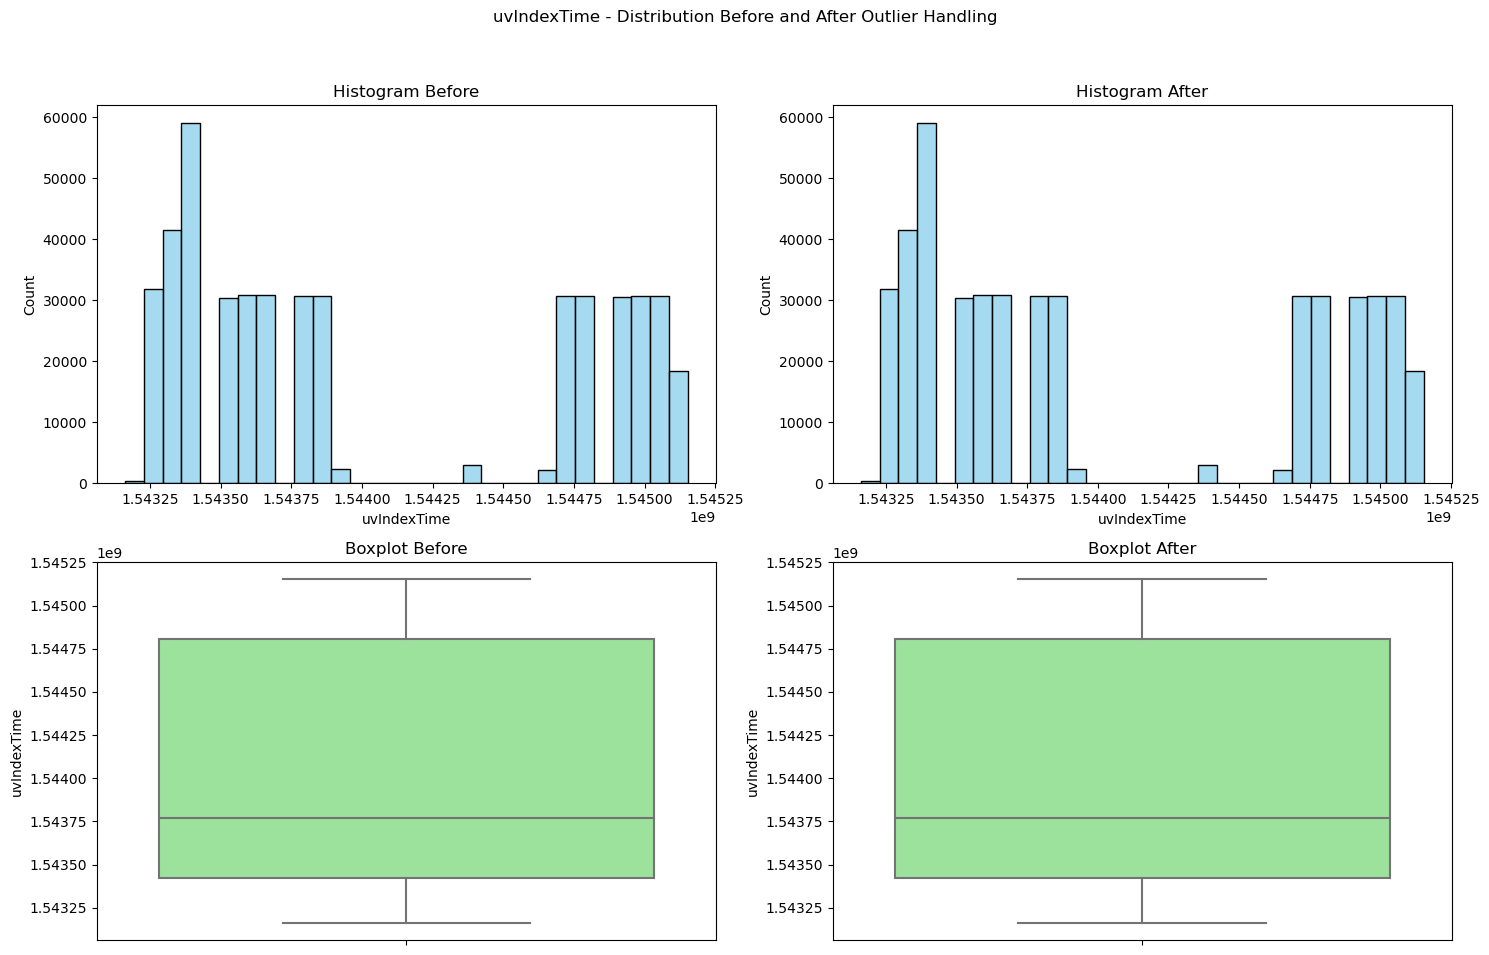

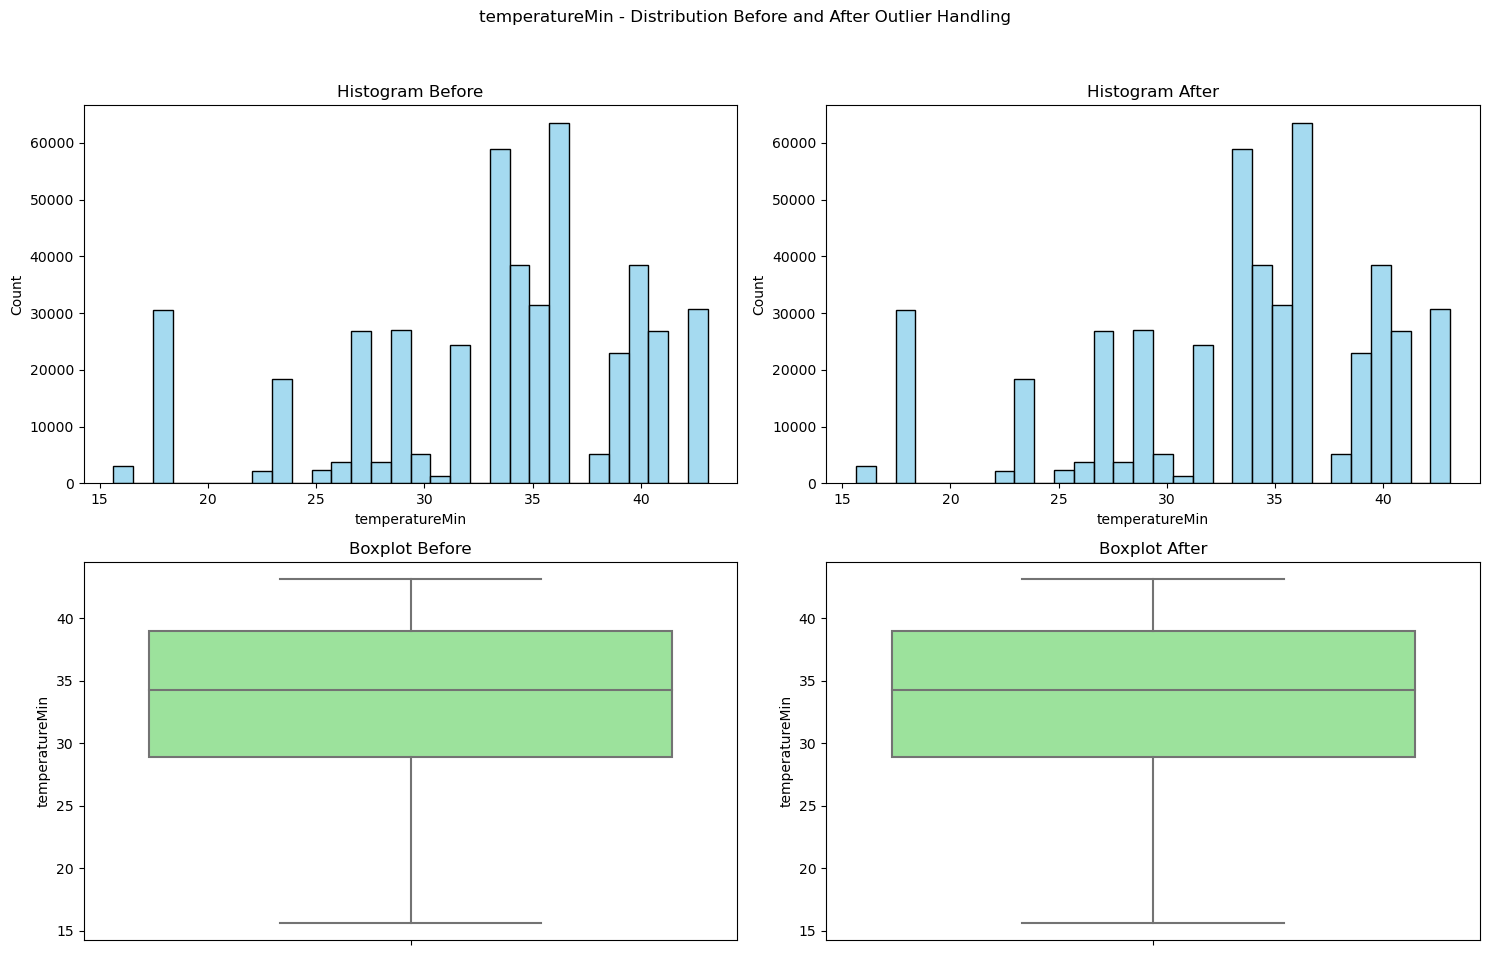

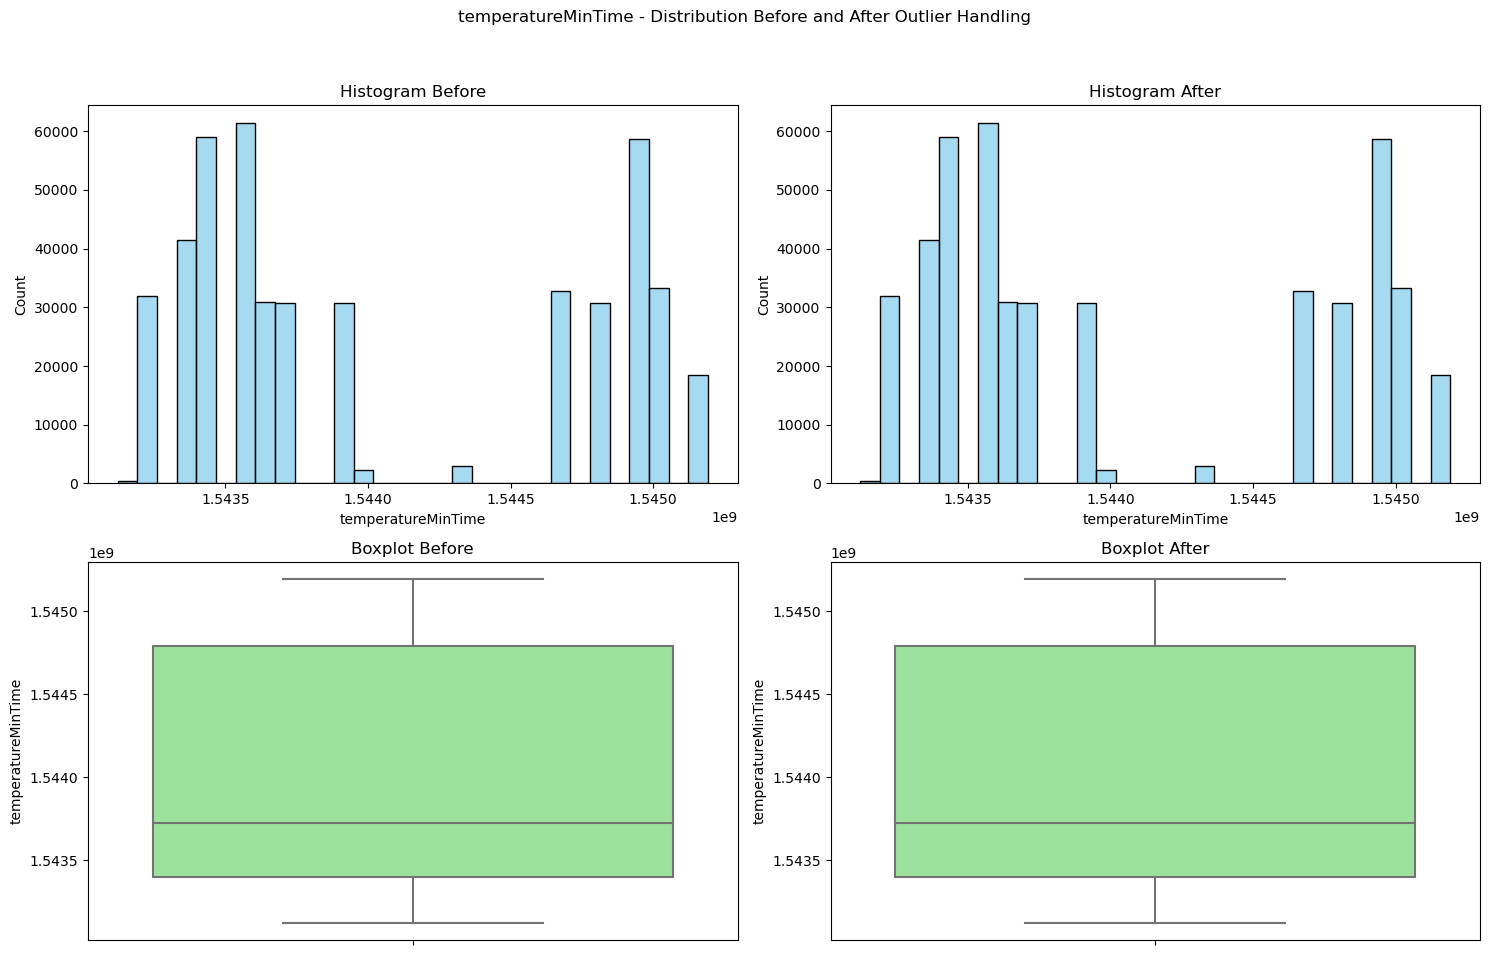

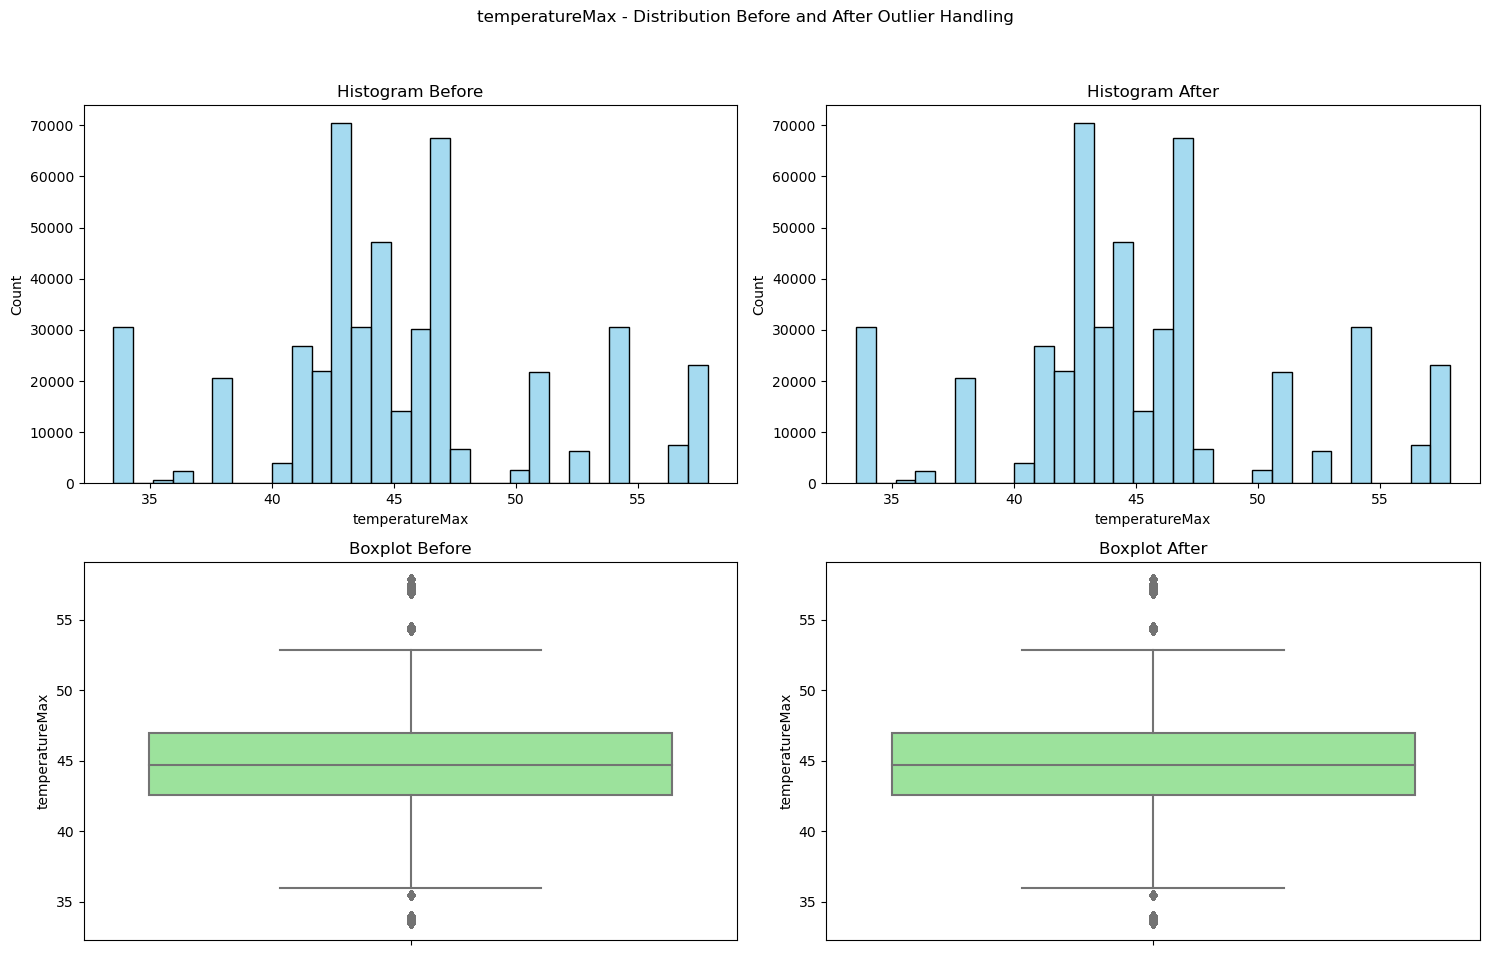

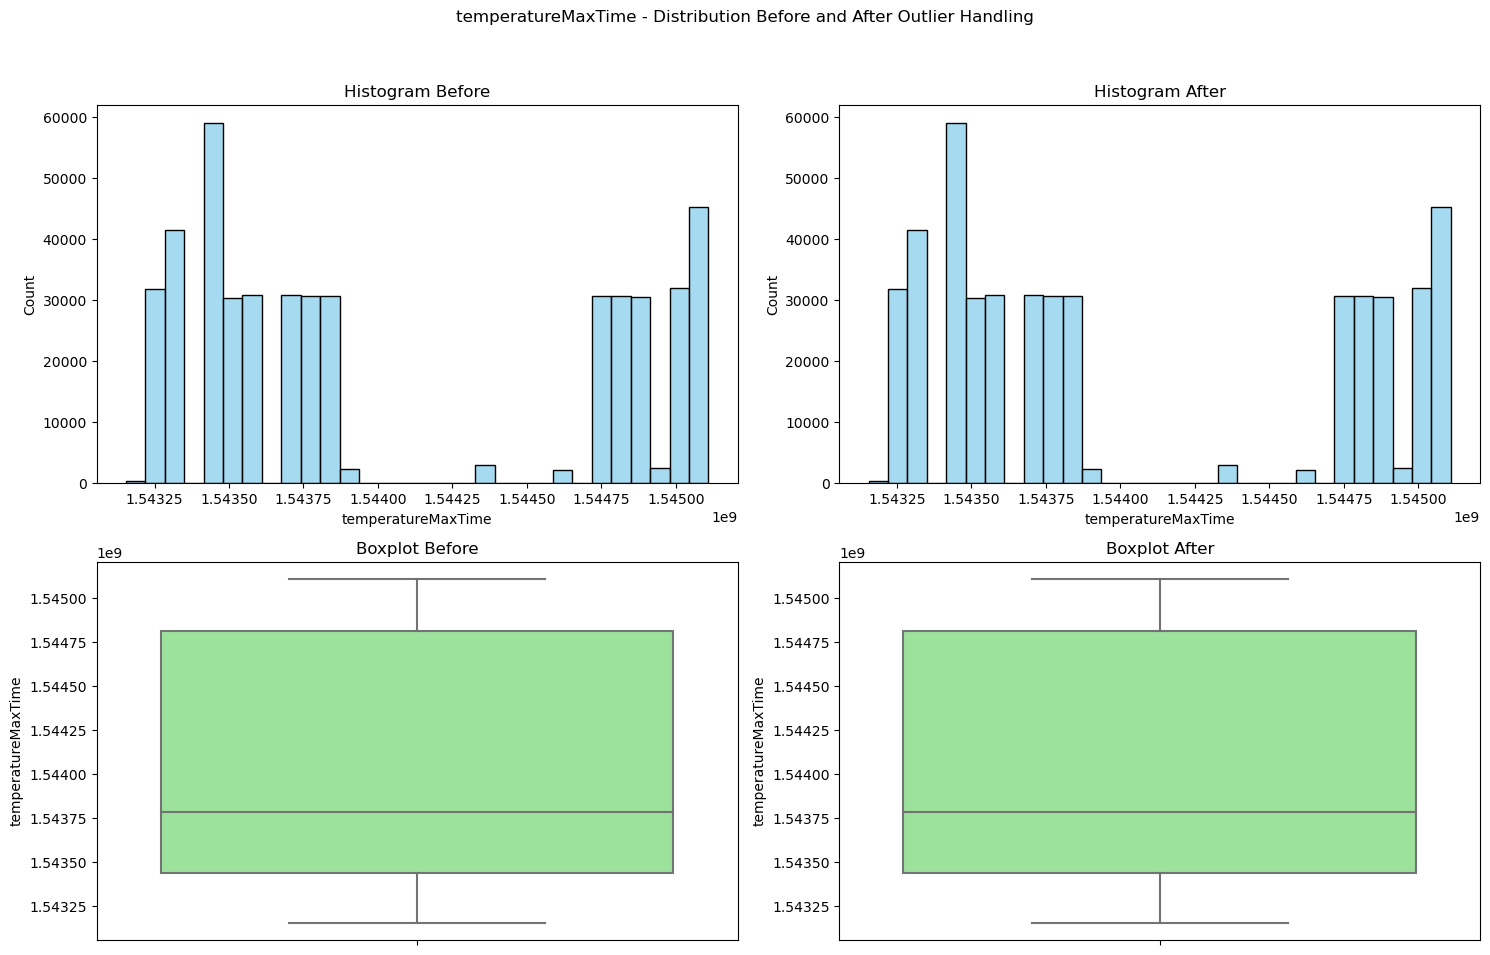

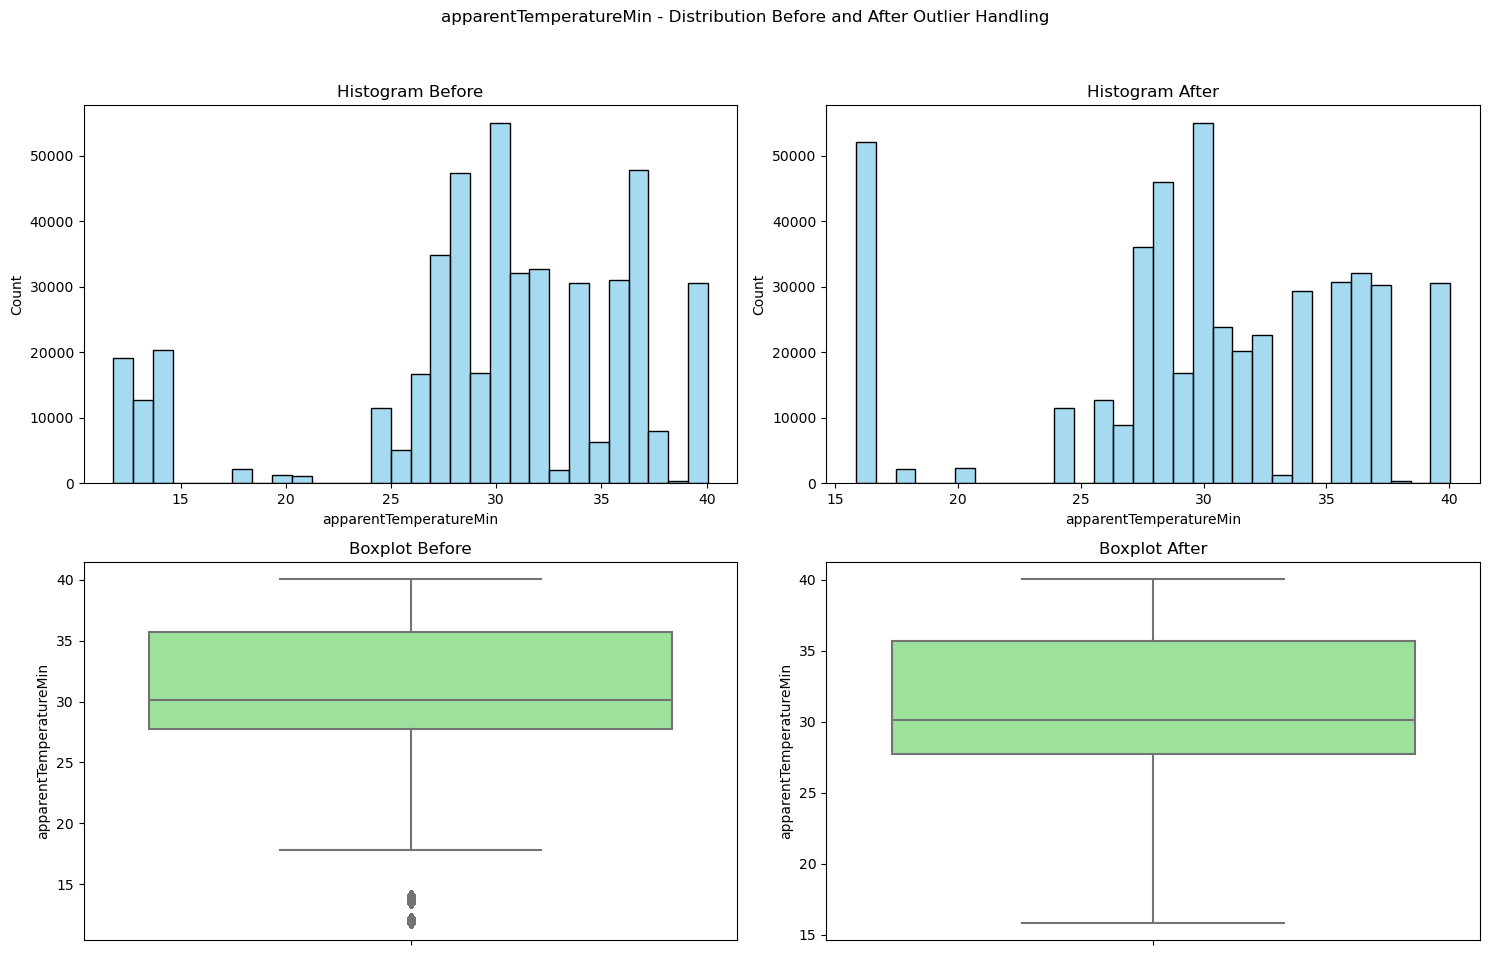

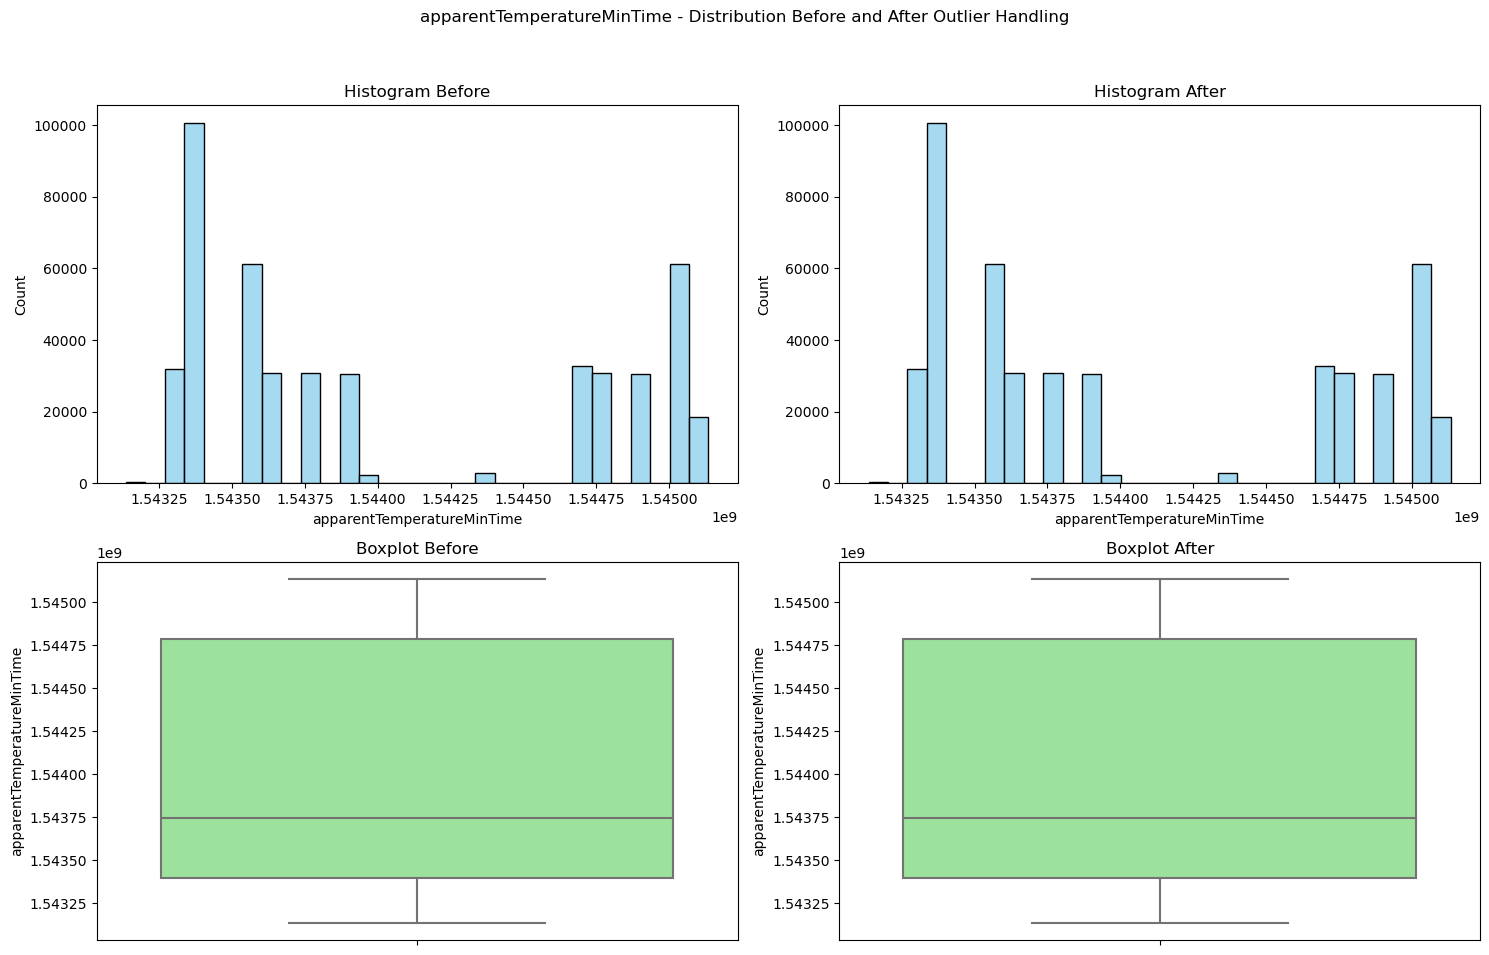

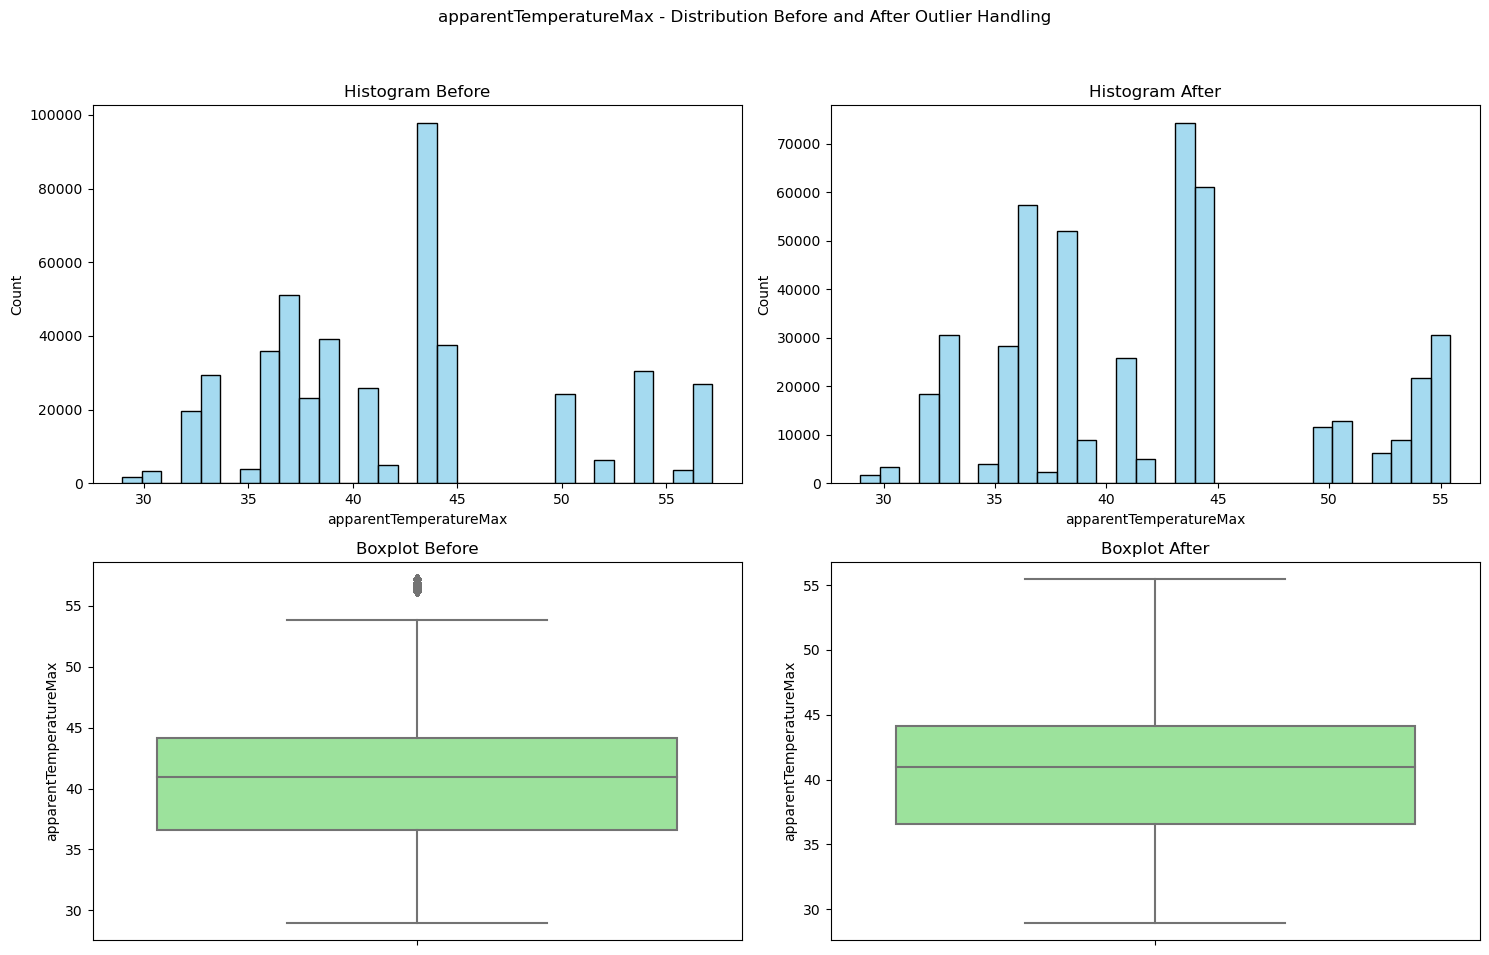

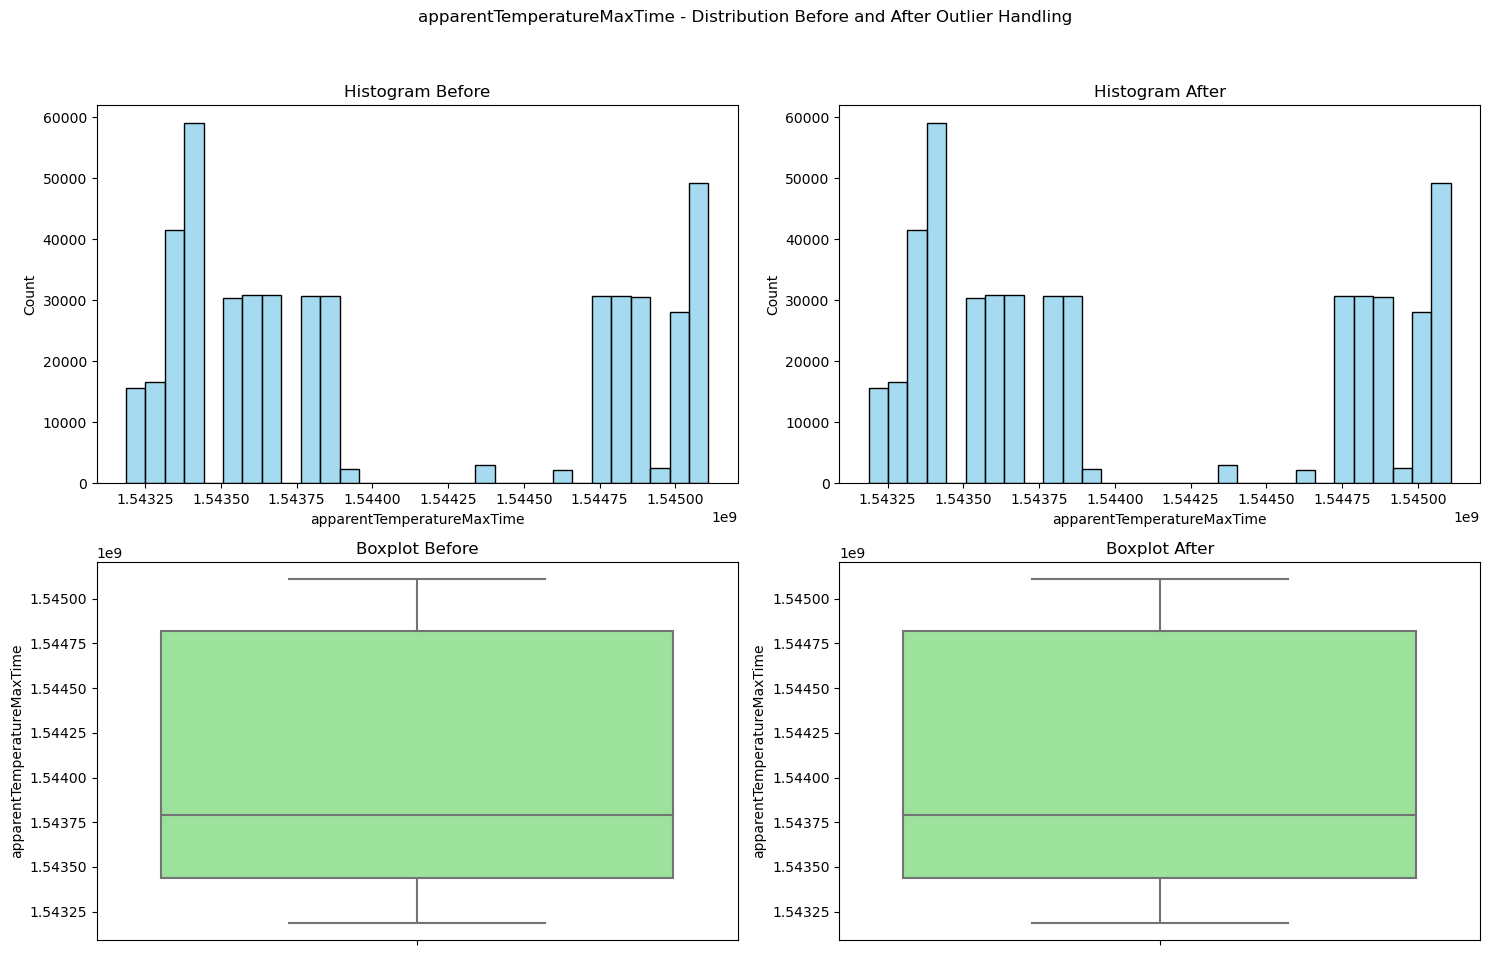

In [125]:
# Using the Function
num_cols = kolom_numerik 
for col in num_cols:
    outlier_handling_plot_comparison(X_train_raw, X_train_capped, col)

- Split Data Numerical and Categorical

In [126]:
num_columns = X_train_capped.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train_capped.select_dtypes(include=['object']).columns.tolist()

In [127]:
print('Categorical Columns :', cat_columns)
print('Numerical Columns :', num_columns)

Categorical Columns : ['source', 'destination', 'cab_type', 'product_id', 'name', 'short_summary', 'icon']
Numerical Columns : ['hour', 'day', 'month', 'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature', 'apparentTemperature', 'precipIntensity', 'precipProbability', 'humidity', 'windSpeed', 'windGust', 'windGustTime', 'visibility', 'temperatureHigh', 'temperatureHighTime', 'temperatureLow', 'temperatureLowTime', 'apparentTemperatureHigh', 'apparentTemperatureHighTime', 'apparentTemperatureLow', 'apparentTemperatureLowTime', 'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase', 'precipIntensityMax', 'uvIndexTime', 'temperatureMin', 'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime', 'apparentTemperatureMin', 'apparentTemperatureMinTime', 'apparentTemperatureMax', 'apparentTemperatureMaxTime']


In [128]:
X_train_num = X_train_capped[num_columns]
X_train_cat = X_train_capped[cat_columns]

X_test_num = X_test_capped[num_columns]
X_test_cat = X_test_capped[cat_columns]

### Feature Selection

#### Categorical Features

In [136]:
#Finding the correlation between categorical columns and 'price' using Kendall Tau's correlation

p_values = []
interpretation = []
cols = []
corr = []


for col in X_train_cat.columns:
  corr_coef, p_value = kendalltau(X_train_cat[col], y_train_raw)

  p_values.append(p_value)
  cols.append(col)
  corr.append(corr_coef)

  if p_value < 0.05:
    interpretation.append('Significant Correlation')
  else :
    interpretation.append('No Significant Correlation')

dfCorr= pd.DataFrame({'Column Name':cols,
              'Correlation Coefficient' : corr,
              'P-value':p_values,
              'Interpretation': interpretation })

dfCorr

,Column Name,Correlation Coefficient,P-value,Interpretation
0,source,-0.013958,1.765108e-41,Significant Correlation
1,destination,-0.031314,3.234718e-201,Significant Correlation
2,cab_type,-0.046454,0.000000e+00,Significant Correlation
3,product_id,0.051989,0.000000e+00,Significant Correlation
4,name,-0.396169,0.000000e+00,Significant Correlation
5,short_summary,0.000120,9.118841e-01,No Significant Correlation
6,icon,0.001693,1.202940e-01,No Significant Correlation


In [143]:
dfCorr[dfCorr['Interpretation'] == "Significant Correlation"]

,Column Name,Correlation Coefficient,P-value,Interpretation
0,source,-0.013958,1.765108e-41,Significant Correlation
1,destination,-0.031314,3.234718e-201,Significant Correlation
2,cab_type,-0.046454,0.000000e+00,Significant Correlation
3,product_id,0.051989,0.000000e+00,Significant Correlation
4,name,-0.396169,0.000000e+00,Significant Correlation


In [140]:
#Finding the correlation between numerical columns and 'price' using pearsonr and spearmanr correlation

p_values = []
interpretation = []
cols = []
corr = []

for col in X_train_num.columns:
  if abs(X_train_num[col].skew()) < 0.5:                    #For Normally Distributed Columns
    corr_coef, p_value = pearsonr(X_train_num[col], y_train_raw)

    p_values.append(p_value)
    cols.append(col)
    corr.append(corr_coef)

    if p_value < 0.05:
      interpretation.append('Significant Correlation')
    else :
      interpretation.append('No Significant Correlation')
  else:                                                     #For Non Normally Distributed Columns
    corr_coef, p_value = spearmanr(X_train_num[col], y_train_raw)

    p_values.append(p_value)
    cols.append(col)
    corr.append(corr_coef)

    if p_value < 0.05:
      interpretation.append('Significant Correlation')
    else :
      interpretation.append('No Significant Correlation')

dfCorr_num = pd.DataFrame({'Column Name':cols,
              'Correlation Coefficient' : corr,
              'P-value':p_values,
              'Interpretation': interpretation })

dfCorr_num

,Column Name,Correlation Coefficient,P-value,Interpretation
0,hour,0.000578,0.693097,No Significant Correlation
1,day,0.003936,0.007236,Significant Correlation
2,month,-0.004245,0.003767,Significant Correlation
3,distance,0.337048,0.000000,Significant Correlation
4,surge_multiplier,0.169196,0.000000,Significant Correlation
5,latitude,0.003630,0.013248,Significant Correlation
6,longitude,-0.000087,0.952649,No Significant Correlation
7,temperature,-0.000621,0.671911,No Significant Correlation
8,apparentTemperature,-0.001484,0.311125,No Significant Correlation
9,precipIntensity,-0.000917,0.531404,No Significant Correlation


In [142]:
dfCorr_num[dfCorr_num['Interpretation'] == "Significant Correlation"]

,Column Name,Correlation Coefficient,P-value,Interpretation
1,day,0.003936,0.007236,Significant Correlation
2,month,-0.004245,0.003767,Significant Correlation
3,distance,0.337048,0.000000,Significant Correlation
4,surge_multiplier,0.169196,0.000000,Significant Correlation
5,latitude,0.003630,0.013248,Significant Correlation
12,windSpeed,0.002928,0.045699,Significant Correlation
13,windGust,0.003322,0.023413,Significant Correlation
17,temperatureHighTime,-0.002904,0.047535,Significant Correlation
19,temperatureLowTime,-0.002889,0.048707,Significant Correlation
21,apparentTemperatureHighTime,-0.002919,0.046394,Significant Correlation


In [ ]:
#Creating a heatmap for a better visualization
sns.heatmap(df[['Survived','Age','SibSp', 'Fare']].corr(),annot=True)

In [ ]:
# # fungsi drop outlier
# def drop_outlier(df, cols):
#     ''' Menggunakan Tukeys Rule karena nilai extream'''
#     iqr = 1.5 * (np.percentile(df[cols], 75) - np.percentile(df[cols], 25))
#     df.drop(df[df[cols] > (iqr + np.percentile(df [cols], 75)) ].index, inplace=True) 
#     df.drop(df[df[cols] < (np.percentile(df [cols], 25) - iqr)].index, inplace=True)


In [ ]:
# # identifikasi outlier
# outlier_cols = ['price','distance', 'surge_multiplier', 'latitude',  'temperature','apparentTemperature','precipIntensity','precipProbability','windGust','visibility','temperatureHigh',
#                 'apparentTemperatureHigh','apparentTemperatureLow','dewPoint', 'uvIndex','visibility.1','temperatureMax','apparentTemperatureMin','apparentTemperatureMax']


# for col in outlier_cols:
#     drop_outlier(df, col)

# vi. Model Defination

# vii. Model Training 

# viii. Model Evaluation

# ix. Model Saving

# x. Model inference 

# xi. Kesimpulan